## Import packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,10)

#### Import Video Games sales with ratings into a pandas data frame and inspecting dataframe.

In [2]:
# Save VGData to 'File' variable 
file = open(r'C:\Users\eshai\Desktop\VGData.csv.csv')

# Open file and save file as pd Dataframe
vgdata = pd.read_csv(file)

#inspect Data
vgdata.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


The dataframe contains mutiple columns with missing values. First we will drop columns 

In [3]:
# Filter all Games that have been release before 2011 as 'post_2012'
post_2012 = vgdata['Year_of_Release'] > 2011

# Save filter data as 'fvg'
fvg = vgdata[post_2012]

# Drop all columns containing sales data:
fvg = fvg.drop(['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],axis=1)


# View DataFrame
fvg

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,97.0,58.0,8.1,3711.0,Rockstar North,M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,NaN,NaN,NaN,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,83.0,21.0,5.3,922.0,Treyarch,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,83.0,73.0,4.8,2256.0,Treyarch,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,97.0,66.0,8.3,2899.0,Rockstar North,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
60,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,73.0,29.0,2.6,2117.0,Infinity Ward,M
62,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,78.0,70.0,7.2,424.0,Nintendo,E


In [4]:
# Find all blank values in Dataframe and save them inside 'blank_values':
blank_values = fvg[fvg.isnull().any(axis=1)]

# View blank values 
blank_values

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,NaN,NaN,NaN,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
72,Minecraft,X360,2013.0,Misc,Microsoft Game Studios,NaN,NaN,NaN,NaN,NaN,NaN
83,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,NaN,NaN,NaN,NaN,NaN,NaN
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN
180,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop all video games that have a Nan values in 'Critic_Score' column:
VGR = fvg[np.isfinite(fvg['Critic_Score'])]


In [6]:
# Reset index:
VGR = VGR.reset_index(drop=True)

# View info of 'VGR' to verify no Nan values exsist in 'Critic_Score' column:
VGR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 11 columns):
Name               1312 non-null object
Platform           1312 non-null object
Year_of_Release    1312 non-null float64
Genre              1312 non-null object
Publisher          1312 non-null object
Critic_Score       1312 non-null float64
Critic_Count       1312 non-null float64
User_Score         1309 non-null object
User_Count         1297 non-null float64
Developer          1312 non-null object
Rating             1267 non-null object
dtypes: float64(4), object(7)
memory usage: 112.8+ KB


In [7]:
# Look for any Nan values within the DataFrame:
nanval = VGR[VGR.isnull().any(axis=1)]

#View Nan Values:
nanval


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
227,Football Manager 2013,PC,2012.0,Sports,Sega,86.0,37.0,6.7,228.0,Sports Interactive,NaN
488,Football Manager 2015,PC,2014.0,Simulation,Sega,80.0,36.0,6,151.0,Sports Interactive,NaN
514,Wolfenstein: The Old Blood,PS4,2015.0,Action,Bethesda Softworks,76.0,54.0,8,267.0,MachineGames,NaN
521,Metro: Last Light,PS3,2013.0,Action,Deep Silver,80.0,23.0,8.2,508.0,4A Games,NaN
548,Dark Souls III,XOne,2016.0,Role-Playing,Namco Bandai Games,87.0,14.0,8.6,514.0,From Software,NaN
588,Metro: Last Light,X360,2013.0,Action,Deep Silver,80.0,20.0,8.4,440.0,4A Games,NaN
765,Zombie Army Trilogy,PS4,2015.0,Shooter,Rebellion Developments,62.0,26.0,6.8,88.0,Rebellion,NaN
795,Singstar: Ultimate Party,PS4,2014.0,Misc,Sony Computer Entertainment Europe,47.0,19.0,4.1,18.0,SCEE,NaN
810,Skylanders Imaginators,WiiU,2016.0,Platform,Activision,76.0,4.0,tbd,NaN,Toys for Bob,E10+
822,MotoGP 15,PS4,2015.0,Racing,Milestone S.r.l.,66.0,15.0,NaN,NaN,Milestone S.r.l,NaN


In [8]:
# Fill Nan values in User_Score with mean of known values:
VGR['User_Score'] = pd.to_numeric(VGR['User_Score'], errors='coerce')
US_avg = VGR.User_Score.mean(skipna=True)
VGR['User_Score'] = VGR['User_Score'].fillna(US_avg)

# Multiply contents of User_Score by 10:
VGR['User_Score'] = VGR['User_Score'].mul(10)

In [9]:
# Fill Nan Values of User_Count with mean of known values:
VGR['User_Count'] = pd.to_numeric(VGR['User_Count'], errors='coerce')
UC_avg = VGR.User_Count.mean(skipna=True)
VGR['User_Count'] = VGR['User_Count'].fillna(UC_avg)


In [10]:
#Drop remaining Nan values in DataFrame:
VGR = VGR.dropna()

#View Dataframe:
VGR

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,97.0,50.0,82.0,3994.0,Rockstar North,M
1,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,97.0,58.0,81.0,3711.0,Rockstar North,M
2,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,83.0,21.0,53.0,922.0,Treyarch,M
3,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,83.0,73.0,48.0,2256.0,Treyarch,M
4,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,97.0,66.0,83.0,2899.0,Rockstar North,M
5,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,73.0,29.0,26.0,2117.0,Infinity Ward,M
6,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,78.0,70.0,72.0,424.0,Nintendo,E
7,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,87.0,87.0,70.0,3260.0,343 Industries,M
8,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,71.0,10.0,26.0,1047.0,Infinity Ward,M
9,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,88.0,70.0,87.0,626.0,Nintendo,E


In [11]:
# Sort Values by 'Year_of_Release' :
VGR = VGR.sort_values(by='Year_of_Release')

# Reset Index and View :
VGR = VGR.reset_index(drop=True)
VGR

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Sorcery,PS3,2012.0,Action,Sony Computer Entertainment,70.0,52.0,73.000000,57.000000,The Workshop,E10+
1,Ninja Gaiden 3,X360,2012.0,Action,Tecmo Koei,58.0,39.0,44.000000,136.000000,Team Ninja,M
2,Hitman: Absolution,PC,2012.0,Action,Square Enix,79.0,26.0,70.000000,1327.000000,"Io Interactive, Nixxes Software",M
3,Ys: Memories of Celceta,PSV,2012.0,Action,Nihon Falcom Corporation,82.0,56.0,88.000000,237.000000,Falcom,T
4,Asura's Wrath,X360,2012.0,Action,Capcom,71.0,54.0,65.000000,131.000000,CyberConnect2,T
5,Tom Clancy's Ghost Recon: Future Soldier,PS3,2012.0,Shooter,Ubisoft,79.0,18.0,69.000000,156.000000,Ubisoft Paris,M
6,The Testament of Sherlock Holmes,PS3,2012.0,Adventure,Focus Home Interactive,65.0,16.0,74.000000,34.000000,Frogwares,M
7,PlayStation All-Stars Battle Royale,PS3,2012.0,Action,Sony Computer Entertainment,74.0,69.0,73.000000,540.000000,SuperBot Entertainment,T
8,Mario Tennis Open,3DS,2012.0,Sports,Nintendo,69.0,58.0,69.000000,110.000000,Camelot Software Planning,E
9,Sniper Elite V2,PS3,2012.0,Shooter,505 Games,70.0,21.0,69.000000,92.000000,Rebellion,M


## Data Cleaning Finished 

In [12]:
#Save VGRE Dataframe to CSV File:
VGR.to_csv('VGR.csv')


In [13]:
# Count the number of games each developer released in the DataFrame:
Devs = np.unique(VGR['Developer'], return_counts=True)

# Covert contents of 'Devs' array into DataFrame:
Devs = pd.DataFrame({'Developer': list(Devs[0]),'Count': list(Devs[1])})

# View DataFrame:
Devs.describe()

,Count
count,389.000000
mean,3.257069
std,4.259100
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,41.000000


In [14]:
# Create Bin Names
g_names = ['Small', 'Major']

# Create limits of Bins
bins = [0, 4, 50]

# Categorize Devs based on counts of games in DataFrame:
Devs['Developer_size'] = pd.cut(Devs['Count'], bins, labels=g_names)



In [15]:
# Merge VGR DataFrame 
VGR = VGR.merge(Devs, on='Developer')

# View Dataframe to verify merge:
VGR

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Count,Developer_size
0,Sorcery,PS3,2012.0,Action,Sony Computer Entertainment,70.0,52.0,73.000000,57.000000,The Workshop,E10+,1,Small
1,Ninja Gaiden 3,X360,2012.0,Action,Tecmo Koei,58.0,39.0,44.000000,136.000000,Team Ninja,M,4,Small
2,Ninja Gaiden 3,PS3,2012.0,Action,Tecmo Koei,58.0,43.0,50.000000,152.000000,Team Ninja,M,4,Small
3,Dead or Alive 5,X360,2012.0,Fighting,Ubisoft Annecy,76.0,39.0,79.000000,95.000000,Team Ninja,M,4,Small
4,Dead or Alive 5,PS3,2012.0,Fighting,Tecmo Koei,74.0,34.0,77.000000,109.000000,Team Ninja,M,4,Small
5,Hitman: Absolution,PC,2012.0,Action,Square Enix,79.0,26.0,70.000000,1327.000000,"Io Interactive, Nixxes Software",M,1,Small
6,Ys: Memories of Celceta,PSV,2012.0,Action,Nihon Falcom Corporation,82.0,56.0,88.000000,237.000000,Falcom,T,5,Major
7,The Legend of Heroes: Trails of Cold Steel,PSV,2013.0,Role-Playing,Nippon Ichi Software,77.0,20.0,75.000000,132.000000,Falcom,T,5,Major
8,The Legend of Heroes: Trails of Cold Steel,PS3,2013.0,Role-Playing,Nippon Ichi Software,86.0,12.0,77.000000,128.000000,Falcom,T,5,Major
9,The Legend of Heroes: Trails of Cold Steel II,PS3,2014.0,Role-Playing,Nippon Ichi Software,90.0,4.0,78.000000,71.000000,Falcom,T,5,Major


In [16]:
# Count the number of games each developer released in the DataFrame:
Pubs = np.unique(VGR['Publisher'], return_counts=True)

# Covert contents of 'Devs' array into DataFrame:
Pubs = pd.DataFrame({'Publisher': list(Pubs[0]),'Counts': list(Pubs[1]) })


In [17]:
#Create Bin names
g_names = ['small', 'major']

#Create limit of bins
bins = [0, 12, 150]

#Categorize Pubs based on counts of games in DataFrame:
Pubs['Publisher_size'] = pd.cut(Pubs['Counts'], bins, labels=g_names)

Pubs


,Counts,Publisher,Publisher_size
0,23,505 Games,major
1,83,Activision,major
2,1,Activision Blizzard,small
3,2,Agatsuma Entertainment,small
4,6,Aksys Games,small
5,1,Alternative Software,small
6,1,Aqua Plus,small
7,3,Arc System Works,small
8,1,ArtDink,small
9,1,Atari,small


In [18]:
# Merge VGR DataFrame with Pubs on Publishers:
VGR = VGR.merge(Pubs, on='Publisher')

# Drop Counts from Dataframe:
VGR = VGR.drop(['Count','Counts'], axis=1)



In [19]:
# Create Bin Names for Analysis : 
g_names = ['Poor','Average', 'Good', 'Great']

#Bins Limits
bins = [0, 50, 75, 90, 100]

# Sort Critic_Score into Game Quality Categories:
VGR['Game_Quality'] = pd.cut(VGR['Critic_Score'], bins, labels=g_names)

# View DF with new Column:
VGR


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Developer_size,Publisher_size,Game_Quality
0,Sorcery,PS3,2012.0,Action,Sony Computer Entertainment,70.0,52.0,73.000000,57.000000,The Workshop,E10+,Small,major,Average
1,PlayStation All-Stars Battle Royale,PS3,2012.0,Action,Sony Computer Entertainment,74.0,69.0,73.000000,540.000000,SuperBot Entertainment,T,Small,major,Average
2,LittleBigPlanet Karting,PS3,2012.0,Action,Sony Computer Entertainment,73.0,69.0,69.000000,159.000000,"Media Molecule, United Front Games",E,Small,major,Average
3,Tokyo Jungle,PS3,2012.0,Action,Sony Computer Entertainment,74.0,60.0,84.000000,89.000000,Crispy's,T,Small,major,Average
4,MLB 12: The Show,PS3,2012.0,Sports,Sony Computer Entertainment,87.0,23.0,75.000000,75.000000,SCEA San Diego Studios,E,Major,major,Good
5,MLB 12: The Show,PSV,2012.0,Sports,Sony Computer Entertainment,76.0,15.0,78.000000,42.000000,SCEA San Diego Studios,E,Major,major,Good
6,MLB 13: The Show,PSV,2013.0,Sports,Sony Computer Entertainment,75.0,7.0,75.000000,21.000000,SCEA San Diego Studios,E,Major,major,Average
7,MLB 13: The Show,PS3,2013.0,Sports,Sony Computer Entertainment,87.0,36.0,78.000000,114.000000,SCEA San Diego Studios,E,Major,major,Good
8,MLB 15: The Show,PS4,2015.0,Sports,Sony Computer Entertainment,80.0,44.0,78.000000,190.000000,SCEA San Diego Studios,E,Major,major,Good
9,LittleBigPlanet PS Vita,PSV,2012.0,Platform,Sony Computer Entertainment,88.0,71.0,86.000000,348.000000,"Tarsier Studios, Double Eleven",E,Small,major,Good


In [20]:
#adding platform release year to Dataframe:
Console_Date = {'Platform':['3DS', 'DS', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360',
       'XOne', 'PC'], 'Platform_Date':[2011, 2004, 2006, 2014, 2004, 2011, 2006, 2012, 2005, 2013, 2012] }

# merging console date with dataframe
Console_Date = pd.DataFrame(data=Console_Date)

VGR = VGR.merge(Console_Date, on='Platform')

VGR

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Developer_size,Publisher_size,Game_Quality,Platform_Date
0,Sorcery,PS3,2012.0,Action,Sony Computer Entertainment,70.0,52.0,73.0,57.0,The Workshop,E10+,Small,major,Average,2006
1,PlayStation All-Stars Battle Royale,PS3,2012.0,Action,Sony Computer Entertainment,74.0,69.0,73.0,540.0,SuperBot Entertainment,T,Small,major,Average,2006
2,LittleBigPlanet Karting,PS3,2012.0,Action,Sony Computer Entertainment,73.0,69.0,69.0,159.0,"Media Molecule, United Front Games",E,Small,major,Average,2006
3,Tokyo Jungle,PS3,2012.0,Action,Sony Computer Entertainment,74.0,60.0,84.0,89.0,Crispy's,T,Small,major,Average,2006
4,MLB 12: The Show,PS3,2012.0,Sports,Sony Computer Entertainment,87.0,23.0,75.0,75.0,SCEA San Diego Studios,E,Major,major,Good,2006
5,MLB 13: The Show,PS3,2013.0,Sports,Sony Computer Entertainment,87.0,36.0,78.0,114.0,SCEA San Diego Studios,E,Major,major,Good,2006
6,Starhawk,PS3,2012.0,Action,Sony Computer Entertainment,77.0,71.0,78.0,188.0,LightBox Interactive,T,Small,major,Good,2006
7,Invizimals: The Lost Kingdom,PS3,2013.0,Action,Sony Computer Entertainment,50.0,16.0,50.0,14.0,Magenta Software,E10+,Small,major,Poor,2006
8,God of War: Ascension,PS3,2013.0,Action,Sony Computer Entertainment,80.0,89.0,75.0,914.0,SCE Santa Monica,M,Small,major,Good,2006
9,Beyond: Two Souls,PS3,2013.0,Adventure,Sony Computer Entertainment,70.0,98.0,81.0,2652.0,Quantic Dream,M,Small,major,Average,2006


In [21]:
#add YSR to dataframe
VGR['YSR'] = VGR['Year_of_Release'] - VGR['Platform_Date']

VGR

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Developer_size,Publisher_size,Game_Quality,Platform_Date,YSR
0,Sorcery,PS3,2012.0,Action,Sony Computer Entertainment,70.0,52.0,73.0,57.0,The Workshop,E10+,Small,major,Average,2006,6.0
1,PlayStation All-Stars Battle Royale,PS3,2012.0,Action,Sony Computer Entertainment,74.0,69.0,73.0,540.0,SuperBot Entertainment,T,Small,major,Average,2006,6.0
2,LittleBigPlanet Karting,PS3,2012.0,Action,Sony Computer Entertainment,73.0,69.0,69.0,159.0,"Media Molecule, United Front Games",E,Small,major,Average,2006,6.0
3,Tokyo Jungle,PS3,2012.0,Action,Sony Computer Entertainment,74.0,60.0,84.0,89.0,Crispy's,T,Small,major,Average,2006,6.0
4,MLB 12: The Show,PS3,2012.0,Sports,Sony Computer Entertainment,87.0,23.0,75.0,75.0,SCEA San Diego Studios,E,Major,major,Good,2006,6.0
5,MLB 13: The Show,PS3,2013.0,Sports,Sony Computer Entertainment,87.0,36.0,78.0,114.0,SCEA San Diego Studios,E,Major,major,Good,2006,7.0
6,Starhawk,PS3,2012.0,Action,Sony Computer Entertainment,77.0,71.0,78.0,188.0,LightBox Interactive,T,Small,major,Good,2006,6.0
7,Invizimals: The Lost Kingdom,PS3,2013.0,Action,Sony Computer Entertainment,50.0,16.0,50.0,14.0,Magenta Software,E10+,Small,major,Poor,2006,7.0
8,God of War: Ascension,PS3,2013.0,Action,Sony Computer Entertainment,80.0,89.0,75.0,914.0,SCE Santa Monica,M,Small,major,Good,2006,7.0
9,Beyond: Two Souls,PS3,2013.0,Adventure,Sony Computer Entertainment,70.0,98.0,81.0,2652.0,Quantic Dream,M,Small,major,Average,2006,7.0


In [22]:
#save file
VGR.to_csv('VGR.csv')

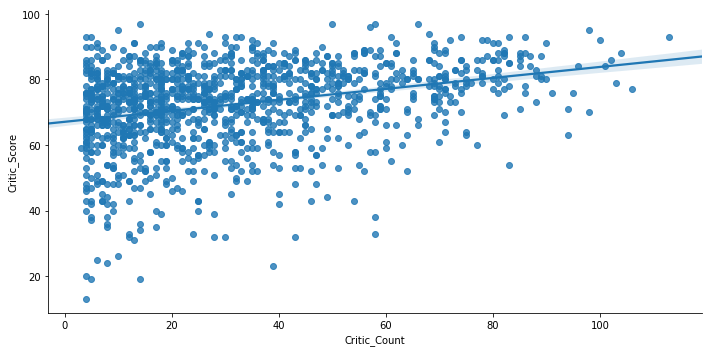

In [23]:
# Create and Show Scatter plot of User Score and Critic Score:
fig = sns.lmplot(x='Critic_Count', y='Critic_Score', data=VGR, aspect= 2)
plt.show()

fig.savefig("Score_Count.png")

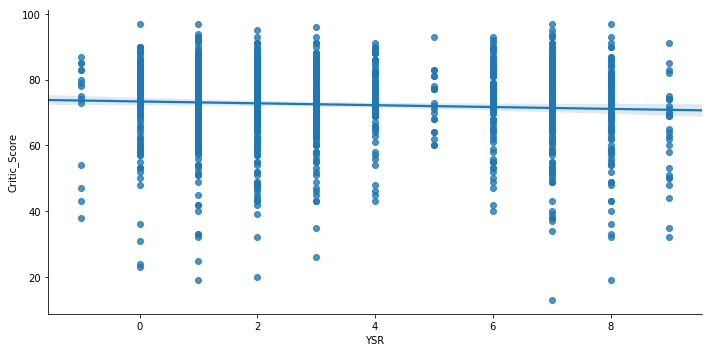

In [24]:
# Create and Show scatter plot of critic score and critic count:
fig = sns.lmplot(x='YSR', y='Critic_Score', data=VGR, aspect= 2)
plt.show()

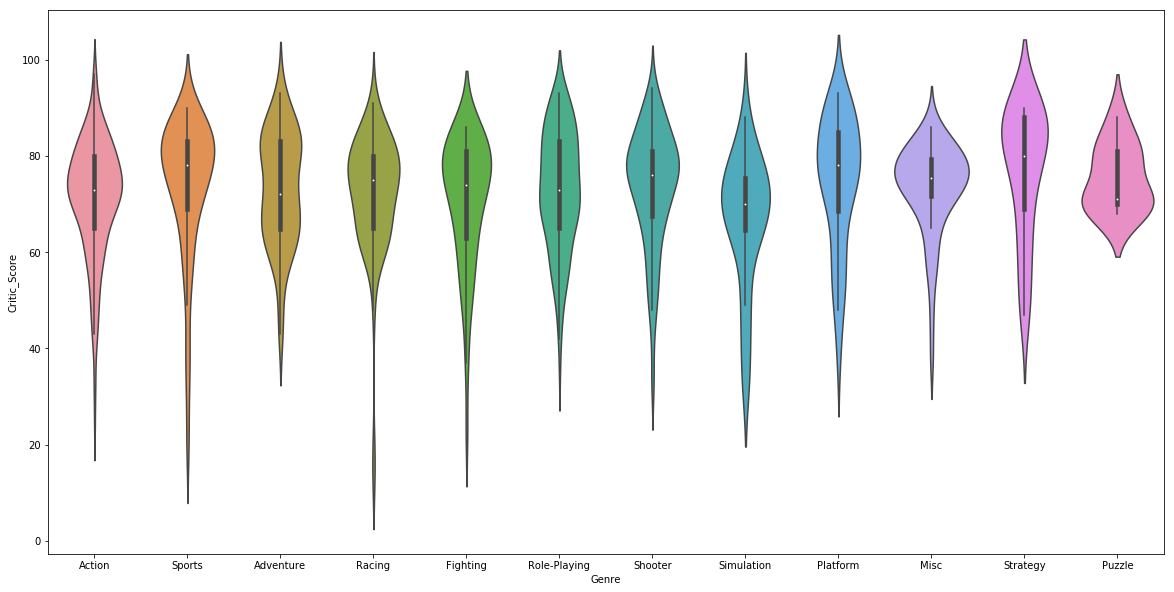

In [25]:
# Create and Show violin plot of genre and Critic Score 
fig2 = sns.violinplot(x='Genre', y='Critic_Score', data=VGR)

fig2 = fig2.get_figure()

fig2.savefig("Score_Genre.png")

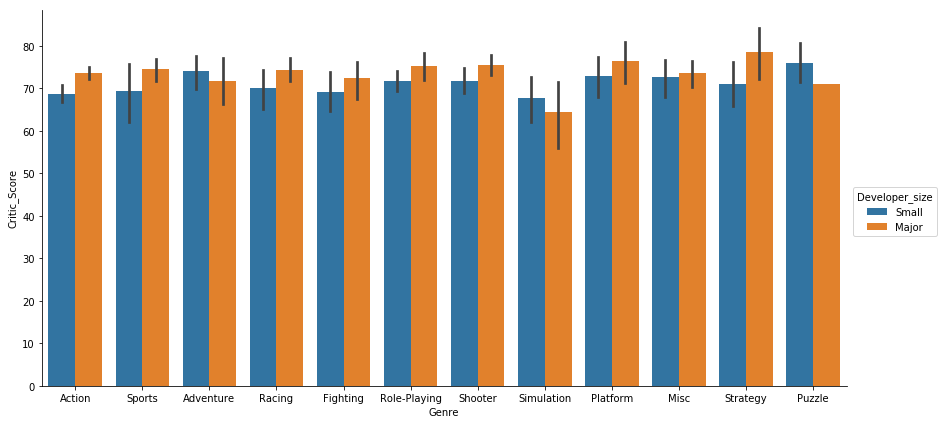

In [26]:
#Create and show bar plot of Genre and Critic Score:
fig3 = sns.factorplot(x="Genre", y="Critic_Score", hue="Developer_size", data=VGR, size=6, kind="bar", aspect=2)

fig3.savefig("Score_Genre_bar.png")

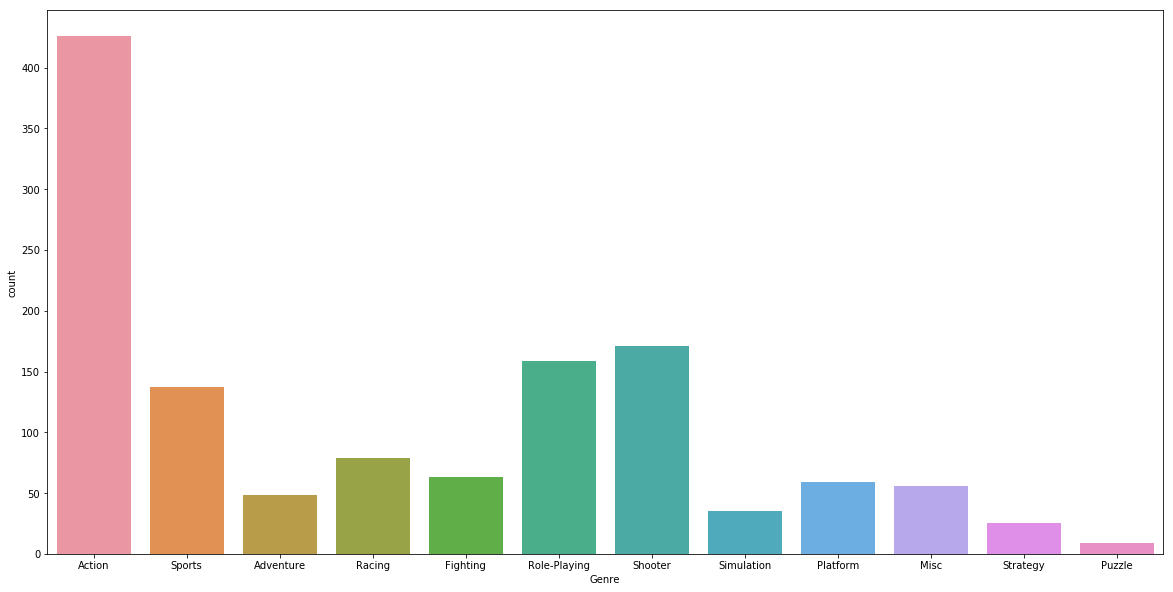

In [27]:
#Create and show count plot:
fig4 = sns.countplot(x="Genre", data=VGR )

fig4 = fig4.get_figure()

fig4.savefig("Count_Genre_bar.png")

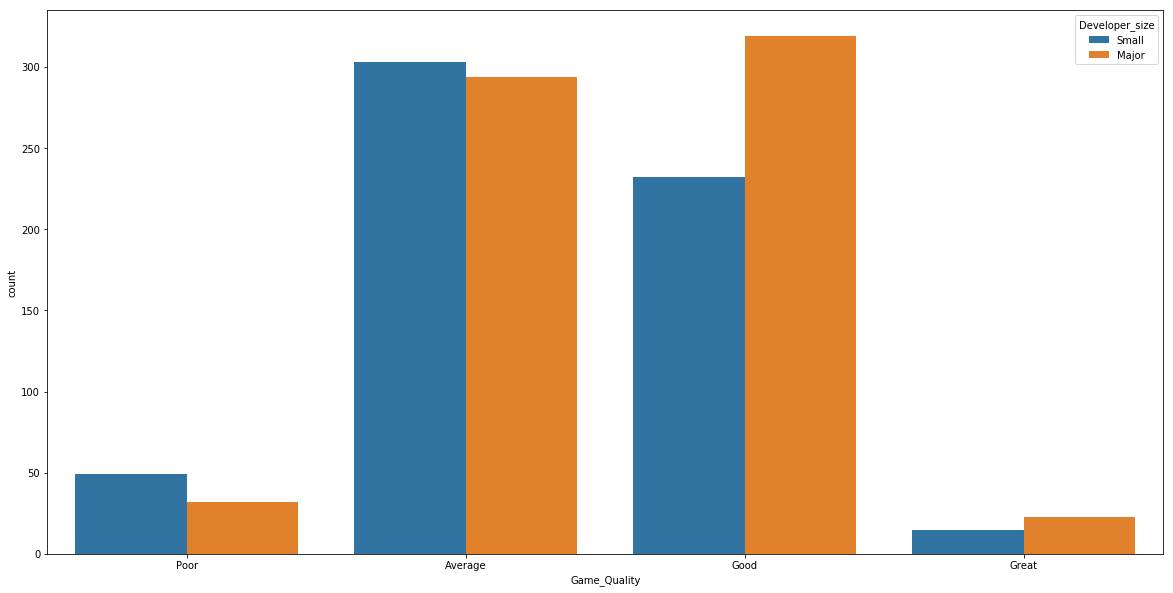

In [28]:
# Create and Show count plot:
sns.countplot(x="Game_Quality", data=VGR, hue='Developer_size' )
plt.show()

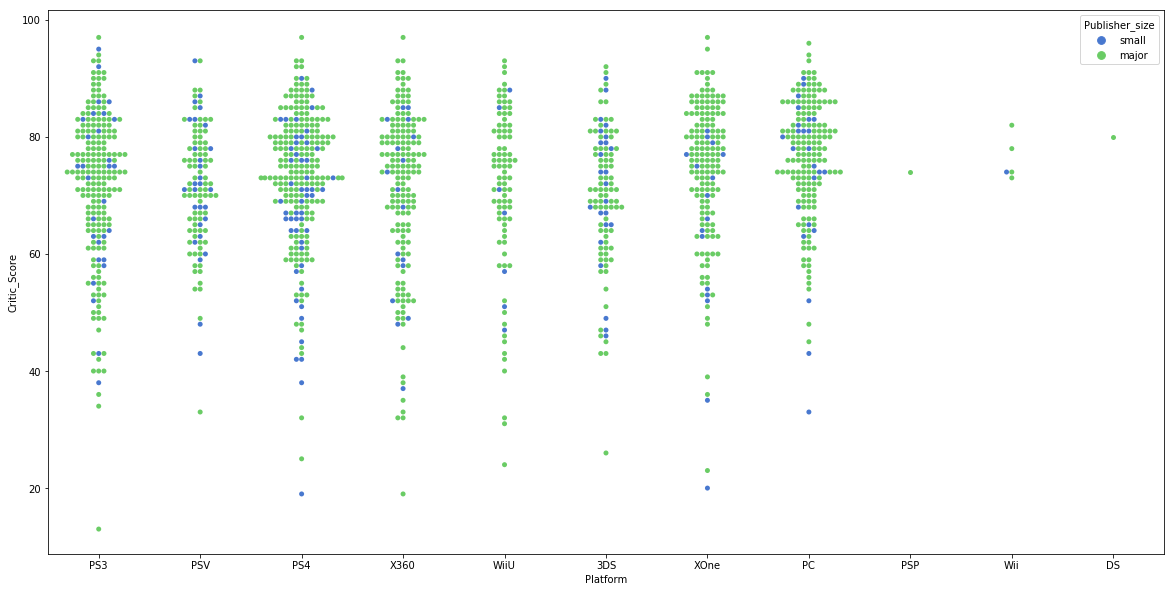

In [29]:
#Create and show box plot:
sns.swarmplot(x='Platform', y='Critic_Score', data=VGR, hue='Publisher_size', palette="muted")
plt.show()

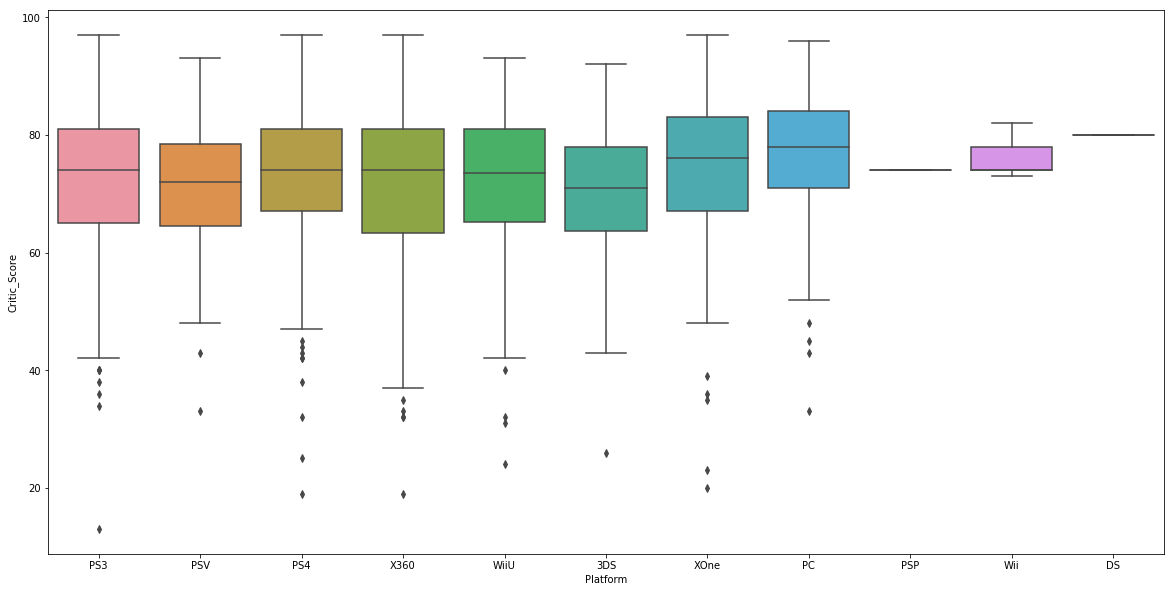

In [30]:
#create and show boxplot:
sns.boxplot(x='Platform', y='Critic_Score', data=VGR)
plt.show()

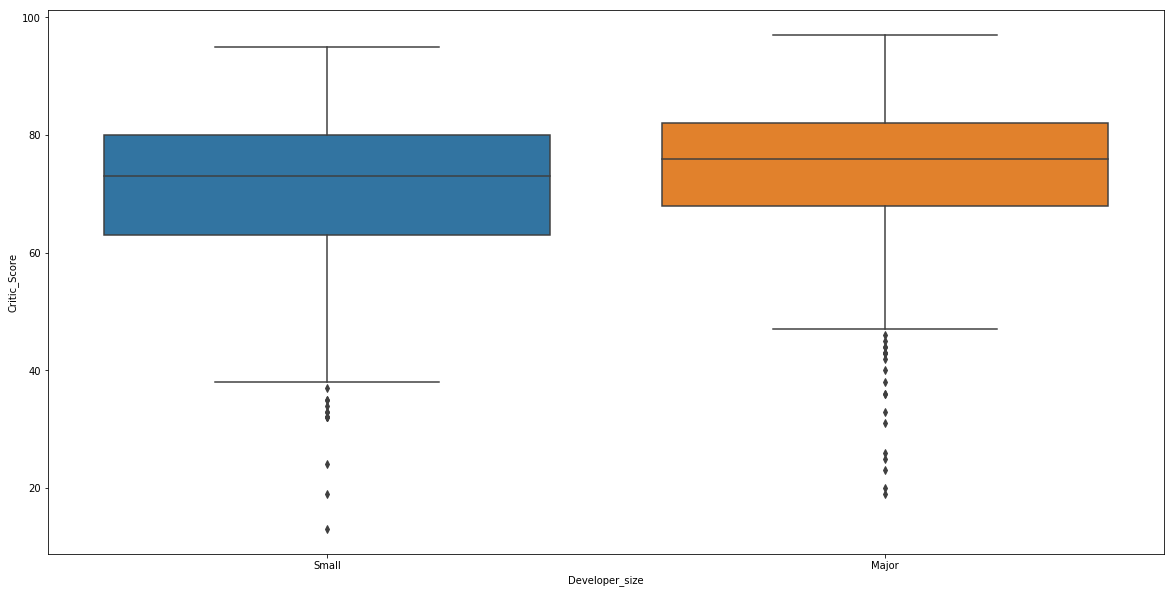

In [31]:
#create and show boxplot:
sns.boxplot(x='Developer_size', y='Critic_Score', data=VGR)
plt.show()

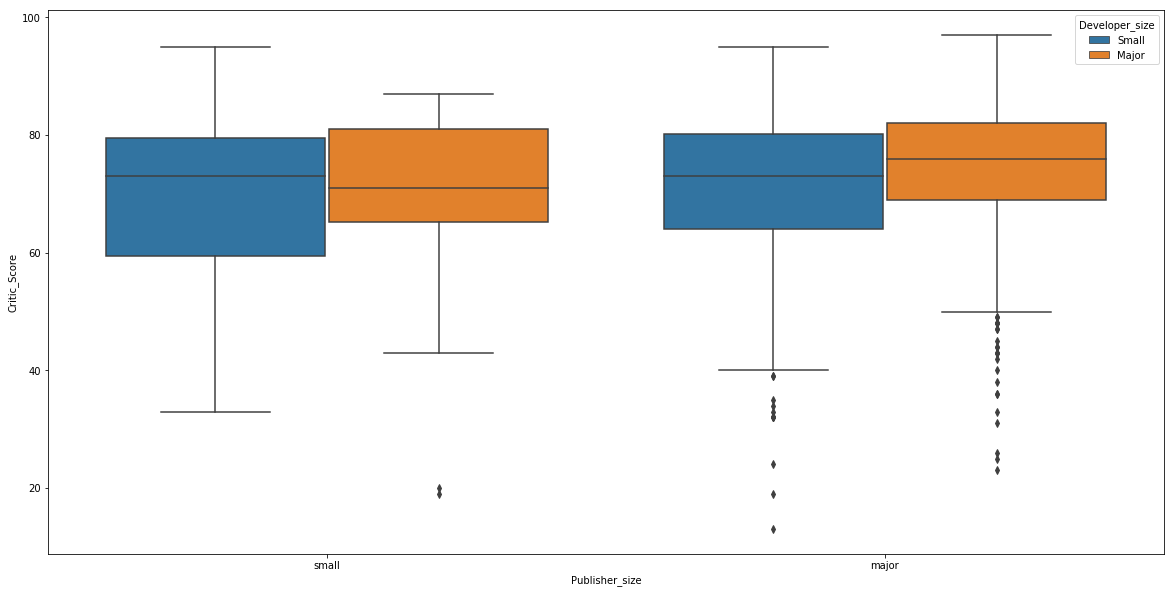

In [32]:
#create and show box plot:
sns.boxplot(x='Publisher_size', y='Critic_Score', data=VGR, hue='Developer_size')
plt.show()

Text(0,0.5,'Avg Critic Score')

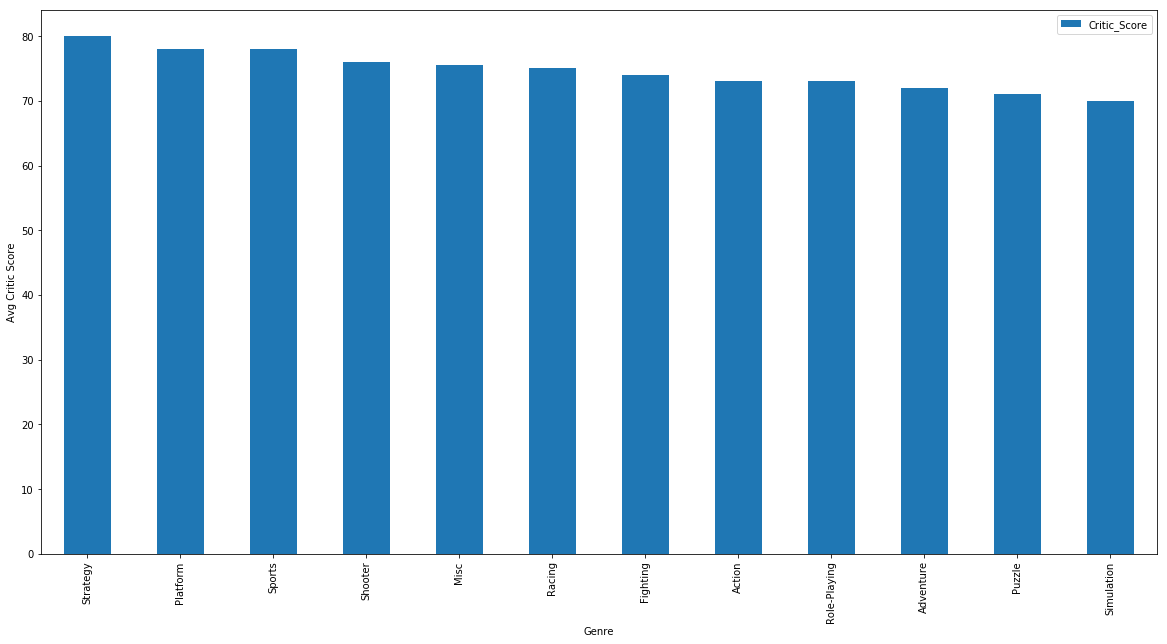

In [33]:
genre_avg = pd.DataFrame(VGR.groupby("Genre").Critic_Score.median())

genre_avg.sort_values("Critic_Score", ascending = False).plot(kind="bar")
plt.ylabel('Avg Critic Score')

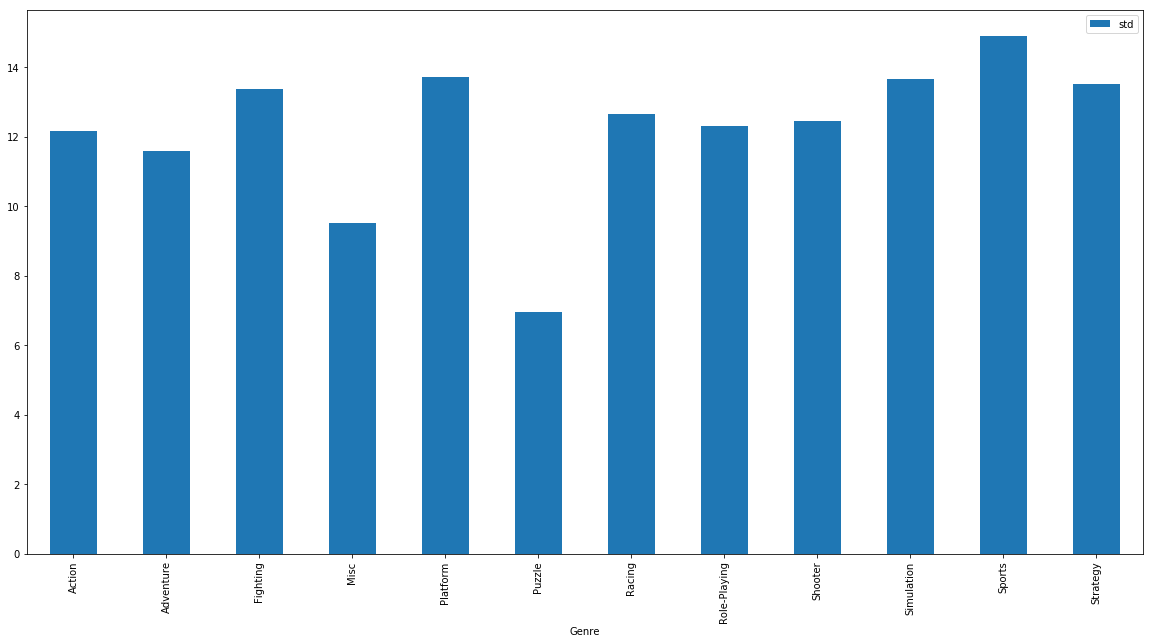

In [34]:
#Plot STD
top_genre = VGR.Genre.value_counts()

genre_std = VGR[VGR["Genre"].isin(top_genre.index)].groupby("Genre").describe()["Critic_Score"]

fig5 = genre_std.plot(y="std",kind="bar")

fig5 = fig5.get_figure()

fig5.savefig("STD_Genre_bar.png")

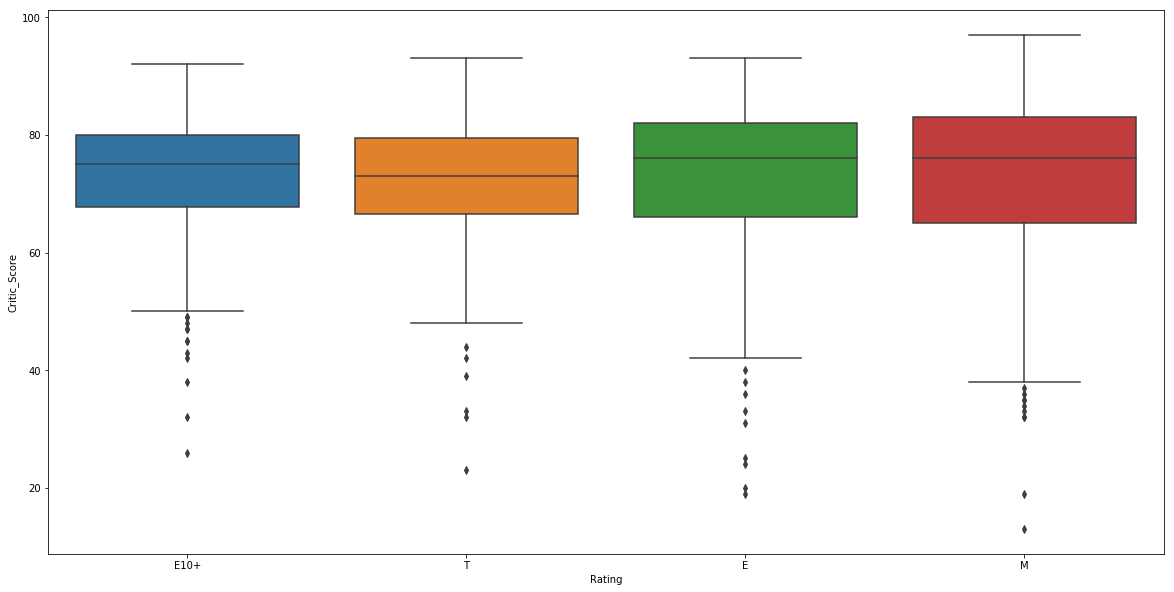

In [35]:
# plot of Genre and Critic Score 

fig5 = sns.boxplot(x='Rating', y='Critic_Score', data=VGR)

fig5 = fig5.get_figure()

fig5.savefig("Ratings_Score.png")

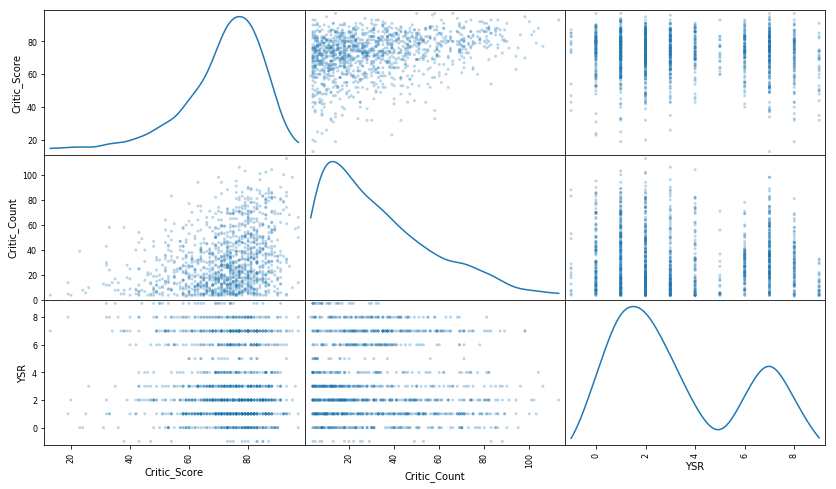

In [36]:
pd.plotting.scatter_matrix(VGR[['Critic_Score','Critic_Count', 'YSR']], alpha = 0.3, figsize = (14,8), diagonal = 'kde')

plt.show()

### Inferential Statistics

In [37]:
#Import Packages for analysis:
%matplotlib inline

import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

plt.rcParams['figure.figsize']=(20,10)

In [38]:
def Chi_test(data,c1,c2):
    #combine columns into matrix
    table = pd.crosstab(data[c1], data[c2])
    
    colsum = table.sum(axis=0)
    colpct = table / colsum
    cstable = stats.chi2_contingency(table)
    

    return print('Variable:', c1,'|',
                 'Chi Statistic:' ,cstable[0],'|',
                 'P-Value:', cstable[1],'|',
                 'Expected Value:', cstable[2], '|')
    
  

In [39]:
csGenre = Chi_test(VGR, 'Genre','Game_Quality')

csPlatform = Chi_test(VGR, 'Platform','Game_Quality')

csRating = Chi_test(VGR, 'Rating','Game_Quality')

csDeveloper = Chi_test(VGR, 'Developer_size','Game_Quality')

csCritic_Count = Chi_test(VGR, 'Critic_Count','Game_Quality')

csPublishers = Chi_test(VGR, 'Publisher_size', 'Game_Quality')




Variable: Genre | Chi Statistic: 74.4022947881 | P-Value: 4.94232940225e-05 | Expected Value: 33 |
Variable: Platform | Chi Statistic: 42.3961694001 | P-Value: 0.0661664171755 | Expected Value: 30 |
Variable: Rating | Chi Statistic: 35.2252283773 | P-Value: 5.43713568544e-05 | Expected Value: 9 |
Variable: Developer_size | Chi Statistic: 15.4126480718 | P-Value: 0.00149590673094 | Expected Value: 3 |
Variable: Critic_Count | Chi Statistic: 446.431976933 | P-Value: 1.16944961451e-08 | Expected Value: 291 |
Variable: Publisher_size | Chi Statistic: 11.7745588422 | P-Value: 0.00819671035784 | Expected Value: 3 |


# Model Construction Attempt 1

In [40]:
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold

C:\Users\eshai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [41]:
df = VGR.copy()

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating', 'Developer_size', 'Publisher_size', 'Game_Quality',
       'Platform_Date', 'YSR'],
      dtype='object')

In [42]:
df = df.drop(['Name', 'Year_of_Release', 'Publisher', 'User_Score', 'User_Count','Game_Quality', 'Platform_Date'], axis=1)

df

,Platform,Genre,Critic_Score,Critic_Count,Developer,Rating,Developer_size,Publisher_size,YSR
0,PS3,Action,70.0,52.0,The Workshop,E10+,Small,major,6.0
1,PS3,Action,74.0,69.0,SuperBot Entertainment,T,Small,major,6.0
2,PS3,Action,73.0,69.0,"Media Molecule, United Front Games",E,Small,major,6.0
3,PS3,Action,74.0,60.0,Crispy's,T,Small,major,6.0
4,PS3,Sports,87.0,23.0,SCEA San Diego Studios,E,Major,major,6.0
5,PS3,Sports,87.0,36.0,SCEA San Diego Studios,E,Major,major,7.0
6,PS3,Action,77.0,71.0,LightBox Interactive,T,Small,major,6.0
7,PS3,Action,50.0,16.0,Magenta Software,E10+,Small,major,7.0
8,PS3,Action,80.0,89.0,SCE Santa Monica,M,Small,major,7.0
9,PS3,Adventure,70.0,98.0,Quantic Dream,M,Small,major,7.0


In [43]:
#Create Dummy variables 


dfwd = pd.get_dummies(df, columns=['Platform', 'Genre', 'Rating', 'Developer_size', 'Publisher_size', 'Developer']).reset_index(drop=True)

X = dfwd.drop(['Critic_Score'], axis=1)

y = dfwd.Critic_Score



In [44]:
def get_low_variance_columns(dframe=None, columns=None,
                             skip_columns=[], thresh=0.0,
                             autoremove=False):
    """
    Wrapper for sklearn VarianceThreshold for use on pandas dataframes.
    """
    print("Finding low-variance features.")
    try:
        # get list of all the original df columns
        all_columns = dframe.columns

        # remove `skip_columns`
        remaining_columns = all_columns.drop(skip_columns)

        # get length of new index
        max_index = len(remaining_columns) - 1

        # get indices for `skip_columns`
        skipped_idx = [all_columns.get_loc(column)
                       for column
                       in skip_columns]

        # adjust insert location by the number of columns removed
        # (for non-zero insertion locations) to keep relative
        # locations intact
        for idx, item in enumerate(skipped_idx):
            if item > max_index:
                diff = item - max_index
                skipped_idx[idx] -= diff
            if item == max_index:
                diff = item - len(skip_columns)
                skipped_idx[idx] -= diff
            if idx == 0:
                skipped_idx[idx] = item

        # get values of `skip_columns`
        skipped_values = dframe.iloc[:, skipped_idx].values

        # get dataframe values
        X = dframe.loc[:, remaining_columns].values

        # instantiate VarianceThreshold object
        vt = VarianceThreshold(threshold=thresh)

        # fit vt to data
        vt.fit(X)

        # get the indices of the features that are being kept
        feature_indices = vt.get_support(indices=True)

        # remove low-variance columns from index
        feature_names = [remaining_columns[idx]
                         for idx, _
                         in enumerate(remaining_columns)
                         if idx
                         in feature_indices]

        # get the columns to be removed
        removed_features = list(np.setdiff1d(remaining_columns,
                                             feature_names))
        print("Found {0} low-variance columns."
              .format(len(removed_features)))

        # remove the columns
        if autoremove:
            print("Removing low-variance features.")
            # remove the low-variance columns
            X_removed = vt.transform(X)

            print("Reassembling the dataframe (with low-variance "
                  "features removed).")
            # re-assemble the dataframe
            dframe = pd.DataFrame(data=X_removed,
                                  columns=feature_names)

            # add back the `skip_columns`
            for idx, index in enumerate(skipped_idx):
                dframe.insert(loc=index,
                              column=skip_columns[idx],
                              value=skipped_values[:, idx])
            print("Succesfully removed low-variance columns.")

        # do not remove columns
        else:
            print("No changes have been made to the dataframe.")

    except Exception as e:
        print(e)
        print("Could not remove low-variance features. Something "
              "went wrong.")
        pass

    return dframe, removed_features

In [45]:
frame, rvd = get_low_variance_columns(X)

Finding low-variance features.
Found 0 low-variance columns.
No changes have been made to the dataframe.


In [46]:
print(X.columns)

Index(['Critic_Count', 'YSR', 'Platform_3DS', 'Platform_DS', 'Platform_PC',
       'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV',
       'Platform_Wii',
       ...
       'Developer_Yager', 'Developer_Yuke's', 'Developer_ZeniMax Media',
       'Developer_Zerodiv', 'Developer_Zipper Interactive',
       'Developer_Zoe Mode', 'Developer_h.a.n.d. Inc.',
       'Developer_id Software', 'Developer_n-Space', 'Developer_syn Sophia'],
      dtype='object', length=422)


In [47]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
m1 = ols('Critic_Score ~ Critic_Count + Developer + Critic_Count + Developer_size + Platform + Genre + Rating + Publisher_size + YSR',VGR).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5.132
Date:                Sat, 17 Feb 2018   Prob (F-statistic):           1.90e-90
Time:                        12:16:25   Log-Likelihood:                -4223.1
No. Observations:                1267   AIC:                             9276.
Df Residuals:                     852   BIC:                         1.141e+04
Df Model:                         414                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   65.9907      5.667     11.645      0.000      54.868      77.113
Developer[T.2K Games]                                                        9.8703      7.585      1.301      0.193      -5.017      24.757
Developer[T.2K Marin]                                                       -7.1477      6.759     -1.058      0.291     -20.413       6.118
Developer[T.343 Industries]                                                  7.4533      6.870      1.085      0.278      -6.030      20.937
Developer[T.4A Games]                                                        4.7198      9.742      0.484      0.628     -14.402      23.841
Developer[T.505 Games]                                                     -15.7677      9.778     -1.613      0.107     -34.959       3.424
Developer[T.5TH Cell]                                                        6.0535      7.398      0.818      0.413      -8.467      20.574
Developer[T.5pb]                                                            -2.3457      4.390     -0.534      0.593     -10.962       6.270
Developer[T.Access Games]                                                  -17.7097      9.820     -1.803      0.072     -36.984       1.564
Developer[T.Acquire]                                                       -18.2040      9.842     -1.850      0.065     -37.521       1.113
Developer[T.Activision, Behaviour Interactive]                              -7.1658      9.877     -0.726      0.468     -26.551      12.219
Developer[T.Activision, FreeStyleGames]                                     12.1581      9.949      1.222      0.222      -7.368      31.685
Developer[T.Airtight Games]                                                -16.6086      6.979     -2.380      0.018     -30.308      -2.910
Developer[T.Alfa System]                                                     1.0784      9.896      0.109      0.913     -18.345      20.502
Developer[T.Ambrella, The Pokemon Company]                                  -9.1143      9.877     -0.923      0.356     -28.500      10.272
Developer[T.ApolloSoft]                                                     -8.8462      9.836     -0.899      0.369     -28.151      10.459
Developer[T.Aqua Plus]                                                     -12.5299      9.837     -1.274      0.203     -31.838       6.778
Developer[T.Arc System Works]                                               -2.6388      3.198     -0.825      0.409      -8.915       3.637
Developer[T.ArenaNet]                                                        9.3599      9.887      0.947      0.344     -

Just taking a look at the model with all the data. Trying to use every single developer in the data frame cause a strong multicollinearity problem. We will need to find a way to use the feature 'Developer' in our model.

Model Construction attempt 2

In [49]:
# group by developer and calculate median critic score:
Devs = pd.DataFrame(VGR.groupby(by='Developer').median()['Critic_Score'].sort_values()).reset_index()

Devs = Devs.rename(index=str, columns={"Critic_Score": "D_median_cs"})

# Create Bin Names for Analysis : 
g_names = ['Poor','Average', 'Good', 'Great']

#Bins Limits
bins = [0, 50, 75, 90, 100]

# Sort Critic_Score into Game_Hist:
Devs['Game_Hist'] = pd.cut(Devs['D_median_cs'], bins, labels=g_names)

VGR = VGR.merge(Devs, on='Developer')



In [50]:
# Create Copy
df2 = VGR.copy()

df2.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating', 'Developer_size', 'Publisher_size', 'Game_Quality',
       'Platform_Date', 'YSR', 'D_median_cs', 'Game_Hist'],
      dtype='object')

In [51]:
# Drop irrelevant columns
df2 = df2.drop(['Name', 'Year_of_Release', 'Publisher', 'User_Score', 'User_Count','Game_Quality', 'Platform_Date','Developer','D_median_cs', 'YSR', 'Platform'], axis=1)


In [52]:
#Create Dummy variables 
dfwd2 = pd.get_dummies(df2, columns=['Genre', 'Rating', 'Game_Hist']).reset_index(drop=True)

In [53]:
#Split Df into predictors and target variable:
X = dfwd2.drop(['Critic_Score', 'Game_Hist_Poor','Developer_size', 'Publisher_size' ], axis=1)

y = dfwd2.Critic_Score

X.columns

Index(['Critic_Count', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_T', 'Game_Hist_Average', 'Game_Hist_Good', 'Game_Hist_Great'],
      dtype='object')

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Split predictors into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)



In [56]:
#Fit model to training set and print summary:
LR = LinearRegression()

model = LR.fit(X_train, y_train)


In [57]:

print('Explained Variation on training set:',model.score(X_train, y_train))
print('Explained Variation on test set:',model.score(X_test, y_test))

Explained Variation on training set: 0.538210092853
Explained Variation on test set: 0.487923291325


In [58]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': model.coef_})[['features', 'estimatedCoefficients']].sort_values(by='estimatedCoefficients', ascending=False)

,features,estimatedCoefficients
19,Game_Hist_Great,50.364446
18,Game_Hist_Good,37.634153
17,Game_Hist_Average,25.606009
12,Genre_Strategy,2.455028
3,Genre_Fighting,1.471696
6,Genre_Puzzle,1.272746
14,Rating_E10+,0.894276
1,Genre_Action,0.795832
0,Critic_Count,0.069880
8,Genre_Role-Playing,0.064439


Text(0.5,1,'Residual Plot')

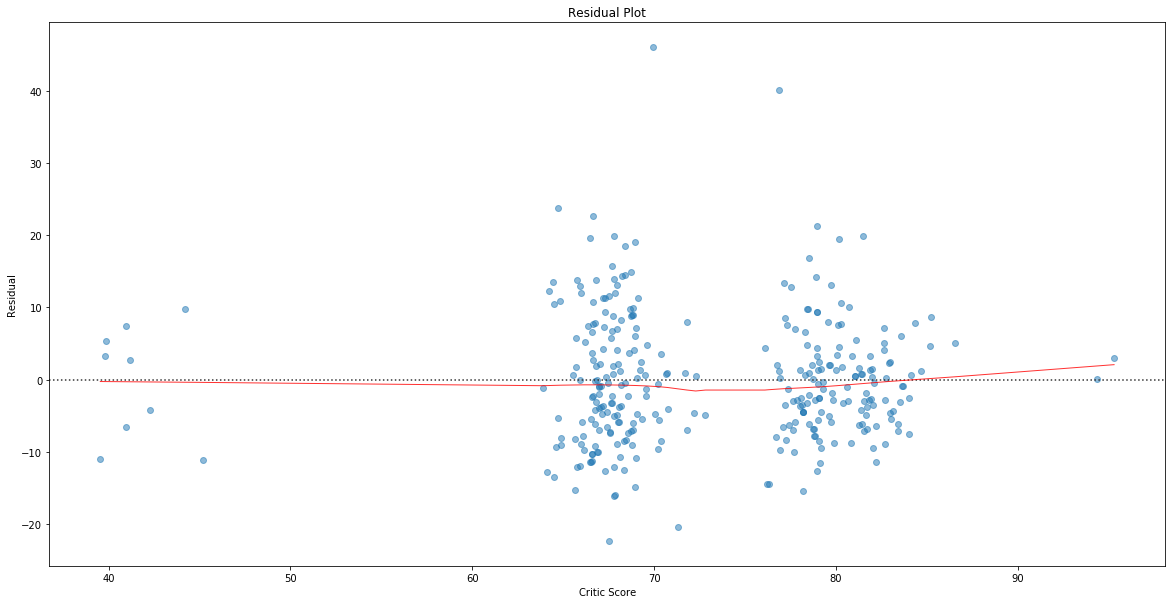

In [59]:
# fitted Values
fitted_y = model.predict(X_test)

# model residuals 
resid = model.predict(X_test) - y_test



# Generate Plot

sns.residplot(fitted_y, resid, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel('Residual')
plt.xlabel('Critic Score')
plt.title('Residual Plot')

Text(0.5,1,'Predicted VS Actual Critic')

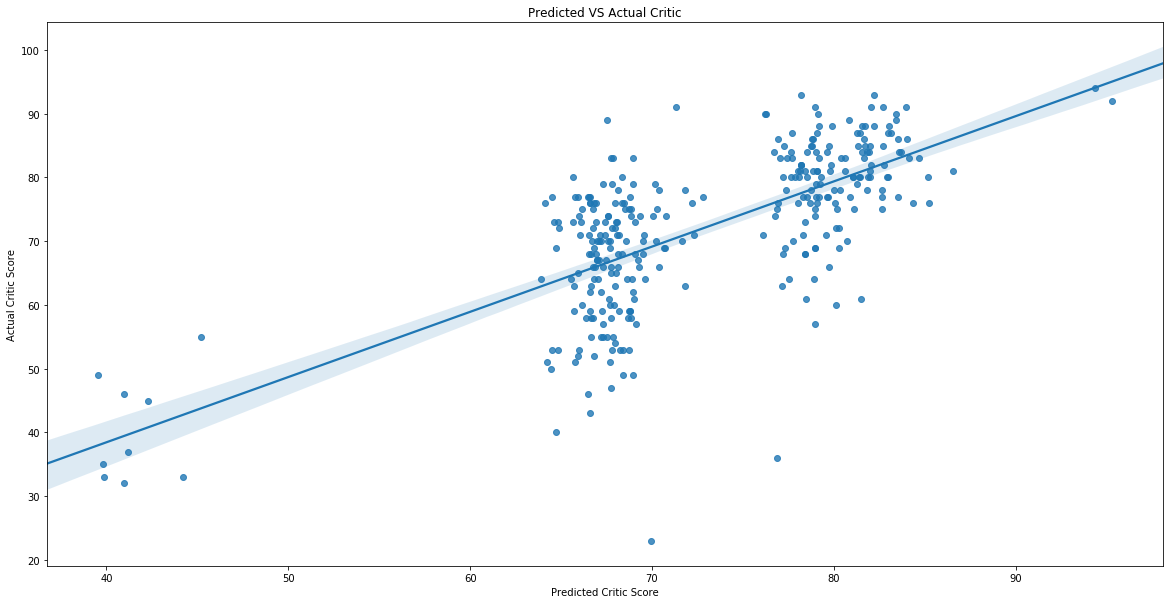

In [60]:
sns.regplot(fitted_y, y_test)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJUAAAJcCAYAAABAA5WYAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzs3Xl8XOd93/vPc2bDRhALMSAlkiIp%0AUSToRY6txbIlmRLBJHISO73xorZ23NxrW017Gzdt0vjVNk7qJrl24xvHuXklkWMntrMxjuM0Tus4%0AIUhrsSWF2izLIiBSIiWCEokBsRCzYJZzznP/OANwAGKZITALwO/79eKLxJyZ8zznYAYv4avn+f2M%0AtRYREREREREREZFKOPWegIiIiIiIiIiIrD0KlUREREREREREpGIKlUREREREREREpGIKlURERERE%0AREREpGIKlUREREREREREpGIKlUREREREREREpGIKlURERKThGGN2GGOsMSZc/PrvjTEfqsG4v2qM%0A+dNqj9Noivf6hlU83780xvzjEsfvNMa8sFrjiYiISH0oVBIREZErYox52RgzbYxJGWNGjDF/bIxp%0Aq8ZY1tp7rbVfLnNO/as9vjHmWmOMa4y5foFjf2OM+Uzx3+82xnzPGDNljLlgjDlijNmxzLl/tRjq%0A3FrBfKpynUuM9yPGmIeNMUljzKgx5iFjzLsWe7619s+stT9c8vo5oZW19hFr7Z5qz1tERESqS6GS%0AiIiIrMRPWGvbgDcDtwD/df4TTGBN/zeHtfZV4AjwwdLHjTFdwDuBLxdDk68A/xHYCOwEfg/wFzuv%0AMcYUzzkOVH0l1pUwxrwH+CuCa9sK9AKfAH5ikeeHazc7ERERqac1/R94IiIi0hiKocvfA68HMMY8%0AaIz5dWPMd4EMsMsYs9EY80VjzDljzKvGmF8zxoSKzw8ZYz5TXN1zCvix0vMXz/fhkq8/YowZLK6c%0AOW6MebMx5k+A7cDfFVdP/afic99qjHnUGDNpjHnWGLO/5Dw7i6tuksaYw8CmJS7zy8wLlYD7gOet%0Atc8BbwJOW2uP2EDSWvvX1tozS5zzTuAa4GPAfcaY6LzrLus6jTH7jTFn5712djWTMeZWY8xjxXtw%0Azhjzu/PHWkgx9Pot4L9ba79grb1orfWttQ9Zaz9SfM6/MsZ81xjzWWPMOPCrxce+Uzz+cPF0zxbn%0A+/758zXGbDPGfL24CmrMGPO7y81NRERE6k+hkoiIiKyYMWYbwYqdZ0oe/iDwUWAD8ApBKOMCNwA/%0ABPwwMBMUfQT48eLjNwPvWWKs9wK/Cvw00A68Cxiz1n4QOENx9ZS19n8YY64F/jfwa0AX8AvAXxtj%0Aeoqn+3PgKYIw6b+z9GqhvwE2GWPumHeNXyn++2lgbzFcubvMrYAfAv4O+Mvi1z9+JddZxjge8PME%0A13k7cAD4N2W8bg+wDfjaMs+7DTgFxIFfLz1grb2r+M+bivP9y9LjxWDxfxG8R3YA1wKHypibiIiI%0A1JlCJREREVmJ/2mMmQS+AzwE/EbJsS9Za5+31roEgc69wL+31qattQngswQrfQDeB/y2tXbYWjsO%0A/D9LjPlh4H9Ya58orgh60Vr7yiLP/QDwTWvtN4srbA4DTwLvNMZsJ9iy98vW2py19mGCgGdB1tpp%0Agm1gPw1gjNkNvIUgmMJaewrYTxCKfBW4YIz50mLhkjGmBXgv8OfW2gJBcFMaalVynUuy1j5lrX3c%0AWutaa18GHgDeUcZLu4t/n1vmea9Za/+/4vmnK5zerQSrtX6x+N7IWmu/U+E5REREpA4UKomIiMhK%0A/KS1tsNae5219t/MCxSGS/59HRABzhW3YE0SBBvx4vFr5j1/qfBkG/BSmfO7DnjvzJjFce8AthTH%0AnLDWpsscF4LVVu8zxjQRrFL6VjEgA6AY3LzPWttDsLXtLuC/LHKuf0awcuubxa//DLi3ZBVVJde5%0AJGPMjcaY/2WMOW+MmSII/5ba6jdjrPj3lmWeN7zM8aVsA14pho8iIiKyhihUEhERkWqxJf8eBnLA%0ApmII1WGtbbfWvq54/BxBuDBj+xLnHQYu68K2wJgzz/2TkjE7rLWt1tpPFcfsNMa0ljku1tpHCIKW%0AdxOsgvrKEs99Avg6xTpTC/gQ0AacMcacJ1gFFQH+ecncy73ONNAy80VxS1lPyfHfB4aA3dbaduA/%0AA2axuZd4oTiPn1rmefPnU4lhYLsKfIuIiKw9CpVERESk6qy154B/BP5fY0y7McYxxlxvjJnZgvVV%0A4OeMMVuNMZ3Ax5c43ReAXzDGvKXYWe4GY8x1xWMjwK6S5/4p8BPGmB8pFgNvKhaJ3lrcSvYk8N+M%0AMdFiraQFO5rN8xXg00AHJdvljDF3FAtrx4tf7yWog/T4/BMUaz0dIKih9Kbin5uK553ZAlfJdZ4A%0AmowxP2aMiRB04YuVHN8ATAGp4rx+tozrxFprgf8A/LIx5mdKvnd3GGM+X845FplvqWMEAd+njDGt%0Axe/R2ys4t4iIiNSJQiURERGplZ8GosBxYIKghtDMtqo/BP4BeJag4PXXFzuJtfavCIpB/zmQBP4n%0AQc0mCGox/dfiVrdfsNYOE6wq+s/AKMGqmF/k0n8D/QuCItPjwK+wxMqjEl8hWNH0l9baXMnjkwQh%0A0nPGmBTwLYLi3gsV0v4g8D1r7T9aa8/P/AF+B3ijMeb1FV7nRYLC218AXiVYuVTaDe4XiteaJLjX%0Ac4plL8Va+zXg/cD/CbxGEBD9GvC35Z6DoOD4l4vzfd+883sEYd4NBAXIzxbHExERkQZngv8BJSIi%0AIiIiIiIiUj6tVBIRERERERERkYopVBIRERERERERkYopVBIRERERERERkYopVBIRERERERERkYqF%0A6z2Bldi0aZPdsWNHvachIiIiIiIiIrJuPPXUUxestT3LPW9Nh0o7duzgySefrPc0RERERERERETW%0ADWPMK+U8T9vfRERERERERESkYgqVRERERERERESkYgqVRERERERERESkYgqVRERERERERESkYgqV%0ARERERERERESkYgqVRERERERERESkYgqVRERERERERESkYgqVRERERERERESkYgqVRERERERERESk%0AYgqVRERERERERESkYgqVRERERERERESkYgqVRERERERERESkYgqVRERERERERESkYgqVRERERERE%0ARESkYgqVRERERERERESkYgqVRERERERERESkYgqVRERERERERESkYgqVRERERERERESkYgqVRERE%0ARERERESkYgqVRERERERERESkYgqVRERERERERESkYgqVRERERERERESkYgqVRERERERERESkYlUL%0AlYwxf2SMSRhjflDyWJcx5rAx5mTx787i48YY8zvGmBeNMd83xry5WvMSEREREREREZG5XM9nMpNn%0AeDxT9muquVLpS8CPznvs48ARa+1u4Ejxa4B7gd3FPx8Ffr+K8xIRERERERERESCTdxmZyjI8Mc14%0AOk/B88t+bdVCJWvtw8D4vIffDXy5+O8vAz9Z8vhXbOBxoMMYs6VacxMRERERERERuVq5ns9EOs+Z%0AsQznL2ZJ51ystRWfJ1yFuS2l11p7DsBae84YEy8+fi0wXPK8s8XHzs0/gTHmowSrmdi+fXt1Zysi%0AIiIiIiIisg5Ya8nkPZJZl0zeXZVz1jpUWoxZ4LEFIzJr7eeBzwPcfPPNlcdoIiIiIiIiIiJXiYLn%0Ak8y6pLIurl/+1rZy1DpUGjHGbCmuUtoCJIqPnwW2lTxvK/BajecmIiIiIiIiIrLmWWtJ5z2S2QLT%0Aea9q41SzUPdCvgF8qPjvDwF/W/L4Txe7wL0VuDizTU5ERERERERERJaXd33GUjnOjGdITGWrGihB%0AFVcqGWP+AtgPbDLGnAV+BfgU8FVjzP8FnAHeW3z6N4F3Ai8CGeBnqjUvEREREREREZH1wlpLKueS%0AzLpkC9UNkearWqhkrf3nixw6sMBzLfBvqzUXEREREREREZH1JOcGRbfTORfPr0/J6UYp1C0iIiIi%0AIiIiIkvwfUsqH6xKytV4VdJCFCqJiIiIiIiIiDSwbOHSqiTf1mdV0kIUKomIiIiIiIiINBjftyRz%0ALslsgbzr13s6C1KoJCIiIiIiIiLSILIFj6lsgXTOwzbQqqSFKFQSEREREREREakjz7eksi5T2QIF%0ArzFXJS1EoZKIiIiIiIiISB1k8i6prEs63/irkhaiUElEREREREREpEYKnk8qG3Rwc/3GWZWULXg8%0A9tIYhwdHyn6NQiURERERERERkSqy1pLOeySzBabzXr2nM8vzLd8bnmRgcIRHTl4gU+HcFCqJiIiI%0AiIiIiFRB3vVJZgukci6e3xjb26y1vDSa5vDxEY4OJRhL52ePhRzDrTu6eKXMcylUEhERERERERFZ%0AJb5vSeWD7W25QuOsSjo/leXoYILDgyO8MpaZc+x117TT39fL/ht72NgS4dD95Z1ToZKIiIiIiIiI%0AyAplCx5T2QKZnIffIEW3k9kCD524wMDgCN8/e3HOsa2dzRzs6+WevjjXdjRf0fkVKomIiIiIiIiI%0AXAHPt6SyLlPZAgWvMYpu512fx0+PcWQwweOnxih4lwKujuYI9+yN078vzp7eDRhjVjSWQiURERER%0AERERkQpkitvbMnkP2wCrknxree7ViwwcT/DQiVFSOXf2WFPY4Y7dmzjQF+fm67oIOSsLkkopVBIR%0AERERERERWUbB80llgzDJ9RtjVdLpC2mODI4wMJggkczNPu4YeMt1nfT39XLHDZtojoaqMr5CJRER%0AERERERGRBVhrSec9ktkC0/nGKLp9IZXj6FCCgeMJXhxNzTm2p3cD/fvi3L0nTldrtOpzUagkIiIi%0AIiIiIlIi53qksi6pnIvn1397Wzrn8sjJCxwZHOHpM5OUzmjLxib6++Ic6Otle1dLTeelUElERERE%0ARERErnq+b0kVayXlCvVfleR6Pk+8PMHA4AjffWmMvHtpy117U5j9e+L098V53TXtKy64faUUKomI%0AiIiIiIjIVStb8JjKFsjkPPw6F9221nL83BQDgwkefGGUi9OF2WPRsMPbdnVzoC/OrTu7iIScOs40%0AoFBJRERERERERK4qnm9JZV2msgUKXv2Lbg+PZzgymGBgaITXJrOzjxvgTds76O/r5c7dm2iLNVaM%0A01izERERERERERGpkkxxe1sm72HrvCppIpPn20OjDAyOMHQ+OefY9T2t9Pf1cs/eOD0bYnWa4fIU%0AKomIiIiIiIjIulXwfFLZIExy/fquSpoueDz64gUODyZ48uVxSmuA97TFONAX1Ena1dNWv0lWQKGS%0AiIiIiIiIiKwr1lrSeY9ktsB0vr5Ftz3f8vSZCQYGEzxycpRs4VKw1RoL8Y4bezjY18sbtm7EqVPB%0A7SulUElERERERERE1oWc65HMuqRzLp5fv+1t1lpOJlIMDI5wdGiU8XR+9ljYMdy2q4uDfb28dVc3%0A0XD9C27PMMbQEg2V/XyFSiIiIiIiIiKyZvm+JVWslZQr1HdV0vmLWQYGRxgYTHBmPDPn2Buu3cjB%0AfXHu2t1De3OkTjO8nFMMklpiYVoiIRyn/NVSCpVEREREREREZM3JFjymsgUyOQ+/jkW3p6YLPHQi%0AKLj93KtTc45d19VSrJPUy+aNTXWa4eVmgqTWWJiWaAhzhdvuFCqJiIiIiIiIyJrg+ZZU1mUqW6Dg%0A1a/odt71eezUGAPHR/in0+O4JVvtulqjHNgbFNy+Id52xYHNags5huZoiLZYmObIlQdJpRQqiYiI%0AiIiIiEhDyxS3t2XyHrZOq5J8a/n+2YsMHB/hoZOjpHOXtto1R0LcuXsT/X1xfmh7J6EKtpBVU8gx%0AtETDtMZCqxYklVKoJCIiIiIiIiINp+D5JLMuqayL69dvVdKp0RQDgwmODCYYTeVmH3cM3Lqzi/6+%0AXt52fTdNkfILXFfTTJDUFgvTFHGqulJKoZKIiIiIiIiINARrLem8RzJbYDpfv6Lbo8kcR4YSDAyO%0AcGo0PedY35YNHNjby917e+hsidZphnOFHYeWWIjWaJjmCrq3rXjcmo0kIiIiIiIiIrKAnOuRzLqk%0Acy6eX7vtbcdOjXPoiWHOTU0Tb2vixt42XrqQ5tnhSUpncW1HM/19cQ70xdna2VKz+S1lJkgKViTV%0AZ5WUQiURERERERERqTnft6SKtZJyhdqvSjp2apzfPnIC17NkXY/npi7y3GsXZ49vbI5w954eDu7r%0AZe/mDQ1RcLsRgqQ586n3BERERERERETk6pEteExlC6Rz9Sm6ba3l+dem+M1/fIGJTJ7ShVGGIEz6%0ATz+6h5uv6yQccmo+v/kaLUgqpVBJRERERERERKrK8y3JbIFk1qXg1afo9pmxDANDIxwZTHDuYnbO%0AsZZIiPamoEtaOu/x1l3ddZnjjEYOkkopVBIRERERERGRqsgUt7dl8vVZlTSeznO0WHD7xEhqzrHm%0ASIhY2KGrJTK7Imm64LG5vbnm84Sga1trLNzwQVIphUoiIiIiIiIismoKnk8y65LKurh+7VclTec9%0AHnnxAkcGR3jqlYk529t622P09/VyoC9O4mKOzx09ScG3hEKWbMHH9S333bKtZnMNOYaWaBAk1bJr%0A22pRqCQiIiIiIiIiK2KtJZVzSeVcpvO1L7rt+ZYnXxln4HiC7754gax7Kcza0BRm/409HOiL8/pr%0AN+IUC27v6G7lY+zm0BPDnJ+aZnN7M/fdso1bd3VVda6lQVJTxGmIAuBXSqGSiIiIiIjUxINDCR54%0A+BTDExm2dbZw/1272L83Xu9pNRTdI1lrcq5HMuuSzrl4fm23t1lrGTqfZGAwwbeHEkxOF2aPRUKG%0A23d109/Xy607u4iGFy64feuurqqHSACOMbM1kpojoTUdJJVSqCQiIiIiIlX34FCCT3zjeSIhQ0dz%0AhEQyyye+8TyfBIUmRbpHslb4viWZc0lmC+Td2m9ve3VymiODIwwMJjg7MT3n2Ju2baS/r5e7dvfQ%0A1lTfyMMxhpZoiNZYmJbo+gmSSilUEhERERGRqnvg4VNEQsGWD4CWaJhM3uWBh08pMCnSPZJGly14%0ATGULpHO1L7o9mcnz4AujDAyOcPxccs6xHd0tHNzXyz174/S2N9V0XvPNrEhqja7fIKmUQiURERER%0AEam64YkMHc2ROY81R0KcncjUaUaNR/dIGpHnW5LZAsmsS8Gr7aqkbMHjsZfGODw4whMvT8zZXtfd%0AFqV/b5z+vl529bTWNbxZr1vbyqFQSUREREREqm5bZwuJZHZ2FQ4Erbu3drbUcVaNRfdIGsl03iOZ%0ALZDO13ZVkudbvjc8ycDgCA+fuMB04VLR75ZoiLt299C/L85NWzsIOfULb0KOoTl6dQZJpRQqiYiI%0AiIhI1d1/1y4+8Y3nyeRdmiMhpgseBc9y/1276j21hqF7JPXmej6pnFvzVUnWWl4aTXP4+AhHhxKM%0ApfOzx0KO4badXfT3xbl9VzexSKhm85rval6RtBiFSiIiIiIiUnX798b5JEHdoLMTGbaqs9lldI+k%0AXjL5IEjK1HhV0shUliODCQYGR3h5bO42z9df086Bvl7239jDxpbIImeovnKCpKu5a6OpdXGt1XTz%0AzTfbJ598st7TEBEREREREVlTXM8nmQ3CJNev3aqkZLbAQycuMDA4wvfPXpxzbFtnM/37ejmwN841%0AHc01m9N8lRTbLu3aWLrC8JPvet2aDpaMMU9Za29e7nlaqSQiIiIiIiJyFbDWksl7xVVJbs3Gzbs+%0Aj58e48hggsdPjVHwLi1u6WyJcPfeOAf7ermxt61uW8ocY2iJhmiNVda17Wrv2qhQSURERERERGQd%0Ay7s+yWyBVM6d00Gtmnxree7ViwwcT/DQiVFSuUshVlPY4Y7dmzi4r5c3b++sW8FtYwytVxAklbra%0AuzYqVBIRERERERFZZ6y1s0W3syUd1Krt9IU0RwZHGBhMkEjmZh93DNy8Iyi4/fbrN9EcrU/BbVO6%0AIikSwllhoHW1d21UqCQiIiIiIiKyTmQLwfa2dM7Fr1EN5QupHEeHEgwcT/DiaGrOsT2bN3CwL87+%0APXG6WqM1mc98qx0klbrauzYqVBIRERGRuriau+VIZdb7e6XS66vm/Vjv93q98vyZVUkF8m5tim6n%0Acy6PnLzAkcERnj4zSWl8tWVjEwf7ejnQF2dbV31W7BgTFM5uLRbcXs0gqdTV3rVR3d9EREREpObW%0Aa7ccWX3r/b1S6fVV836s93u9Hk3nPZLZAum8Ry1+t3c9nydenmBgcITvvjQ2J8Bqbwpz9544/fvi%0A7NvSXpeC2zMrklqi1Q2Srgbq/iYiIiIiDetq75Yj5Vvv75VKr6+a92O93+v1wvX82VpJBa/6q5Ks%0AtRw/N8XAYIJvDyWYyl4quB0NO7z9+m76+3q5eUcnkZBT9fnMN9O1raUKW9tkeQqVRERERKTmrvZu%0AOVK+9f5eqfT6qnk/1vu9XsustWTyQa2kTN5d/gWrYHg8w5HBBIcHRzh3MTv7uAF+aHsH/X293Ll7%0AE62x2scKTmmNpCvs2iarQ6GSiIiIiNTc1d4tR8q33t8rlV5fNe/Her/Xa1He9UlmC6RyLp5f/e1t%0AE5k83x5KMDCYYOh8cs6x63taObivl7v3xOnZEKv6XOYLOYbmaIi2WJjmiIKkRqFQSURERERq7mrv%0AliPlW+/vlUqvr5r3Y73f67XC9y2pvEsq65IteFUfb7rg8eiLFzg8mODJl8cpza7iG2Ic6IvT39fL%0Azk2tVZ/LfCEn2I7ZFgvTFHEUJDUgFeoWERERkbqY6TJ1NXbLkcqs9/dKpddXzfux3u91I8sWgu1t%0A6ZyLX+Xf0z3f8vSZCQYGEzxycpRs4VJtptZYiP03BgW333DtRpwaBzlhxwk6tsXCNEVCNR1bLim3%0AUHddQiVjzMeAjxBsx/xDa+1vG2O6gL8EdgAvA++z1k4sdR6FSiIiIiIii3twKMGnvzXEqQtpAHZ2%0At/Dxe/vWdEiglvdXRvetMXm+JZV1mcoWql5021rLyUSKw8dHODqUYCJTmD0WCRlu29lN/744b93Z%0ATTRc24LbkZAzWx9JQVJjaNhQyRjzeuAQcCuQB74F/CxByDRurf2UMebjQKe19peWOpdCJRERERGR%0AhT04lOAXv/YsE5kCM82QfAsdLRE+856b1mSgoJb3V0b3rfFk8m6x6LZHtX8nP3dxmiODQZ2kM+Nz%0Ai66/cetG+vt6eceNm9jQFFnkDNUxEyS1xkLEwgqSGk25oVI9air1AY9bazMAxpiHgH8GvBvYX3zO%0Al4EHgSVDJRERERERWdgDD58imXUJOWZ2+4rxLanc2m0Rr5b3V0b3rTEUPJ9kNqiV5PrVXZV0cbrA%0AQydGGTg+wg9em5pz7LruFg729XJPX5zN7U1Vncd8CpLWn3qESj8Aft0Y0w1MA+8EngR6rbXnAKy1%0A54wxC/50M8Z8FPgowPbt22szYxERERGRNWZ4IoPr+4RDl7axGBNst1mrLeLV8v7K6L7Vj7WWdN4j%0AmS0wna9u0e286/PYqTEGjo/wT6fHcUsqbne3Rrlnb5yD+3q5vqe1pgWvFSStbzUPlay1g8aYTwOH%0AgRTwLOBW8PrPA5+HYPtbVSYpIiIiIrLGbets4UIyh7VBmARgbdBNaa22iFfL+yuj+1Z7edcnmS2Q%0Ayrl4fvV+bfWt5dnhSQYGEzx8YpR0SXDVHAlx142b6O/r5U3bOgg5CpJk9dVjpRLW2i8CXwQwxvwG%0AcBYYMcZsKa5S2gIk6jE3EREREZH14P67ds3WVLIm+KXWt9ARi6zZFvFqeX9ldN9qw9pge2ky65It%0AVHdV0kujKQaOj3B0aJTRVG728ZBjuGVHJwf7ern9+u6aFr2Ohh1ao2FaFCRdVeoSKhlj4tbahDFm%0AO/B/ALcDO4EPAZ8q/v239ZibiIiISDWo85LU2v69cX7zPTfN6f52w6a13f1t/944n4S6tbxfq5/j%0A/XvjvOfsJF/4zmnSeY/WaIgP37FzTcx9LcgWPJJZl3TOxa9i0e3EVJajQ0HB7ZnP9Ix9WzZwoK+X%0Au/f00NESrdoc5otFQrQVg6RIqLYd46Qx1Lz7G4Ax5hGgGygA/8Fae6RYY+mrwHbgDPBea+34UudR%0A9zcRERFZC9R5SWTtW8uf47U890bl+5ZkziWZLZB3q1d0O5VzefjEKAODIzw7fJHS3963djZzYG+c%0A/r5eru1srtocShljaIo4tETDtEZDc2q2yfrSyN3fsNbeucBjY8CBOkxHREREpKrUeUlk7VvLn+O1%0APPdGM533SOYKpHMe1VqgUfB8jp0e5/DgCI+9NEbBuzROR3OEu/fG6e+Ls3fzhpoU3DYmCCNbYyFa%0AouGa1maSxleXUElERETkaqLOSyJr31r+HK/luTcC1/NnayUVvOqsSvKt5flXpxgYHOHBE6Mks5d6%0AWcXCDnfcsIn+fXHesr2zZquDmqOhoNi2giRZgkIlERERkSpT5yWRtW8tf47X8tzrKZMPgqRMvnqr%0Akl4ZSzMwmODIYILzU9nZxx0Db97eSf++Xu64oXvO966amiIzQZK2tkl5FCqJiIiIVJk6L4msfWv5%0Ac7yW515reTdYlZTKurh+dVYljaVyHH1hlIHjI5xMpOYc2x1vo39fL/fs6aG7LVaV8eebKbbdGlOQ%0AJJVTqCQiIiJSZfXuWCWy3lxJF7aVdm670s9x6bgbYuGg7XzeW3QOK5nnYq/Vz6ClWWtnt7dlC15V%0AxpjOezzy4gUGjo/w9JkJ/JKFT73tMfr7eunvi3Ndd2tVxp8vFgnRWtzepq5tshJ16f62WtT9TURE%0ARETk6nIlnczq1f2sdFzX83l1MtjedG1HE+GQc9kcVjJPdXirXLbgkcy6pHMufhV+L3Y9nydfmWBg%0AMMGjL14gW9IlbkNTmP039tDf18vrrm3HqUHB7aZIiNZomJZYSEGSLKuhu7+JiIiIiIhciSvpZFav%0A7mel454aTQXFji1cSOXZ1dN22RxWMk91eCuP51tSWZepbKEqRbettQydTzIwmODbQwkmpwuzxyIh%0Aw+3Xd9O/t5dbd3YRDVc32DHG0BRxaI2FaYloa5tUh0IlERERERFZM66kk1m9up+Vjpv3/NkOWvli%0AmDF/DiuZpzq8La3aRbdfnZwxZubSAAAgAElEQVTmyOAIA4MJzk5Mzzn2pm0b6e/r5a7dPbQ1VfdX%0AcGOClWqtsRAt6tomNaBQSURERERE1owr6WRWr+5npeNGQw6ub8FCtLhiZP4cVjJPdXi7nOv5JLNB%0AmFSNotuTmTwPvjDKwOAIx88l5xzbuamV/r449+yN09vetOpjl3KMoSUaoqW4IslRkCQ1pFBJRERE%0ARETWjCvpZFav7mel425qi87WVNrcFiOTdy+bw0rmqQ5vAWst6bxHMltgOr/6RbezBY9HXxpjYHCE%0AJ16ewCupuL2pLcqBvXH69/VyfU/bqo9dKuQYmqMh2mJhmiMhTA1qMoksRIW6RURERERkTZnpcnYl%0AXdhq3f2sdNy2Yve3dN5bdA4rmWe9rrER5F2fZLZAKufOCXpWg+dbnjkzwZGhBA+fuMB0SYe41miI%0Au27s4UBfnJu2dlR1u1nYcWaDpKaIoyBJqqrcQt0KlUREREREZMUWa2e/1sZYidL5bSgGSKm8V5O5%0Alo7dFg1WriRzbkPep9Xi+5Z0sVZStrC6q5KstbyYSDEwmODoUIKxdH72WMgx3Lazi/6+Xm7f1UUs%0AElrVsUuFHYfWWIjWWJimKo4jMp9CJRERERERqYlatLOvxRirNT/X82e3ul3b0UQ45FR1rvUcux6y%0ABY9k1iWdc/FX+ffZ8xezHBkKCm6/Mja3yPnrr2nnQF8v+2/sYWNLZJEzrFwkVOzYFg0pSJK6KTdU%0AUk0lERERERFZkVq0s6/FGCtROr9To6lgG5SFC6k8u3raqjrXy8Y2Bkxtxq4Vz7eksi5T2QIFb3WL%0AbiezBR46Mcrh4wmee/XinGNbO5s5uK+XA3vjXNPRvKrjlpoJklpjIWJhBUmydihUEhERERGRFalF%0AO/tajLESpfPLe/5sbZ18MQCp5lwvG7sYKtVi7GrLFLe3ZfIeq7nLJu/6PH56jIHjCf7p9BgF79K5%0AO1si3L03Tn9fnD29G6pWuygadmiNhmmNhYmGnaqMIVJtCpVERERERGRFatHOvhZjrETp/KIhB9e3%0AYCEaCsKCas71srGLAUktxq6GgueTzLqksi6uv3qrknxree7ViwwcT/DQiVFSOXf2WFPY4Y7dmzi4%0Ar5c3b++sWsHtaNihLRYOvlcKkmQdUKgkIiIiIiIrUot29rUYYyVK57epLTpb12hzW4xM3q3qXBcc%0A28Lm9uqPvVpmuuIlswWm86tbdPv0hTQDgyMcGUyQSOZmH3cM3Lyji/6+OG+/fhPN0epsO4tFQrRG%0Ag2LbkZCCJFlfVKhbRERERERmXWmHtdVuZ//gUIJP/f0gp4vFkndtauXe12/msVPjqzbGaiu9B23F%0A7m/pfLBK6PZdXTx2arxqnetKx24tdn9L5dzL7lM5399adtnLuz7JbIFUzsXzV+930wupHEeHEgwc%0AT/DiaGrOsT2bN3CwL87+PXG6WqOrNmapWCREWzRMSyykIEnWJHV/ExERERGRijRKh7UHhxL8wtee%0AZTJTYGYXkm+DWje/+Z6bGipIKkcj3dfl5lGLuVprSeVcprIuucLqrUpK51weOXmBgcERnjkzSelv%0Auls2NtHfF+dAXy/bu6qzFbApEirWSAoRVpAka5y6v4mIiIiISEUapcPaAw+fIpVzCRmDU0yVjLUk%0As2uzi1kj3dfl5lHNueZcj6lpl3TOxV+lxQ0Fz+eJl8c5Mpjguy+NkXcv1WBqbwpz9544/fvi7NvS%0AXpWC2zMrkhQkydVKoZKIiIiIiACN02FteCKD59ugi1mRMeB6/prsYtZI93W5eaz2XD0/WJWUzBbm%0ABD4rYa3l+LkpBo4n+PYLCaaylwpuR8MOb7++mwN9cW7Z0VWVrWcKkkQuUagkIiIiIiJA43RY29bZ%0AwoVUDusHYRKAtRB2nDXVxWxGI93X5eaxWnOdLhbdTuc9VqvkyvB4hiODCQ4PjnDuYnb2cQP80PYO%0A+vt6uXP3Jlpjq/9rrmokiSxMoZKIiIiIiACN02Ht/rt2zdZUssXizTM1lRq9i9lCGum+LjePlcy1%0A4Pmksi7JrIvrr86qpIlMnm8PJTg8mOCF88k5x27oaeNAX5x79sbp2RBblfFKqWubyPJUqFtERERE%0ARGatdhe3lcxjfve3X/rRvWuuntKMRrqvy82jkrnOFN1O5Vym86tTdHu64PHoixc4PJjgyZfHKW0K%0AF98Q40BfnP6+XnZual2V8UrNFNvWiiS52qn7m4iIiIiIrJpatpl/cCjBp781xKkLaQB2drfw8Xv7%0AKh6vlnMuZ8yFjgEVz7Ee1zVftuCRzK5e0W3Ptzx9ZoLDx0f4zosXyBYurXRqjYXYf2NQcPsN127E%0AWeWC283REC3RMK1R1UgSmaFQSUREREREVkUt2syXjvWLX3uWiUyBYuM3fAsdLRE+856byh6vlnMu%0AZ0zgsmNT0wUssLE5UvYc63FdM1a76La1lhMjKQYGRzg6lGAiU5g9FgkZbtvZTf++OG/d2U00vHph%0AjzGGpohDayxMazRMyFn9rnAia125oZJqKomIiIiIyJKq2WZ+obGSWZeQY2ZXpJhimFHJeLWcczlj%0AApcde3ViGgxs2dhc9hzrcV2rXXT73MVpBgYTDBwfYXhies6xN27dSH9fnLt299A+rwvdShgThHCt%0AsWBVkoIkkdWhUElERERERJa02m3mlxvL9f0525CMCVbJVDJeLedczpgWLjvm+j5m3lau5eZYq+ty%0APZ9kNqiVVPBWvirp4nSBh06MMnB8hB+8NjXn2HXdLRzs6+Wevjib25tWPFap5mKhba1IEqkOhUoi%0AIiIiIrKk1WozX+5YF5I5rA3CJABrIeSYisar5ZzLHXP+sbDjwLycY7k5VvO6rLVk8kGtpEzeXfH5%0AcgWPx06NMzA4wrHT47glFbe7W6PcszfOwX29XN/Telm4thJNkZkgSTWSRKpNoZKIiIiIiCxpJW3m%0Ar2SsmZpK1gQhhG+hIxapaLxazrncMecf29AUxkJFc6zGdRWKq5KS2QKev7LtbZ5vefbsJEcGEzx8%0AYpR0SUe45kiIu27cRH9fL2/a1rGqK4dikRBt0TCtMQVJIrWkQt0iIiIiIlexcjuJLdVmfqXdyOa/%0A/vZdXfz9D87P6f72zjds4bFT42WNMXO+k4kkedcnGjLs7m2vafe3mft0+66u2Xm3RUMYYxhN5ci7%0APr718a2h4Po4jim7y91S34ty5/gHD73EieL9CTuGHd1t3HfLNm7d1XVF1/3SaIqB4yMcGUpwIZWf%0AfTzkGG7Z0Ul/Xy9vu76bpkjois6/kGjYoS0WpjUWJqIgSWRVqfubiIiIiIgsaTU6ia30HOW8vpIx%0A6tkdrZxrm+n4FnYMY+li+GJh04YokVCo6vMceP48v/J3x8m7HhPp/Oz2u47mCJFwiI/ds7vsYCkx%0AleXIUIIjg4nZAHDGvi3t9PfF2b+nh46W6KrNfyZIaomGV7UjnIjMpe5vIiIiIiKypNXoJLbSc5Tz%0A+krGqEd3tMUsNJeZjm8hY3AwOI7Bt5apaZfNG8NVmae1Qfe8ZNbld7/9Eo6BVM7FFDvs+b4lnffY%0AFA1z6InhJUOlVNbl4ZOjDAyO8OzwRUqXKGztbKa/L86Bvb1c29m8avPXiiSRxqVQSURERETkKrUa%0AncRWeo5yXl/JGPXo+raYheYy0/HNwxIqFqc2BvKev+rzzLlB0e1U1sUv7lA5NzVNe1OYghdsuZsZ%0Av+D5NEUczk9NX3aegudz7PQ4hwdHeOylMQrepSipoznC3Xvj9PfF2bt5w6oV3I5FQrQWO7cpSBJp%0AXAqVRERERESuUqvRSWyl5yjn9ZWMUY+ub4tZaC4zHd9CxuB6FmOC7nbRkLMq8/R9SzLnksq55Are%0AZce3tDczls4RCTm4/qXxIyGHbMFnc3uwwsi3ludfnWJgcIQHT4ySzF7qBhcLO9xxwyYO9MW5+brO%0AVSuMrRVJImuPPqkiIiIiIlep++/aRcGzZPJusZ28W3EnsZWeo5zXVzLGalzTalloLhuawrTFwmxo%0ACuNjcX0f37e0N4dXNM9swSORzPLKeIaxVG7BQAngvlu24fqWtlgI61s838diaY2GcH3LPXt6+OJ3%0ATvOBLxzjY3/5Pf7u++dIZl0cA7fs6OTj9+7lr3/2dv7Lj/Xx1l3dKw6UIiGHzpYoWztb2NrZQkdL%0AVIGSyBqiQt0iIiIidTDTvenEyBQFzxINO+yOb1hxd6qVduGSq89incSWei8t1K3tm8+d4/RYsHVr%0A16ZWfulH91ZU7Hu5bmalz2ktdlFL5twF3+dX2h1toesqt+Pccuec6UQXCRl62mJBF7hklvwKPv+e%0Ab0lmCySzLgXPL/t1x06Nc+iJYV4ZTxe7v0FrLIIx8Opkds5zmyMhQg5c19XKB9963YL1lmbOd25q%0Ami3tzct2kYuEHFpjYVpjIWLh1esGJyKrR93fRERERBrUTEeovOutavenRup6JWvbUu8l4LJjF6cL%0AGKC9OVL191613ufzzzuWzpFI5ulpi7KpLbaicVZ7zpl8UHQ7k/e40t/nMnmX75y8wOHBBM+cmcAv%0AOc3m9ib6tmzguVcv0hwJ0RQJtsa5vr2sO9yxU+N87uhJwo5Z8nlhx6E1FtRIaoooSBJpdOWGSlpX%0AKCIiIlJjMx2hklkXB0PYcXAcw9S0SyRkeODhUys6b0s0jDHB3ys5n1y9lnovLXRsprNYLd571Xqf%0Azz/v1HSw5SuZdVc8zmrMOe/6jKfznBnLcP5ilnTOrThQcj2fx0+N8Wv/e5Cf+v3H+NS3XuCpV4JA%0AaUNTmJ+4aQufe/+b+LMP38pEukBzJERzJIQhCMPCjuHQE8NzznnoiWHCjlnweSHH0N4c4ZqOZrZ3%0At9DdFlOgJLLOqFC3iIiISI3NdITKe/6qdn9qpK5XsrYt9V6ycNkxz7eXBRzVeu9V630+/7x5z8cp%0Afi5XOs6Vztn3LeniqqTsIjWSlmOtZeh8ksPHR3jwhVEmpwuzxyIhw+3Xd3Owr5dbd3bNqWU00yWu%0A1ELd4S57noHWaIjRVJbruluvaM4isnYoVBIRERGpsZmOUNGQs6rdnxqp65Wsbcu9l+YfCzkG7NxW%0A8tV671XrfT7/vNGQQ97ziZYELVc6TqVzzhY8klmXdM7Fv8Ltba9OTDMwOMKRoQRnJy4FQQa4aVsH%0AB/vi3HljD22xhX8lnOkS11yysqi0O1zp88YzOVqiYULGYExwbdu7FCiJXA20/U1ERESkxmY6Qq12%0A96dG6nola9tS76WFjs10M6vFe69a7/P5521vDs9uC1vpOOXM2fV8JjN5hsczvDY5TTJbqDhQmszk%0A+ZtnXuXf/vnTfPCPjvHlx16ZDZR29bTy0Tt38hcfuY3fet9N3PuGLYsGSnCpS9x0wcMS/O36lvtu%0A2QaAMYbWWJj737ELa6Hg+bOBkn7uiFw9VKhbREREpA5mO0KNTK2o+9Ni562065XIfEu9lxY6BtTs%0AvVet9/n88850f1uNcRaa8zv29JDJB6uSpgtXVnQ7W/B49KUxBgZHOHZ6fE7B7U1tUQ7sjdO/r5fr%0Ae9oqPvdMV7fzU9Nsbm/mvlu3sX9PPCi4HQ3jOGbRa9PPHZG1Td3fRERERESkofz8oaf5xvfP4/mW%0AkGN41xs389n73lz1cWdCj+GJDNsaIPTIuZe2t3m+nQ1vzk1Ns6W9mftu2Tanc9p8nm85dOwMX3/m%0AVSYzBUp/o2uNhrjrxh76++K8cWtHsDVxhZqjQde21mh4Vc4nIo2v3FBJNZVERERERKTqfv7Q0/zN%0A987Nfu35tvj101UNlh4cSvCJbzxPJGToaI6QSGb5xDee55NQ02DJ8y2prEsyVyDvXir+fezUOJ87%0AepKwY2hvCjOWzvG5oyf5GLvnBEvWWl5MpBgYTPCt58+TzLpzzh8LO7znzVv5wFu3E1uFDmtNkSBI%0AaospSBKRxSlUEhERERGRqvvG988DQafDGdYGj3/2vuqN+8DDp4iEzGyR7JZoUPvpgYdPVT1UCuon%0AeaRyLpn8wtvbDj0xTNgxswWxmyMhpgseh54Y5tZdXZyfynJ0MMHhwRFeGZvbLa454rChKcKGWJi8%0A5/P8a1MrCpRikRBt0TCtsRDhkMrvisjyFCqJiIiIiEjVef7CZTcWe3y1DE9k6GiOzHmsORLi7ERm%0AkVesXM71SGVdUsXtbUs5NzVNe9PcX8siIcOpCyk+duh7PPfqxTnHtne1MJbO0dMWJRq6FCA1OQ7n%0Ap6apVDTs0BYL0xoLE1GQJCIVUqgkIiIiIiJVF3LMggFLtbdWbetsIZHMzq5UgqBD2dbOllUdZ7Ht%0AbcvZ0t7MWDpHLOyQznkkcwVSOQ9gNlDqbIlwoC9Of18vu+Nt/Mevfp+xdA5KFiVlCz6b25vLGjMS%0AuhQkRcMKkkTkyilUEhERERGRqnvXGzfzN987x/wdYO964+aqjnv/Xbv4xDeeJ5N3Z7eWrVbL+3K2%0Aty3Ft5Zbd3byJ4+fIet6c+5NNOTwjj1Bwe03b++cE77dd8s2Pnf0JNMFj6aIQ7bg4/qW+27ZtuhY%0AkZATFNuOhYiFV15zSUQEFCqJiIiIiEgVzXReO5lIEjbgFoMTx8BtOzo5P5Xnjk8fXbAr2/yubZvb%0AoxwZGiWd92iNhvjwHTv5uf4bl51DazTEqQtpAHZ2t/DLP7avrHpKi3WNm9+9rVKnL6Q5fHyEo0MJ%0AEsncnGPNkRDvvukaPvi262brLM13664uPsZuDj0xzPmpaTYv0jEu7Di0xoKC202rULy70TValz+R%0Aq4GpNE1vJDfffLN98skn6z0NERERERFZwEzntYLncSGZh+Jim+7WKK5vMUB7c2TOCqJPvut17N8b%0An9O1baYG0uS0S8iBsGPwLfgWPnbPDYsGS/PPMX+McuY+89pM3iXvWv59/27efF1nxfdiNJnj6FCC%0AgcERXhpNzzkWDRk2NkeIhBws8LF7dl8WEJUr5ARFyTc0XR1B0oyVfK9F5HLGmKestTcv9zytVBIR%0AERERkaqY6bw2lnJxHINjDL5vSWZdPGvBwuaNQR2g+V3Z5ndtm8q6QNAxzjEOjgHX9/nCd04vGiqt%0ApPPbAw+fIuxALBzC9S1hx6FgPP708TNlh0rpnMvDJy9wZHCEZ85MUvq/86/paMLzLMZAe9OlQuKl%0And/K5RhDSzREW1OY5kgIY6pbp6oR1bPLn8jVTKGSiIiIiIhUxUzntbznz9YEMgbyXlDIev6uidKu%0AbPO7ts3sMit9iWMgnfeWHX+xMRaTLXi8PJamLRbG9S4V3W6KLN9hreD5PPHyOAPHEzx6amxO0e6N%0AzRH27+nhYF8vfVs28C++8E9smNf5rZwxAIwJVuS0NYVpjV6dQVKpenT5ExGFSiIiIiIiUiUzndei%0AISfY7maCUCgacoorleYGIaVd2eZ3bXNMECyVZie+DeolLTd+OZ3fCp5PKuuSyrkUPJ/eDU2MpXNz%0A6hot1mHNWsvzr00xMJjgwRcSs6uqAKJhh7df383Bfb3cfF0n4dClbmsznd/KGWNG02yQFK5657y1%0ApFZd/kRkLvWPFBERERGRqrj/rl0UPEt7cxjft7i+j49lQ1OYtlhQ9yeTd4td1Nw5XdlmXjtzvL24%0AoscY8K0fnMvCh+/Yuez4i43h+5apbIHXJqcZHs8wkclTKK5Muu+Wbbi+ZbrgYQn+nt9h7cx4hj/+%0A7mk+8MVj/Nyh7/GNZ19jKutigLds7+A//cge/vpf384v//g+3rqre06gVO4YEART3a0xtne1cE1H%0AM+1NEQVK8yz3vRaR6qhLoW5jzM8DHwYs8BzwM8AW4BDQBTwNfNBam1/qPCrULSIiIstZD92A1sM1%0AyNq23Htw/vHbd3Xx2KlxhicytEVDpPMe5y9mca0lZOCGnjY+fm8fwGxnuLzrEwkZbuxtnz3/zHnP%0ATmTYukD3twN7ezg/lV/yszH/HB+9cye3Xd9NKuuSznuXbcErdezU+GUd1m7obePbLyQYOJ7ghZHk%0AnOd3tUZ5/81b6WyOcuiJMwxPBtvYtnW28NE7d82pkzRz7pOJJNMFb3bV1fvespUPvm0HkZBDaywI%0A36LhpdcCPDiU4NPfGprT4e7j9/Y11M+JWvwcm/+91s9KkStXbqHumodKxphrge8A+6y108aYrwLf%0ABN4JfN1ae8gY8wfAs9ba31/qXAqVREREZCnroRvQergGWduWew/OP34hlWM0lSe+IUp3a4yxdI5E%0AMk9PW5RNbbFlX1/ue7zS12ULHqmcSzrn4vmV/Q40XfD47osXGDg+wpOvTDD/5Y4JGttZ4J49PTx1%0AZpKp6QIzi4l8G3S5+6Uf2cutu7o4dmqczx09iet5TKQLs13xOlqixMIhfuXH9/HDr99c1tweHErw%0Ai197lonM3PE6WiJ85j03NcTPCf0cE1l7yg2V6rX9LQw0G2PCQAtwDrgH+Frx+JeBn6zT3ERERGSd%0AKO0GZEzwdyRkeODhU/WeWtnWwzXI2rbce3D+8WTWxTEwNe1ijGFqOvg6mXXLen257/FyXud6PpOZ%0APMPjGV6bnGZqulB2oOT5lmOnx/mNbw7yU7/3KL/xzSGOvRwESm2xMGHHEDIQDRkiIYdwKOhId/SF%0AUdJ5F8cYHMcp/jGkcy6HnhgG4NATw4QdQyrn4TiGsOPgYJjOezRFHP740Zcr+v4ksy4hxxBynOCP%0AMaRybsP8nNDPMZH1q+aFuq21rxpjPgOcAaaBfwSeAiattTMV7c4C1y70emPMR4GPAmzfvr36ExYR%0AEZE1az10A1oP1yBr23LvwfnH856PU9Lhbf7Xy71+/vFK5zU8niaZLZDKuUwv0RluIdZaXhhJMjCY%0A4NtDCSYyhdljkZDhtp1Bwe3bdnbxzt95hJDDnK5rxoDvB7WanHmPe56d7ep2fmqajuYI54pd8Ywx%0AOE5wjyr9fA9PZHB9f069JmOCUKxRfk7o55jI+lXzUMkY0wm8G9gJTAJ/Bdy7wFMX/F8I1trPA5+H%0AYPtblaYpIiIi68B66Aa0Hq5B1rbl3oPzj0dDDnnPJ1oMOeZ/vdzr5x8vd16+b0nlC2za0MRoMlfR%0ANb42Oc2RwQSHB0c4OzE959hNWzfS39fLXTduYkPTpWCkORIi53qzW9cg6GznGHAcg/UvdaqzFkKO%0AYWtnUGh756Y2EskssXAIt7hyaqYrXqWf722dLVxI5rB24fEagX6Oiaxf9dj+1g+cttaOWmsLwNeB%0AtwEdxe1wAFuB1+owNxEREVlH1kM3oPVwDbK2LfcenH98Q1O4WEMoHHRtaw6+3tAULuv15b7H779r%0AF3nXJ5ktkCt4TGUL5F3LfTdvW/J1My5mCvzt917l3/3FM3zgi8f440dfng2Urutu4cN37OQvPnIb%0An33/m/ixN26ZEygBvO8tW/EteL6Pb/3i30FNpdZoGN9afN8v/rFsbI7wf999A02R0JJd8Sr9fN9/%0A1y42NIXxfIvnB/PwrKUtFm6YnxP6OSayftWjUPdtwB8BtxBsf/sS8CRwF/DXJYW6v2+t/b2lzqVC%0A3SIiIrKc9dANaD1cg6xty70H5x+f6f622NfLvX6p97jnW1I5l1TO5ZEXRi/rzlbaYW2+XMHjsVNj%0AHD6e4NjL43PqK3W3RTmwN05/Xy/X97TO2da2mD959GW++tRZpgsezZGgc9vP3LGL7w1P8LtHT/LK%0AeBBS7drUyi/96N4Fr3mm8100ZNhd0vmuEmup+5t+jomsDQ3b/Q3AGPPfgPcDLvAM8GGCGkqHgK7i%0AYx+w1i65blWhkoiIiDSqctpnV6PFdrXadteiHbjIYqy1/MMPzvOHj5zm7GSGLe3N/NC2jTwzfJFz%0AU9NsWSJQ8nzLs8OTHB4c4ZGTF8iU1FlqiYa4c/cmDvb1ctO2DkLO8kHSQowxtEZDPPPKBF967BV9%0ATkRkzWvoUGm1KFQSERGRRlRO++xqtNiuVttutQOXeskWPFI5l6PHR/jskZOEHUNTxGEinWc8U6C7%0ANUJHS5Rswcf1LR+7Zze37urCWsup0TSHB0c4MpRgLJWfPWfIMdy6o4uD++LcvqubWCR0xfNrjoZo%0Ai4VpjYZ5+MSoPicism6UGyrVvFC3iIiIyHpX2j4boCUaJpMP2nvP/HJZznOqMW4jnVdkIa7nk84F%0ANZIKxY5xf35smLAThDUA6byHYyCV8+hsuRTifOWxV3hxNMWRoQSni1vBZuzb0s7BfXH23xhnY0vk%0AsnHLFQk5bGgK0xYLz+m4ps+JiFyNFCqJiIiIrLJy2mdXo8V2tdp2qx24VJu1lnTeI5V1yeTdy46f%0Am5qmvenSry4Fz8eY4O+ZGktT2QLDE9McPz81+7ytnc0c7Ovlnr4413Y0X/H8wo5DayxEW1OYWHjh%0AlU36nIjI1UihkoiIiMgqK6d9djVabFerbbfagUu1ZAseyWKQVFo0e74t7c2MpXOzK5XCjiHvBc8/%0AdSFN6Ss7miPcvTfOwX1x9vRuKKvg9kJCTrDqqC0Wpjm6/BY5fU5E5GrkLP8UEREREalEOe2zq9Fi%0Au1ptu9UOXFaT6/lMZvIMj2d4bXKaZLawZKAEcN8t2ygUX3d+KkvOtfgWfAsWMEBTxOFn3raDv/rX%0At/Pv7rmBvZvbKw6UjDG0xcJs3tjE9q4WejbEygqUQJ8TEbk6qVC3iIiISBWU0z57seespNNatdp2%0AL9YyvtpdrtR1rvFcyffE9y3pvEsq5zJd0n1tMcdOjXPoiWHOTU3T2Rxly8Ymnjk7yWSmMPscA7TF%0AwjgGtne18i9v275g97elzr2lvZn7bt3G/j1xnnllgi8/9jJnJ6ev+L1W7udvNT7j+kyISDWp+5uI%0AiIjIGrQWOq3Vao5r4V5cbSr9nmTyLqmsSzrvUe7vHcdOjfNbAyfIux7TBZ+c6885fmNvG/19vdyz%0AN05Xa7Si+R87Nc7njgZd5JqjIfJuUJPpvW/ZyteefrUm77WVvK/1mRCRWik3VNL2NxEREZEGUtpB%0Aypjg70jI8MDDp+o9tU4ECtMAACAASURBVFm1muNauBdXm3K+JznXYyyV48xYhvMXs6RyblmBUibv%0A8g/Pn+fXvzlIIpljctqdDZRCjqF3Q4wv/atb+IMPvIX3vGVrxYESwFefGub/Z+/eo+O47/vuv38z%0AsxfsLkCCJABSEimREimCsmPZlmxJlmlZBJO4eWL34iRym9RN41hJ09rpxSfuJU7jnJ7HOU0vdvsk%0AlqI2cZo+VhynSdT2SRpCEkVJli3KsmVbBEVKoESIIrHEhQSw95n5PX8ssFyAILAL7AIL4PM6hwfC%0ADuY3v9mZobBfznw/Mc9hU1uEmOfSHo8Q9RweeebMip1ryzmvdU2ISKtRo24RERGRFrIWEqRWao5r%0A4b3YaK51TIbGMlzOlpgslCjOubNoIX4Q8sIb4xw5Mcw3XhuddVeSY6A97tERixCLGKYKAbu21t/0%0AOuo5pGIeyZhHerLA5rbIrF5LbRGXTDFgV2R276RmnWvLOa91TYhIq1FRSURERKSFrIUEqZWa41p4%0ALzaa6mNibblZdqZQYlt7nNFMoaYxrLUMnJ+kf2CYJ1+5yOXclT5JEdeQjHp4jqEzcaX4kysFbO9o%0Aq3meEdchGSsnt0W9Kw9nXOucSkbLj5KtxLm2nPNa14SItBo9/iYiIiLSQtZCgtRKzXEtvBcbzYMH%0A91DwQybyJQp+yGS+RDGwPHDHzkXXfXM8y+9/43V+5r8+zz/86nf4s+++xeVcCQPcvnMzn/nhffzJ%0AL97DZ390PxHPIe+HWCy5UoAfWh64c+FteE75sbbrNrexc0uCLcnorILSzPznO6c+ce/uFTvXlnNe%0A65oQkVajRt0iIiIiLaZZCW6NtFJzXAvvxUZQCkKm8uX0tmdPj/Do8SEuTOTY3tHGA3fuvGbq2ni2%0AyJMnL9I/MMzJC5Ozlu3ZlqSvt5v793fT3RGftWwmoW2xbTjGkIi5tMcitEXdq5bPZ7HUxZU415az%0ALV0TIrISlP4mIiIia04zo7Krx26PlR/dmSoGC27n6Mk0X/iLAV69OEVgwTOGW7pT/MqP7m+pD3GK%0AGF+c3qP6haFlajq9LV8Kal4vXwp49tVR+geGOf76GGHVx41tqSh9vT30tMd46tQI5ydy7Oho4507%0AN/GdocuV7+crIs0Ums5P5EhFXTzHYaros2tL8qrjefRkmt/8y5MMjmQA2L01wWc/1NuQY77a59Jy%0At7/a8xeRtUFFJREREVlTmhmVXT22H4Scu5QH4PrNcTzXmXc7R0+m+Wdff4mxqSLVbYddA1uSUf7t%0AR9/REh/EFDG+OL1HtSs/UhWQKfhkikFNqW0AQWh58ew4jw+kefr0CLmqIlQy6vKBfV0c6u3mHTs3%0A88KZcb74xGk8xxCPOFzKFhnNlNiSiNCZjJIvhfih5dP3760Ulp4fHONLT54m5joEYchbl8v9m+a7%0Aho+eTPOZr7/EeLaEM92PO7SwORHht5Z53a72ubTc7a/2/EVk7ai1qKSeSiIiItISmhmVXT32yFQR%0A1zG4xjAyVbzmdh46NliOQp/+3hgwlD+cTub9lonwVsT44vQeLS5fChiZKnB2LMvwRL587i9SULLW%0Acmp4kt8++io/9fA3+ZU/+T5/dWKYXCnAcwzvu3krv/bjB/iTX7yHf/Yjt/LOXZ04xvDo8SE8p1zU%0AMJRT3RwDmWKAofy655R/ri3qsjUV48++e462iEsqHmE0U8I1BteZ/xp+6Nggk3m/fJ07TvmPMUwV%0Aln/drva5tNztr/b8RWT9UfqbiIiItIRmRmVXj10MQtzp2xeKQXjN7QyNZwlCy6yP1QasBT8MWybC%0AWxHji9N7NL+iH5IplPsklYJw8RWmXbic5/GTw/SfSPPG2Oz38G3XdXD4QA8f2NdFx5z3fMb5iRwd%0A8SsfQ0pBiDFU5uA4hlTMY2Qqz45N5cS3Ny/lZl/D01Xe+a7hofEsfhjiuVf+/dyY8t1Uyz3mq30u%0ALXf7qz1/EVl/VFQSERGRltDMqOzqsaOugx9asBCd/tA533Z2diYYmSrgB1WFJVu+W8lznJaJ8FbE%0A+OL0Hl0RhJap6UJSoY4+SRO5Ek+dukj/QJrvn7s8a9muLQn6ers51NtdKQItZEdHG6OZAm2RcmPt%0AiOtQCkKirkPUczDGkC367NySrKxz1TUclK/K+a7hnZ0JRiYLWFsuJkG5GOw6ZtnHfLXPpeVuf7Xn%0ALyLrjx5/ExERkZbQzKjs6rG3paIEoSWwlm2p6DW38+DBPaRiHtOfSbHlOhSOgfa41zIR3ooYX9xG%0Af4/C0DKZL3Hhcp6zY1lGpwo1FZSKfsixUxf51T//AR/98nP8h/7TlYJSZyLCR999PV/+6Xfxe3/v%0ADn76rhtrKigBPHDnTvzQUvADXMewqc3DYip3Ns13fK66hq0lCOe/hh88uIf2uFe+zsOw/MdaUrHl%0AX7erfS4td/urPX8RWX/UqFtERERW1ELJQ82Myq4eOzWd/pYpBgtuZyb97eTwVOU1x8B7b+oE43Bq%0AeIJSYIl6Dnu725c131rel9PpSYp+SMQ17OvpWJUo9FZST4rVRnuPrLXkSgFTeZ9sMSCs8Xf+0Fq+%0AdnyIr794jvFMcdbjn/GIw/v3dtHX2827dnVWHiNdTHVq2/Wb2/i59+2mLeLyu8+cqRyPu/ds4bnB%0AMd4cz5KMuhhjmCz4s47rzPV4ZjRLEIZEPZdE1J332lss/W05CWirfS4td/vLWV/JcyIbh9LfRERE%0ApOWsxeShL/Wf4otPvIpjygUlP7AEFpJRh+L0IzhY2NYeJeK6S9qXhd4XgM899jKlIGBkssjMrVNb%0Ak1Gi3tK2tx6sxXNpJeRLAVMFn0zBJwhr/z3/zEiGIyeG+YsfXOByrjRrWcxz+Bu3X8/P3HNj5ZG1%0AWj0/OMaXnjhN1HNIRl3yfrjgcarlWljuMde5szRKnhPZWJT+JiIiIi1nLSYPPfLMGRxT7qPkGKdy%0A50amGOJgyq87homcv+R9Weh9mVk2kfNxnOntYZjML31768FaPJeapRSEjGeKDI1leetSjolcqaaC%0A0sXJAn90fIif/4MX+LmvvMCjx4cqBaW459CVirJnW4Lu9hgnL0zWVVCKuA6diSh/+t1ztEVd2uMR%0AHMdZ9DjVci0s95jr3FkaJc+JyHzUqFtERERWzFpMHsoUA7yqf4arvsl7pgmwmU6hWuq+LPS+WGBz%0AW2RWat1yt7cerMVzqZGW2nB7quDz9OkR+geG+e7ZS7Meb7tuc5zL2RLbUlFi3pUCkutYLkzkFh07%0A4jokYx7JmFtZ/1xVatuMhY5TLddCrWNdy0Y/d5ZKyXMiMh8VlURERGTFrMXkoWS0/JiGU1VAmiks%0AzaRL2ekkuaXuy2LvS3oyX0mta8T21oO1eC4t10wfsEyh3Cep1jYWpSDk+Otj9J9I843BUYp+WFnW%0AEff44P5uDvf20LujnX/6te8xminMWj9fCtneMX8Tbs9xSMZckjGP+Dx3MtV7nGq5FpZ7zDfiudMI%0ASp4Tkfno8TcRERFZMWsxeegT9+4mtOCHIaENK2lwyahDiC2/Hlo62rwl78tC78vMso42jzCc3h6W%0A9vjSt7cerMVzaanypYCLkwXeGM2SnsiTKfiLFpSstfzg3GX+Y/9pfuLLz/Gv/uxljp66SNEPiXoO%0AH7y1i3/z19/G13/hbj59aC8HruvAGFNJZsuVAizlr35oeeDOnZWxXcfQHo+wY1Mbu7Ym2JqKzVtQ%0AgvqPUy3XwnKP+UY6dxpJyXMiMh816hYREZEVtdrJSQvN6VqJRF/qP8Ujz5whUwyIuQ5tEYepYrBo%0AAtVS5jDf+1Kd/pYp+PiBxXEMe7Yl+dDbtvPc4FhDk+hqmWcrpDe14rnUKEU/rDTcLgXh4itMOzuW%0A5fGBYfoH0py/nK+8boB37dpM34Ee7r1lG8nY/A8sPD84xsNPl48vwM7NbXzy4M3cdfNWElGXVNyj%0ALVJOZ6tVvcdpvp+Hck+eRp3nlWtqeILiMsdb6WtiNa/B1UyeE5GVpfQ3ERERkRrUk0i02ulFc7c/%0AmimQnizSHnPJFKf76iwzia6e7Su9qbGW2idpLFPkyVfS9J9I88rw5Kxlt3SnONzbzQf3d7MtFVtw%0AnOcHx/jiE6fxHEM84pAvhQTW8qs/doAffdv2ugpJjdSs864R4670NaFrUERWSq1FJfVUEhERkQ2t%0AOpEIIBH1yBZ9Hjo2eNWHtHp+diXmOpHzcQxM5H0i0yl0obVM5Hy2b/IaPq/V3v/1aKZP0lTeLz9y%0AVuM/+OZKAc++OkL/iWFeeGOc6rC37vYYfb3dHOrtYfe2ZM1zefT4EJ5jSMY8HGOIeeWixR889wYf%0AevuOenetYZp13jVi3JW+JnQNikirUVFJRERENrR6EolWO71o7vaLQYhjoGQbl0RXz/ZB6U1LlS8F%0ATObLj7eFNRaSgtDy7TfG6R8Y5pnTI+SrGm6nYh733dpFX283b7t+E06ddxVFPYf0ZJ7ORATHudJ2%0AtRWOb7POu0aMu9LXhK5BEWk1KiqJiIjIhlZPItFqpxfN3X7UdSqFpUYl0dWzfVB6Uz1KQchUvvx4%0AW619kqy1vDI8Sf9AmidPphnPlirLIq7hrj1b6evt4b27txD16svgibgOqZhHMuYR9Rxu3JqcPr5X%0AxmmF49us864R4670NaFrUERajdLfREREZEOrJ5FotdOL5m6/o80jtOVY+EYl0dWzfaU3LS4ILRP5%0AEucu5RgayzKeLdZUUHrrUo7/9twbfPz3jvMP/vt3+B8vnqsUlN5xwyb+6eF9fP0X7ubXP3wb79+7%0AreaCkusYNrVFuG5zGzu3JOhMRivrturxbda8GjHuSr9nrXqMRGTjUqNuERER2fDqSSRa7fSiudu/%0Ae88Wnhsca0iK1VK2r/Smq1lryU0/3pYt1t4n6XKuxNFXLtI/MMzLb03MWnbT1gR9vT0c6u2mpyNe%0A13yMMSRrTG5r1ePbrHk1YtyVfs9a9RiJyPqiRt0iIiIiC1hqLPd9+7uX/AHuS/2neOSZM2SKAcmo%0Ayyfu3c2n+vbVNcZ82/8Us/fnWpayz/Ot89VP3lX3OhvhQ2/Bv9InKQhrKyQVSgHPDY5y5ESa518f%0Am7Xe1lSUQ/u7Odzbw56uZN3pa/FIuZCUino4zsLrzj1mv/GRt7XkMWv0P4cv53pu5BitvD0RkYXo%0ATiURERHZcFYjlvtL/af44hOv4hhwDIS2/OfT999Sd2Fprlr2Zyn7vFLrrGV+EDJVKPdJKvq19UkK%0AQstLQ5foH0hz7PRFssWgsiwRdTm4t9xw+x07N+MuUgyaa6ZPUiruEXFreySu1Y9Zq89PRGQ90p1K%0AIiIiItewGrHcjzxzBseAN52s5Rjww5BHnjmz7KJSLfuzlH1eqXXWmjC0ZIrlQlKuqiC0EGstgxcz%0AHBkY5vGTaUanipVlrmN4z01bOHygm7v3bCUWceuaj+uU3+/2uEe8znWh9Y9Zq89PRGQjU1FJRERE%0ANpzViOXOFAPm9lJ2TPn15aplf5ayzyu1zlqRLfpM5X0ydfRJGp7I8/hAmsdPpjkzkpm17LbrOujr%0A7eG+fV1sSkSuMcL8ZvokJWMeiejCfZIW0+rHrNXnJyKykamoJCIiIhvOasRyJ6Plx3aqn2YKbfn1%0A5aplf5ayzyu1TivLlwIy04+31donaSrv89SpcsPtl968PGvZDZ1tHO7t4f7ebq7f3Fb3fBJRj2TM%0AJVlDn6Ratfoxa/X5iYhsZLU9aC0iIiKyjqxGLPcn7t1NaMuPvIU2nP5afn25atmfpezzSq3TakpB%0AyKVskaGxLG9dynE5V1q0oFT0Q54+PcKvPfYyf+vL3+DfHTlVKSh1JiL8zXddz2//nXfylZ+9k5+5%0A+8a6CkqxiMvWVIwbtybZvilOezzSsIIStP4xa/X5iYhsZGrULSIiIi1nbhLV3Xu28Nzg2JLSxK6V%0ARDbz+un0JEU/JOIa9vV0NGTsa/0MYchYzqfgh/Omvx09meY3//Ikg9OPSe3emuCzH+qtaT5zY8bn%0Ae8+AuqPIlxJfvhYjz8PQMjX9eFu+VNsjiaG1/ODcZfoH0hx95SJTBb+yLO453Lt3G329Pbz7xs4l%0ANdxuj3skY7U33F6O1TpmtSYFrsVzSkRkLau1UbeKSiIiItJS5iY9jWYKpCeLdKWibEvF6kp+Wiw1%0AajmpUo1OXDt6Ms1nvv4S49lS5RG50MLmRITf+ug76voArbSs2pTvegmYKvhk6+iT9Ppohv4T5Ybb%0AwxOFyuuOgXff2Elfbw/33rKNtjofbXQdQypWLiQtpeH2WqPzVESkdSn9TURERNakuUlPEzkfx8Bk%0A3qerPV5X8tNiqVHLSZVqdOLaQ8cGmcz7uI7BmW66bELLVKH+lCulZS0sXwqYzPtki7X3SRqZKvDk%0AyTRHBtK8mp6atezWnnb6DnTzwVu72ZKM1jWXmYbbqbhHW2R5DbfXGp2nIiJrn4pKIiIi0lLmJj0V%0AgxDHlL/OqDX5abHUqOWkSjU6cW1oPIsfhnhVjzoZA0Fo6065UlrW1Yp+yFTBJ1PwKVWdSwvJFn2e%0APj1C/4lhvjN0ier60/aOOH0Huunb38OurfU3jG6LuuW7khrYcHut0XkqIrL2qagkIiIiLWVu0lPU%0AdSgGIdGqYkutyU+LpUYtJ1Wq0YlrOzsTjEwWsLZcTAKwtvxIVL0pV0rLKvODkEwhYLJQoujXVkjy%0Ag5AX3hjnyIlhvvHaKIWq9TriHvfd2k1fbze3XddR911FUc+hPRYhGXNnFQ83Kp2nIiJrn/5vJiIi%0AIi1lbtJTR5tHaKE97tWd/LRYatRyUqUanbj24ME9tMc9gtAShGH5j7WkYl7dKVcbOS0rCC0T+RJv%0AXcpxdizLaKawaEHJWsuJtyb44uOn+YmHvsm/+NMf8OQrFylMN3D/wL4ufuMjt/HHv3A3v9y3l7dd%0Av6nmgpLnOGxORLm+s40bOhNsSkRUUJq2kc9TEZH1QncqiYiISEu5b383n+dKStlNW1N87M4t/MUP%0ALnB6upfN7hofN5o71tzUqMWWz6c6rSoVLffAuZwrzbvuYuNXj9Ue84i55UJFKbB4ruGWrmTN6W/1%0A7Pd6Y60lUwyYyvvkSrU33H5zPEv/QJr+gWHeupSvvG6A23dtpq+3h/fv3UYqVt+vzK5T7hPUHt8Y%0ADbeXarXP07nXn7WWqWJQd8KkiMhGpvQ3ERERaXmtkhLVyHlUj+UHIeemixrXb47juY5SsBZhrSVX%0AKheSssWAsMbfacezRZ48eZH+gWFOXpictezmriSHens4tL+brvZYXfOZabidjHkkohur4fZapOtP%0ARGRhSn8TERGRdaNVUqIaOY/qsQYvTuE6BiyMTBXZ05VSCtY15EtBpeF2rcltuVLAN14doX8gzfHX%0Ax2Y13O5KxTjUW+6TtKcrVfd82qYLSakN3HB7LdL1JyLSGCoqiYiISMtrlZSoRs6jeqxiEJY/1HIl%0A5U4pWFcsJbktCC0vnh2nfyDN06cvki9dWS8Zc/nAvi4O9/bw9hs24ajh9oaj609EpDFUVBIREZGW%0A1yopUY2cR/VYUdfBDy1YKil3Gz0Fyw/KhaSpgl9zcpu1ltPpKfoHhnni5EXGMsXKMs8xvHfPFg73%0A9nDXnq1EvfqKQRHXKd+RFPPqXldaj64/EZHGUFFJREREWt6DB/fwucdeJlv0Z/UyWumUqEbOo3qs%0AbalopafL9lRsw6ZgBaElU/SZyvvkS0HN652/nOPxgTT9A2nOjs2+u+Tt12+ir7ebD+zromPOXWaL%0AcR1TKSSp4fb6outPRKQx1KhbRERE1oSZpKbVTjNr5Dyqx0pNp09lisG6T2urNrPPmUK54Xatv5tO%0A5Eo8darccPv75yZmLbtxS4K+A90c2t/D9k3xuubjGEMi5pKKebRF1HB7PdP1JyJybbU26lZRSURE%0ARDas6kjxa8WI1/IzC/0sUPP61WOcTk9S9EMirmFfT0dTPuTWs2+Nli2WH23LFmpPbiv6Ic8NjtJ/%0AYphvnRkrP7I0zXMMUc/hhs1t/Ow9N/Hem7fWNZ9E1CMZc0muk4bbq3lsa9HM+bX6vouIrAUqKomI%0AiIgsoDpSvPpRtuoY8Vp+ZqHxJnIlLLCpLbLo+tVjlIKAkckiTNc2tiajRD23oRHn9exboywluS20%0Alu+9eZn+E8M8dfoimcKVx+LaIi6929t5fTRDIurSFnXJl0L80PLp+/fynj1bFhx7vTbcXo1j2yrz%0Aa/V9FxFZK2otKq2f/3uKiIiI1KE6UtyY8teIa3jo2GBdP7PQz07my3fj1LJ+9RgTOR/HMXiOg4Nh%0AMu8vuF6z9r8Rin7IWKbI0FiWty7lmMiVaiooDV6c4uFjg3zs4W/xT772Ev/fDy6QKQQ4Bu7as4V/%0A+dd6+ZNfvJvQQjLmlfeDciHBcwyPHh+ad1zPcdiciHJDZ4IbOhNsSkTWVUEJVu7YLlUz59fq+y4i%0Ast6oUbeIiIhsSNWR4jPmxojX8jML/awfhlf15FkoqnxmjOqIc2PKMeeNjjivZ9/q5QchmULAZKFU%0Ac3IbwMXJAo+fTNM/MMzgxcysZb072unr7eG+W7voTEQrr5+fyNERn/0rbTzicGEiV/neMVcabrdF%0A13/D7WYe20Zo5vxafd9FRNYbFZVERERkQ6qOFJ8xN0a8lp9Z6Gc9x6k8wrbY+tVjzEScGwN2Oua8%0A0RHn9exbLZaa3DZV8Hn61EWODKR5aegS1fcwXb+5jb7ebg71dl9zXjs62hjNFGirSmfLl0K2b2oj%0AEfVIxT2S0Y3VcLvRx7bRmjm/Vt93EZH1Zn3d6ysiIiJSowcP7qEUWLJFH2vtvDHitfzMQj/bHi/f%0AHVPL+tVjdLR5hKHFD0NCLO1xr+ER5/Xs27WEoWWq4HPhcp6zY1lGJgs1FZRKQcizr47w6//zBH/r%0Ad77Bv/2rU3x3uqC0uS3CX7/9Ov6fv/1O/uDv38nH77lpwYLAA3fuxA8tuVKAxZL3A6yFT33wFrZv%0AipOKeRuqoASNObbN1Mz5tfq+i4isNyveqNsYcyvwR1Uv7QE+B/zB9Os3Aa8DP2mtHV9oLDXqFhER%0AkeWojhS/Voz4fLHjU8XgqnS30+lJMgWfoh8SWnAdwy1dSf7a23fw3ODYrPVHMsVrJrvNTX+Luoa9%0A1/iZ5aRbHT2Z5gt/McCZ0fJjQXu2JfmVH92/aDLdl596jbPjWXZ0tPGTd9zAnbsXboY9w1rLy29N%0AcGRgmKdeuchE3q8si3kO77tlG3293dxxYycvvnGJR48PcX4ix46ONh64c+eCTbdfeH2Mr73wJhcu%0A59i5Jam0L2o7t5u53cXOzWbOrxljK1FORDaaNZH+ZoxxgXPAe4FfAsastV8wxnwW6LTW/spC66uo%0AJCIiIitlvlSpy7kSBvBcw8hkkRBLEIJjykWl6tQ2oCHJbo1It6p3DGstf/XyBT7/vwZwnXIRqNaU%0AtbOjWfpPDvP4QJrzl/OV1x0D79rVSV9vN/fu3VZ5XOn5wTG++MRpPMcQj1x7O44xJGIu7bHIhuiT%0AtBas1+S19bpfIiILqbWotNo9lQ4Br1lr3zDGfAS4b/r1rwBHgQWLSiIiIiIrpTpVCiAR9Th3KQfT%0AdyU5jiEIrvxj3Uxq2/ZNXiV5KuIaRqfKyW6OMYShnfUztXxAnW8e2aJf8/r1jJErBkwVfLJFn985%0AOohjIO6VCzgzH64fPT50VVFpLFPkiemG26eGp2Yt29udou9AD/ff2sXWVOyquT16fAjPMZUeSXO3%0A0xZ1ScU8klEPx9lYj7W1ukacm61ove6XiEgjrHZR6QHgq9P/3WOtPQ9grT1vjJn3b2hjzCeBTwLs%0A2rVrRSYpIiIiMl+qVBBarLUE1uA6hpkbwK29OrVtpl/QcpPdGpFutdAY+VK5kJQp+AThlSLZYilr%0AuWLA06+O0H9imBfPjlO1Kj0dMfp6ezjU281NW5MLzm2+7bRFXNKTeXZuSRBx1RK0Va3X5LX1ul8i%0AIo2wakUlY0wU+DDwz+tZz1r7MPAwlB9/a8LURERERK4yX6qU6xiYLihVp7VdK7WtEclujUi3mjtG%0AaC2Zgs+2VIy3LuXmXWe+lLVcMSAR8fg3/3uAZ18dIe+HlWXtcY/79nVxqLebt12/CafGZtmV7URd%0AHFN+b/OlgBu3JlVQanHrNXltve6XiEgjrOb/mT8EvGitHZ7+ftgYswNg+mt61WYmIiIiMsd8qVKp%0AmEd73KuktVXXTeamtjUq2a0R6VYPHtxD0Q+ZzJcolAImciUKfshP3bHzmuvMpKxliz65ks9bl3O8%0AdTnP4GiGx0+myU83Hj+4dxuf//Bt/PGDd/OPD+/jh27YXHNBCeDjd9+IBfwgxJsuKCm9a21Yr8lr%0A63W/REQaYTUff/sYVx59A3gM+Djwhemvf74akxIRERGZz337u/k8zEqV+tUfOwDTr5WCclqbtRZj%0ADFHXsHtbalZK1Ofn/Ox8P7OUedS6fsEPyBQCbu5O8Uv33cKjx4e4MJFjew0Ja9dvaeO26zp4+vQI%0Ahao7kgBu37mJvt4eDu7tIhWv/9fLqOfQHouQjLns6UrRmYyuSnKZLM9yzs1Wtl73S0SkEVYl/c0Y%0AkwCGgD3W2svTr20FvgbsAs4CP2GtHVtoHKW/iYiIrG+tGuO93Hmt5H4V/ZBMwWeq4FMKwsVXqHIp%0AW+ToKxfpHxjmxPnJWct2b0vS19vN/fu76emIA+XktoefLu8XwM7NbXzy4M3zFqtcx5CcvtMr5im9%0Aba1YrWvyS/2neOSZM2SKAcmoyyfu3c2n+vY1bPxW/btGRGS11Jr+tipFpUZRUUlERGT9atUY7+XO%0AayX2qxRcKSQV/foKSflSwHOvjXJkYJjjr4/Pata9NRWlb383fb093NydmrXe84Nj/Ob/OclErsRM%0AKFtooaMtwq/8yH7es2cLxhgS0+ltiaiLqeOxOFl9q3VNfqn/FF984lUcA44pn1ehhU/ff0tDCkut%0A+neNiMhqqrWoCFomBwAAIABJREFUtNrpbyIiIiLzatUY7+XOq1n75QchmULAVNGnUArqWjcILd8d%0AukT/wDDHTo2Qq1o/EXU5uLeLvgPdvOOGzZXkurkePT5EpuDjOOZKD6XQkin6fO3bQ3zoh3aQinnX%0AXF9a32pdk488cwbHgOeU28E6Bvww5JFnzjSkqNSqf9eIiKwFKiqJiIhIS2rVGO/lzquR++UHIZli%0AwFSh/kKStZbXLmY4cmKYJ15JMzpVrCxzHcN7d2+hr7eHu/dsIRZZ/PG08xM5gtDiuleKRo4pF6wu%0AThbYNGefZe1ZrWsyUwzw5sQLOab8eiO06t81IiJrgYpKIiIi0pJaNcZ7ufNa7vpBaJkq+GQKPvk6%0AC0kAFybyPDGQ5sjAMG+Mzv7Q/LbrOjjU28N9+7rYlKivCLSjo43xTBEslRQ8i8FzzaofM2mM1bom%0Ak9HyI2nVN7mFtvx6I7Tq3zUiImuBs/iPgDHmXmPMz07/d5cxZndzpyUiIiIbXavGeC93XktZPwgt%0AE/kS5y/neGM0w+hUoa6C0mS+xP/63nl++Y++y9/+3W/xyDNnKgWlnZ1t/Ow9N/GHP/cevvSxd/KR%0A26+ru6DkOQ6fuHc3HXFvut+NJbSWwFpSMW/Vj5k0xmpdk5+4dzehLT/yFtpw+mv59UZo1b9rRETW%0AgkXvVDLG/BpwB3Ar8HtABPhD4H3NnZqIiIhsZK0S4z2TCnU6PUnRD4m4hu72ONZaLlzOUQwsUc/h%0AoWODlXkvpJb9OnoyzZefeo2z41m2d8R5xw2b+M7Zy5yfyLGjo40H7tw5b6JatW+cHuGRZ89w/nKe%0Aoh9SHc3SmYhwYEcHFycLXMoV+c7ZS9za0851m9tqfl9mmm63xz0SUY9dWxOk4h6/+ZcnGRzJAHDL%0AtgSf/VCv+tKsAzPXQbZYbv4edQ17ezqWfU3Wkuo2832z0t9a5e8aEZG1aNH0N2PMd4F3Ai9aa985%0A/dr3rLU/tALzW5DS30RERKSZZlKhSkHAyGQRph+/2ZqMEoQWC2xqizQsMcpay1/+4AK/8b9P4BpD%0APOJwKVtkNFNiSyJCZzJKvhTih5ZP37/3qsJSaC3fP3eZr37rLMdfH59VSDLA7Ts388B7duL7lv98%0A9FU8p7yNhcacK+I6tMc92uMRNd3eIJqVjtbsVDcREVm6WtPfann8rWjLlSc7PXByuZMTERERWQtm%0AUqEmcuVUM89xcDBM5n0m8z5TBZ9E1Ju+a8cj4prKHUu1staSKfikJ/K8MZrloacGcU35w7vBMFUI%0AKk2JDeXXPcfw6PGhyhhnRjL87tOD/O3f/Rb/+I9e4vmqglIi6rK9I8Z1m+NYC3fetIU//vabeM6V%0Abcw3ZjVjDKm4x3Wb29i5JcHmRFQFpQ2kOh1tOef6XNWpbo5xpr+WXxcRkbWhlkbdXzPGPARsNsb8%0APPD3gd9t7rREREREVt9MKlQxCCtFFGOgGIRYazFmdmGl1sQoay25Ujm1LVsICKvuHD8/kaMjfuVX%0AtFIQYkz564x4xOHcpSxfe2GI/hNpXr04NWt8zzFsTkToiHuVGHaL5cJEbt5tzIw5s3xGLFJ+vC0V%0A9XBURNqwmpWO1uxUNxERab5Fi0rW2t8yxhwGJij3VfqctfZI02cmIiIisspmUqGiroMfWowBayHq%0AOgShrTwON2OxxKhccbqQVPTL689jR0cbo5kCbZFyslXEdSgFIZHpbU4VfC7lShT8kC8/deVOkR2b%0A4vT1dnOot4f/eOQ0o5lCpaAEkC+FbO9om3cb1ctdx5CMebTHPWJeY9K1ZG1rVjpas1PdRESk+RZ8%0A/M0Y4xpj+q21R6y1n7HW/jMVlERERGSjmEmF6mjzCENbTp3CTvcU8kjFvEUTo/KlgJGpAm+MZjh/%0AOcdkvnTNghLAA3fuxA/LdzJZLMmoQxCWE+AGRzIMTxYo+OW7ljriHh95x3X8p4/dzh/+3Hv42fft%0AZteWxFVj5EoBfmh54M6d824jVwoIrOXBD+xh15YE21IxFZSkolnpaM1OdRMRkearpVH3Y8DPWGsv%0Ar8yUaqdG3SIiItJsc9PfqlOvAH71z3/Am+M5LOUbl5Ixh9t2bObv3LWL23d24ochzw+O8ejxoZrT%0A27712ij/9dnXOXcpSyGws4pQBnj79Zv4yTtv4M6bthBx5/83wpltXpjIkYi4YAyZol/ZPsAfvTDE%0A8ESenVsS/OIHblbalVzTzHXQ6HS0WtLfRERk5dXaqLuWotLXgLuAI0Bm5nVr7aeWO8nlUlFJRERE%0AVtNMehVYqloe0R5zScUjfPr+vQB88YnTNSWtDY1leXwgzZGBYc5fzldeN8DtuzbTt7+b9+/rIhWr%0ApS1m2fODY7O2X/BDghD+9Y8f4PBt25ez+yIiIrJO1VpUquU3kv89/UdEREREqvzu04OYOQUlgKlC%0AwOZEtJKmNpO0BlQi2R89PsR79mxhLFPk6CtpjgykeeXC5Kxxbu5K0tfbw/37u+lqjy1pjo8eH6ok%0Ad7nGEI+UH9n7r8++rqKSiIiILEstjbq/YoyJAjP3ob5irS01d1oiIiIiranoh2QKPlMFn0wxwHVg%0A7n3flitpahauSlqLeoYzo1N89n98nxdeH6O6xVJXKsah3m76ervZ05Va8jyNKRey0lN5OtsiOFVN%0AuxuR3CUiIiKyaFHJGHMf8BXgdcp3X+80xnzcWnusuVMTERERaQ1FPyRbLBeSiv6V25LaIi4FP8Aw%0Au7BkmJ22NpopEPccssWAiXx5HAs8f2YMgGTM5QP7ujjc28Pbb9iEY+bEytUh6jm0xyOkYh6uY7hx%0AS3I6uetKUakRyV0iIiIitTz+9u+AH7bWvgJgjNkHfBV4dzMnJiIiIrKaSsGVO5KqC0nVfvLdN/CV%0Ab76BMVDdpjIVc/FDy0/dcQPnLuX4vW+8Tq4UzLojyTWGu27eQl9vD3fv2UrUWzCUd0GuY0jGyol0%0Ac1PbHjy4h8899jLZol959K4RyV0iIiIitRSVIjMFJQBr7SljTKSJcxIRERFZFaUgJFsImCr6FErB%0Aoj//M/fcBMDXvv0m2WKAMdDmGW7oTHBDZ4Lffuo1hsZzs9ZJRl1++MB2Pn7PjXS0Lf1XqpnH29rj%0AHomoi7nG3U337e/m89CU5C4RERHZ2GopKr1gjPkvwH+b/v7vAN9u3pREREREVo4fhGTqKCQ9PzjG%0Ao8eHeGMsQ9EPibiGvd3t/PgP7WCy6NN/YpgfvDXBQFXT7ZjncN++Lj5+z01s3xSfNc75iRw7Otp4%0A4M6dlTS4hZZFXIeOeIRkzMVza7u7aaaA9NCxQYbGszx0bHDW60sxEzE/NJ5lpwpV0qJ0noqINJex%0Adm5ryTk/YEwM+CXgXsotAo4Bv22tLTR/egu744477AsvvLDa0xAREZE1ZqaQlCn65GsoJM14fnCM%0ALz5xGj8IGM+UsJR7KXmOoRjM/p3KMZCIenQmPKyFwMKn79/Le/ZsqYzjOYZ4xCFfCvFDy6fv3wsw%0A77LP/uh+fuRt24lH3KsntoijJ9N87rGXibhm1iNwn//wbUv6gN3o8USaQeepiMjSGWO+ba29Y7Gf%0Aq+Wftzzgi9bav2mt/RvAl4D6f5sRERERWUVBaJnIlzh/OcfZsSyjmUJdBSWAR48P4Rq4nPMJKBeK%0AQkuloOQYOHygh5u3JbluU5zrNsVpi3gkoh6eY3j0+FBlHM8pf9A1lL/OLK9e5jrlptttEYdHjw8t%0AqaAE5TuUIq4hEfUwpvw14prKHUurPZ5IM+g8FRFpvlqKSo8DbVXftwH9zZmOiIiISOOEoWUyX+LC%0A5Txnx7KMTBbIFesrJM0YvDjFqfQkFyYKFAM7qzG3AbZ3xNiWivLPP7SfqaJPW3R2ASgecbgwUe6v%0AdH4iRzzizLv8wkSOZMwl6jlEXAfXKX8YfnM8u6R5AwyNZ2mbU5Bqi7hLHrPR44k0g85TEZHmq6Wn%0AUtxaOzXzjbV2yhijDFoRERFpSdZaMsWATMEnWwxY7FH/hVycLPD4yTT9A8MMXszMWmYop65hLZHp%0AAtDWZAyAHR1tjGYKsz7Q5ksh2zva5l9uoOiH7NqSxHUM6ck8EfdK4+1cKeCGzqX/+rWzM0F6Mk8i%0AeuVXv+WM2ejxRJpB56mISPPVcqdSxhjzrplvjDHvBnIL/LyIiIjIirLWki36pCfyvDGaJT2RJ1Pw%0Al1RQmir4/MX3z/NPvvYSDzz8TR4+NlgpKG1NRknFyn2SyjUfC6ac6OaHlgfu3AnAA3fuxA8tuVKA%0Apfx1vuV5P8B1DH4QYq3hH9x3Mw8e3EMpKO/PzH6VAsuDB/cs+f1p9JjNmKNIo+k8FRFpvlruVPpl%0A4I+NMW9Nf78D+KnmTUlERERkcdaWizVTBZ9sISCso4A0N13to+++HgscGRjmuddGKVU13d7UFuG+%0AW7v44QM97N/ezvEz47PS36Ku4YbO5KyEtvfs2cKn2cujx4e4MJFje1WCm+c4/PDbtnP+co7f+8br%0AnLuUJxl1+cS9u4FyH5hs0a+MvbenY9mJVfft7+bz02O/OZ7lhmWmYDV6PJFm0HkqItJ8i6a/ARhj%0AIsCtlO/0PmmtLTV7YrVQ+puIiMjGkytOF5KKPkFY/51IM8lrM0+XjWdLZEvBrB5JMc/hfbdso6+3%0Amztu7MRza7m5+9rKTYJd2uMebRGXp165eFUq1eVcCQN0tEWUVCUiIiKrqtb0t2veqWSMuRMYstZe%0AsNaWph+B+1vAG8aYf22tHWvgfEVERESuKV91R5Ifhssa6/e/8Xql35I/pyj17hs7Odzbzb17t83q%0Aw7JUUc+hPRYhFffK/ZemVadSASSiHucu5cDC9k1tldeyRZ+Hjg2qqCQiIiItaaHflh4C+gCMMQeB%0ALwD/CLgdeBj4aNNnJyIiIhtWvlRutp1pQCFpLFPkiemG26eGp2Yti3kO7XEPA/zbj/7QsrYD4BhD%0AMubRHveIz0memjE0nmVzW2TWa0For+oBpaQqERERaWULFZXcqruRfgp42Fr7J8CfGGO+2/ypiYiI%0AyEbTyEJSrhjw9Ksj9J8Y5sWz41TflOQ6hk1xj/Z4hJjnkCsFleS2pYpHyo+3pWIexpgFf3a+VKpy%0Aktzs9ZRUJSIiIq1swaKSMcaz1vrAIeCTNa4nIiIiUrNGFpKC0PLCG2P0n0jz7Ksj5P0r47XHPe7b%0A18X1m9r4s5fOEXEdop65KpmtHq5jaI9HSMU8ol7tfZcePLiHzz32MtmiX+mflIqV75aqfk1JVSIi%0AItLKFioOfRV4yhgzAuSApwGMMbcAl1dgbiIiIrIOHD2Z5qFjgwyNZ9k5nb50181bG1ZIstZy8sIk%0Ajw+kefKVNOPZK3kihnJfox2b4nzifbu5Z+82AG7alpw3ma1WL529xFePD3HuUpZdW5LcvWcLzw2O%0AzdrHhfogzZdK9as/dgCoPalqvvd1Zv1a53GtcdTDSWq1EuePzlERkda1YPqbMeYuYAfwV9bazPRr%0A+4CUtfbFlZnitSn9TUREpLUdPZmupJzFPIdsMaDoh3zq/r11FXHmc+5SjscHhukfSPPmeG7Wsj3b%0AkoxmCqSiHomYS74U4oeWTy9ju55T7r304hvj/Pr/OlFJbhuZKnBxqkh3e5StydiKpLZVv68zdzVN%0A5EpYYFMd6XHzjaPEOanVSpw/OkdFRFZHrelvC96nba39prX2T2cKStOvnWqFgpKIiIi0vt956jUc%0AUy7I+IEl6jq4juHR40NLGu9Stsiffecc//D/fZGf+S/P8/vfeKNSUNq9LcnPv383X/3599IRj9AR%0Aj5CMeRjKH0a9JWzXGEMq5rF9U5xdWxN0JqM88syZSnKbMYbJvI9jYCLnY0z59YhreOjY4JL2sRbV%0A6XEz25zM+0wV/FmvLTaP+cZp9txl/ViJ80fnqIhIa1NvJBEREWmogh+QKZT7JL0+mqEj7s1KNYtH%0AHC5M5BYYYbZ8KeC510Y5MjDM8dfHCao6bm9LRTm0v5u+Az3c3JWqvH5+IkdHfPavOfVsN+o5lV5J%0ArjO7efbc5LZiEOKY8tcZzU5tmy89zg/DqxqELzaP+cZR4pzUaiXOH52jIiKtTUUlERERWbaiH5Ip%0AlO+UKVUVV3Z0tDGaKdAWcSuv5Ush2zvaFhwvCC3fHbpE/8AwT58eIVsMKsuSUZeD+7o41NvNO27Y%0AfFXRZ6nbdR1DMubRHveIee41f25uclvUdSgGIVH3yg3gzU5tmy89znOcchOpKovNY75xlDgntVqJ%0A80fnqIhIa1s0psQYs9sYE6/6vs0Yc1MzJyUiIiKtrxSEXMoWeXM8y5vjWcazxVkFJYAH7tyJH1py%0ApQCLXTBpzVrLq+kpfufoazzw8Df5zNe/x/95eZhsMcB1DPfcvJXP/V8H+Pov3M1nfuRW3rWrc96C%0AUr3bTUQ9ujvi7NqSYFsqtmBBCcrJbaXAki36WGtpj3uEFjrayndkZYt+01Pb5s4hW/Rpj3ukYt6s%0A1xabx3zjKHFOarUS54/OURGR1rZgo24AY8wLwD3W2uL091HgWWvtnSswvwWpUbeIiMjKKgVX7kgq%0A+rWltj0/OLZg0tqFiTxPDKQ5MjDMG6OzH2m57boODh/o4QP7utg05xGY5Ww34jqVIoznLvpvbFeZ%0ASaOaSWmbSX+rJbWtUebOoTr9rZ55zDeOGiBLrVbi/NE5KiKy8mpt1F1LUem71trb57z2krX2Hcuc%0A47KpqCQiItJ8fhCSKQRMFX0KpWDxFWowmS/x1KkR+geG+d6bl2ct29nZRt+BHg7t7+a6zQs/Jler%0A5wfHePSFIYYn8uzsTPAP7ru57g+lzY41V2z6/PS+rD4dAxGRjaeRRaUjwH+y1j42/f1HgE9Zaw81%0AZKbLoKKSiIhIc/hBSKZYbradb1AhqeiHfPPMKP0n0nzrzCil4MrvIJ2JCPfv76avt4d9PamrGk4v%0Ax3fPXuLf958iOp0gtZRI8mbHmis2fX56X1afjoGIyMZUa1GplkbdvwD8d2PMf6bc/nEI+LvLnJ+I%0AiIi0mGYUkkJr+f65y/SfSPPUqYtMFfzKsnjE4d5btnH4QM+C/ZGWovrxtn/5pz8g5jmVRr+JaLnv%0A0EPHBmv+UFwda77UMVZz/LVK78vq0zEQEZGFLFpUsta+BtxljElRvrNpsvnTEhERkZXQjEISwJmR%0ADP0Dwzw+kCY9Wai87hi448ZODh/o4Z5bts1KZ1sux1xJb4tXjduISPJmx5orNn1+el9Wn46BiIgs%0A5JpFJWPMT1tr/9AY80/mvA6AtfbfN3luIiIi0gTNKiSNTBV44mSa/hNpXr04NWvZrdvbOdzbzX23%0AdrMlGW3YNgHaoi6pWPmupPkem2tEJHmzY80Vmz4/vS+rT8dAREQWstCdSsnpr+3zLFu4EZOIiIi0%0AlGYVkjIFn6dPlxtuf+fspVm/IOzYFOdwbw+HervZuaWxH0AjrlMuJMU9Iouktz14cA+fe+xlskV/%0AVk+YeiLJGzHGao6/Vul9WX06BiIispBrFpWstQ9N/2e/tfbZ6mXGmPc1dVYiIiKybM0qJJWCkOOv%0Aj/H4QJpnXxul6IeVZR1xjw/e2k3fgW4O7OhoaMNtYwzJmEt7LEJbtPbH5u7b383nYdmR5ImIw5nR%0A8iM/e7Yl+dUf2z/vGEtJymrUHJe6/VbVyPdFlkbHQEREFlJL+tuL1tp3LfbaalD6m4iIyGzNKiRZ%0AazlxfoL+E2mefCXNRP5Kw+2o53DPnq0cPtDDHTd1LnrnUL1iEbfcdDvq4TSwmXet6km/Wu2krNXe%0AvoiIiKwPy05/M8bcDdwDdM3pq9QBNK6rpoiIiCyLH4RkCgGZYmMLSQBDY1keH0hzZGCY85fzldcN%0A8M5dm+nr7eH9e7eRjNUSKFs71zGkYh7t8QhRr7FFqnrVk3612klZq719ERER2VgW+g0wCqSmf6a6%0Ar9IE8NFmTkpEREQWNlNImir6FBpcSBrLFDn6SpojA2leuTA79PWWrhR9B7r54K3ddLXHGrpdY8p3%0A17THPRJRt6GPzi1HPelXq52UtdrbFxERkY1loZ5KTwFPGWN+31r7xgrOSURERObRzEJSrhTw7Ksj%0A9A+keeH1McKqp+O722Mc6u2mr7eH3duS1x5kiSKuU368LebhNfjRuUaoJ/1qtZOyVnv7IiIisrEs%0A9Pjbf7TW/jLwn40xVzVestZ+uKkzExERkaY+2haElhfPjnPkxDDPvDpCvnSl4XYy5nLfvnLD7bdf%0AvwmnwXcNOcaQiLl0xCPEI639VH096VernZS12tsXERGRjWWhx9/+2/TX31qJiYiIiEhZs5ptQ7nh%0A9qnhKfoHhnniZJrxbKmyLOIa3rt7K30Hurlr99am9DJa7abbS1FP+tVqJ2Wt9vZFRERkY1kw/c0Y%0A4wJfsdb+9MpNqXZKfxMRkfUiCC1TBb8phSSA85dz9A+k6T8xzNB4btayH7phE329PXxg3zba45Fr%0AjLB0nuOQjLkt0XS7FRw9meahY4MMjWfZ2aSiz0psQ6RR1vP5up73TUTWt1rT3xYsKk0P9H+AH7fW%0AFhs1uUZRUUlERNayILRkiuVCUq7Y+ELS5VyJp05dpP/EMD94a2LWshu3Jjjc28P9vd1s74g3fNvG%0AGBJRl1SstZpur7ajJ9N87rGXibhm1uNpn//wbQ37oLkS2xBplPV8vq7nfROR9a/WolIt+b+vA88a%0AYx4DMjMvWmv//dKnJyIisjFVF5LypZDF/nGnXoVSwHODY/QPDPP8mTH8qo7bW5NR7t/fzeEDPdzc%0AlWxKoSfiOnTEI6TiHu4aebxtJT10bJCIayqNtBNRj2zR56Fjgw37kLkS2xBplPV8vq7nfRMRmVFL%0AUemt6T8O0N7c6YiIiKw/YaWQFJArBQ0vJAWh5aU3L/H4QJpjpy6SqbrrqS3icnDfNvp6e7h95+am%0AFHocY0jGPNrjXss33V5tQ+NZNrfNfsSwLeLy5nh2TW1DpFHW8/m6nvdNRGTGQulvcaDdWvvrc17v%0AAS43e2IiIiJrWbMLSQCvXZyi/8Qwj59MMzJ15Sl11zHceVMnh3t7uPvmrU0r9LRNP96Winl6vK1G%0AOzsTpCfzlTsXAHKlgBs6E2tqGyKNsp7P1/W8byIiMxa6U+lLwF8C/2PO633AvcAvNmtSIiIia1EQ%0AWrJNLiSlJ/I8fjLN4wNpBkcys5Yd2NFBX283993axeZEtOHbhvLjbamYRyruEXHVdLteDx7cw+ce%0Ae5ls0Z/VY+XBg3vW1DZEGmU9n6/red9ERGZcs1G3MeaEtfbANZa9bK29bckbNWYz8AjwNsACfx94%0ABfgj4CbKfZx+0lo7vtA4atQtIiKrbaZHUraJhaSpvM+x0xfpHxjmpaHLVG/hhs42+nq7ObS/h+s7%0A2xq+bSg/3paIuXTEI+v28baVTGg6ejLNF/5igDOj5Udg9mxL8qG3bee5wbGGbX9mf94cz3KDEqek%0Axa3W+bqSSYy6FkVkrVl2+psxZsBa21vvshon9xXgaWvtI8aYKJAA/gUwZq39gjHms0CntfZXFhpH%0ARSUREVkNzW62DVD0Q54/M0b/yWGee22UUnBlG5vbInxwfzd9vd3s397etEfP4hGX9rhHMurhrOOm%0A2yud0DR3e6OZAunJIl2pKNtSMSVEiawAJbOJiCysEelvaWPMe6y1z88Z+E7g4jIm1gEcBP4egLW2%0ACBSNMR8B7pv+sa8AR4EFi0oiIiIrZSUKSaG1vHxugv6BYY6eushk3q8si3kO996yjb4D3bx7Vyde%0Akx498xyHVLzcdHujPN620glNc7c3kfNxDEzmfbra40qIElkBSmYTEWmMhYpKnwG+Zoz5feDb06/d%0AAfxd4IFlbHMP5aLU7xlj3jE99qeBHmvteQBr7XljzLx/mxtjPgl8EmDXrl3LmIaIiMjCVqKQBPDG%0AaIb+gXKfpAsT+crrjoF339hJX28P996yjbZocx49M8aQiJbvSqpuKLtRrHRC09ztFYMQx5S/rsT2%0ARUTJbCIijXLN3xyttc8bY94D/BLTdxUBLwPvtdaml7nNdwH/yFr7LWPMF4HP1rqytfZh4GEoP/62%0AjHmIiIhcZSV6JAGMThV44pWL9J8Y5nR6atayvd0pDh/o4f793WxJNqfhNpSbbrfHy+ltzbrzaS1Y%0A6YSmuduLug7FICRadQyUECXSXEpmExFpjAX/OXK6ePRrDd7mm8Cb1tpvTX//dcpFpWFjzI7pu5R2%0AAMspXImIiNQsrNyR1NxCUrbo88zpEY4MpPnO2XHCqs1s74jTd6Cbvv097NravA81xhiSUZf2eKRp%0Adz6tNSud0DR3ex1tHunJIu1xD2utEqJEVoCS2UREGmPF73G31l4wxgwZY2611r4CHAJOTP/5OPCF%0A6a9/vtJzExGRjWOlCkl+EPLCG+P0D6R59tURCv6VR5za4x733drF4d4ebruuo2kNtwGinkN7PEIq%0A5uGu46bb17JQytN9+7v5PCyY0FRvSlQ927tpa4qP3bmF5wbHZm0f4GMPf3PRbR49meZf/en3ODdR%0AwFpIRF1+4eAePtW3r3FvoMg6U8t1LyIii7tm+ltTN2rM7cAjQBQYBH4WcICvAbuAs8BPWGvHFhpH%0A6W8iIlKPMLRkSwGZgk+22LxCkrWWkxcmOXJimCdfucjlXKmyLOIa7rl5G3293bxn95amNsN2HUMy%0AVm66HfM27l1Jy015qnf9RqRK1TrG0ZNp/tFXX2SyEMxa3zHwy4f2qrAkIiIiS9KI9LemsdZ+l3LT%0A77kOrfRcRERkfbPWkikGZAs+mSYWkgDOjefoHximfyDNuUu5yusGeMfOzRzu7eb9+7pIxZr7v9+2%0A6cfbklG3qXc/rRXLTXmqd/1GpErVOsZDxwbJFMsFpcqhthBaeOSZMyoqiYiISFNd87daY8z/BK75%0Am7e19sNNmZGIiMgyWWvJFq/ckRQ2sZB0KVvkyVcu0j8wzMD5yVnL9nQl6dvfzf37u+nuiDdtDlBu%0Aup2KeaSG5Gs3AAAgAElEQVTiXlPvflqLlpvyVO/6jUiVqnWMofHsrN5cQLmKaakUm0RERESaZaF/%0AKv2tFZuFiIjIMs00OJ4qlJPbmllIypcCvvHaKP0Dwzx/ZmzWh/ptqSh9vT0c6u3m5q5U0+YAarpd%0Aq+WmPNW7fiNSpWodY2dngrcu5WYXlqb/O6lzQkRERJrsmkUla+1TKzkRERGRellryZfCciGp6BNc%0AdctG4wSh5Ttnyw23nz49Qq505S6QZNTlA/u6ONTbzTt2bsZp8iNn8YhLKu6Rino4G7Dpdr2Wm/JU%0A7/qNSJWqdYwHD+7hB+cuMVkIqK6jOgY+ce/umrcnIiIishSLNuo2xuwF/m/gAFC5d99au+p5m2rU%0ALSKyMeWKwYoUkqy1nE5P0T8wzJMnLzKaKVaWeY7hvbu30Hegh7t2byEWae5dIXq8bXlm0tiWmvJU%0A7/rL3V49Yyj9TURERBqt1kbdtRSVngF+DfgPwI9TTmoz1tpfa8REl0NFJRGRjSNf9WibH4ZN3daF%0Ay3kePzlM/4k0b4zN7mHz9us7ONTbwwf2dbFpTs+bRnOdcqPm9rhHvMlFK5ltpqAzNJ5l53RBB8qN%0AsU8NT1AKLFHPYW93+5JjyOfbxlILT0PjWVLTjdknC/6SxxMRERGBxhaVvm2tfbcx5vvW2rdPv/a0%0Atfb9DZrrkqmoJCKyvuVL5WbbmRUoJE3kShw7fZEjJ9J8/9zlWct2bUnQ19vNod5udmxqa+o8jDEk%0Aoi6pmEdC6W2r4ujJNJ977GUirqk8ejaRK2Ep36FWuWPNwrb2KBHX5fMfvq3uO5/mbqMU2LrGqR7D%0AD0LOXcoDcP3mOJ7r1D2eiIiIyIxai0q1ZBrnjTEOcNoY8w+Bc4B+OxERkaYo+AGZQrmYVAqaW0gq%0A+iHfHBzlyMAw3xocw696lK4zEeFQbzd9vT3s7U41vbgTcR064hFScQ9XfZJW1UPHBom4ptIkOxH1%0AODeeAwOuMTgYHMcQWstEzmf7Jo+Hjg3WVbyZbxvZol/XONVjDF6cwjUGDIxMFdnTlap7PBEREZF6%0A1VJU+mUgAXwK+A3gfuDjzZyUiIhsLCtZSAqt5ftvXubIwDBPnbpIpnCl4XY84vD+vV309Xbzrl2d%0ATS/uGGNIxlw64hE93tZChsazbJ7zaKMfhhhjCLDl4g1gDBSDkLaIy5vj2fmGqmsb9Y5TPUYxCCtF%0ApeL0NbSUeYmIiIjUY9GikrX2+PR/TlHupyQiIrJspSAkU/CZzDe/kARwZiTDkRPDPHEyTXqyUHnd%0AMXDnTVvo6+3mnlu20bYCxZ2o59DRFlF6W4va2ZkgPZmv3EUE4DlO5U4lP7AYA9ZC1HXIlQJu6Ews%0Aexv1jlM9RtR18IPynXbR6UbuS5mXiIiISD0WLSoZY54Ermq8ZK29vykzEhGRdcsPQjKFgKmiT6EU%0ALL7CMl2cLPDEyTT9A8O8djEza9n+7e309fbwwf1ddCaiTZ+LYwypeLnpdszTXUmt7MGDe/jcYy+T%0ALfqVfkftcW9WT6UwtGChIxn5/9m71+C27jS/878/zjnAAQhQpCgCVluSbdqSCHn6rnbfPGrZgvaS%0AyXamamY2k9lK9VYm1XqRFz2zSW0mqY1qV5tszWxVNplXiboytdVbe/HMdmZ2VHmxG0G2LHe3p221%0Ae3p6JFCWTV8kXwBKoiQSIG4H/30BEiLdupAiiQOA30+VS+I5IPCQhgTwp+c8jxqB7QzyXs9jrPV+%0Alt/HjmS0PVPJSo8Mx1SpNx+qLgAAgLVYzeVv/2jZ731JvyapuTnlAAAGTdCyKtebmq82Ve1CkFSu%0ANXXu8jWdKRT10/dvrvhXkZ3bfB3NZnQkm9bu7d3p4PA9RynfVTLmMnS7TxyeTOuE2jOLrs5WtGs0%0AoX/2KwekxWPN4Lbqi9vfHh9L3nPL2v22u93tMda6re2T9/HU+JCMMZqvNZVO+Z1A6e989y/WtWEO%0A6AUbsS0RALDxHrj97a6fZMzL1tpvbEI9a8L2NwDoTa3FIKlcC7TQCPQwrzVr0Qhaev3dG8pfLOlH%0A09dVb965nG7Yd/Xc/rRyB9I6sHO4K8GOEzFKxlylfE9RN7Lpj4fesxHb3QahBmAj8FwGgO7bsO1v%0Axpjtyz6MSPqipEfWURsAYAB1O0iy1urCh7eVL5R09lJJt6t3mmijbkRff3JMR7Jpfenx7fKc7gQ7%0AdCVhyUZsdxuEGoCNwHMZAHrXai5/+4naM5WM2pe9vSPptzezKABAf+h2kCRJ79+o6EyhqHyhpI9u%0AVTvHjaQv7BnRkWxGv7x3h4Ziq3mJWz+6knA3G7HdbRBqADYCz2UA6F2recedtdZWlx8wxsQ2qR4A%0AQI8LI0i6Ua7rpUsl5S+WdKk4t+LcU+NJ5Q6k9dz+tMZT3Xt58j1Hw3FPQ1GHriT8go3Y7jYINQAb%0AgecyAPSu1YRKP5L0hU8ce/UuxwAAAyqMIGmhEeiHb11T/mJR59+bVWvZQ6ZTMR3JppXLZvTEjqFN%0Ar2WJG4l0Nrh165I69KeN2O42CDUAG4HnMgD0rnuGSsaYRyQ9KilujPm82lcWSNKwJP5ZAAAG3NLW%0AtkoXg6SgZfWT92aVLxT1g8vXVF02cHso5ujwvrRy2bQ+vWubIl3qDjLGKBFtz0pa/q/kwP1sxHa3%0AQagB2Ag8lwGgd91z+5sx5luS/mtJByW9rjuh0m1J37PW/mk3Crwftr8BwMYKOh1JTVUbra4ESdZa%0AXSrOKV8o6aWpkmYrjc45zzH68hNjyh1I6ytPjHV1ZpHnRDTse0r6rpwIl7cBAABg61j39jdr7fck%0Afc8Y82vW2n+/odUBAHpGM2ipXA8Wg6Sga4/74c0FnSmUdLpQ1NXZhRXnPrNrm3LZjL6xb4dSvneP%0Ae9h4EWM0FGtf3uZ7TtceFwAAAOhHq+nj/6Ix5oy19qYkGWNGJf1Da+1/t7mlAQA2SzNoqVwLVK53%0AN0i6tdDQ2UszyheKuvDh7RXnHhtL6Gg2o+ezaT0y7HetJqk9dDvlu0rGXIZuAwAAAKu0mlDpP7fW%0A/tOlD6y1s8aYvyGJUAkA+kgjaKlSCzRfb6rWxSCp1gj06vR15Qsl/fidGwqWTdweG4rq+cn2nKSn%0A0smuBjpOxCgZc5Xyva5eVgcAAAAMitWESo4xJmatrUmSMSYuqXs7mwEAD60RtFSuNVWuB10NkoKW%0A1c+u3lT+YknnLs+oUr/z2HHP0aF9O5TLZvS53SNdn1eUiLpK+q6Gog5dSQAAAMA6rCZU+t8lnTHG%0A/K+SrKS/J+l/29SqAAAPrd5sqVJvar7WVH3Z9rRueHtmXvmLRZ2ZKunafL1z3IkYfenxUR3NZvTV%0AJ8e6Pq/IjUSU8tuzklyHriQAAABgIzwwVLLW/s/GmL+SlFN7A9z/aK39/za9MiBkZ6dKOnluWldm%0AK9rN6lr0uFozUGVxRlK3g6TS7arOTJWUL5T0zrXyinMHdg4rl03r8P5xjSSiXa3LGKNEtD0rKRFd%0Azb+hAPe32teFpdtdLs2p3mzJc4z2ZYb11YntenX6xi98Pq83AACgX5m1ros2xnxd0m9Za//B5pS0%0AegcPHrTnz58PuwwMoLNTJR0/dUGeYxT3HC00AjUCqxPffJo3+ugZtWbQHrZda6oRdDdImq82de5y%0Ae+D2z67c0vJXkl2jceWyaR2ZzOjR0XhX65KkqBtRKuYp6btdv7QOg2u1rwtLt2sEga7N1dv/HCdp%0AKOporhYonYpqbCjW+fxf/8Kj+v4bH/B6AwAAeoox5ifW2oMPut2q/unWGPM5SX9H0t+W9I6kP11f%0AeUBvO3luWp5jOt0NiairSr2pk+emeZOPUFUbgSr1cIKkerOl1965oXyhqFenr6sR3ImSRuKenlsc%0AuD35SKrrs4oixmgo1r68rduX1mFrWO3rwtLtrs83FYkYRYxRq2V1u9qUEzG6vdDUjqTf+fx/94N3%0ANJ6K8XoDAAD60j1DJWPMPkm/qXaYdF3SH6vd2fRcl2oDQnNltqKRuLfiWNxzdHW2ElJF2MqqjXaI%0AVKkHXQ+SWtbqwge3lS8UdfbNGc1Vm51zMTeiZ5/aodyBtL64ZzSUWUW+1768LRlzGbqNTbXa14Wl%0A29WDVqdTzhipZSXPSPVlf4bjnqNyPdCeTwShvN4AAIB+cb9OpSlJr0j6L6y1b0mSMeZ3u1IVELLd%0AowmV5qor5rAsNALtGk2EWBW2kqUgqVwL1Gx1N0iSpPeul5UvlJQvFFW8Xescjxjpi4+N6kg2o2ef%0AGgtlVpEbiSi5OHTbY+g2umS1rwtLt4s6ETVbVsZI1rb/7LSsFF32nF1oBBqKti954/UGAAD0o/v9%0ANPBrancqvWSM+X8lvaDOZABgsB07NKHjpy6oUm+umHFx7NBE2KVhgIUdJF2fr+nFSzPKXyzqcml+%0Axbl9maSOZDM6MpnW9qHuDtxesnR5G0O3EYbVvi4s3W447uraXF0t075MdNh3NVcLNBx3Za3tfP7f%0Af/YJff+ND3i9AQAAfeme78yttX8m6c+MMUOSflXS70rKGGP+jaQ/s9b+xy7VCHTd4cm0Tqg9G+Pq%0AbEW72MaDTVJtBJqvNVUJKUiq1Jv6weVryhdKeuP9WbWWTdx+ZNjXkWx7TtJjY0Ndr02SPCfSubwt%0AjMvrgCWrfV1YfrtG0N7+FnWM9i7b/vbJz//MrpFf2BZ38tx05/4AAAB61Zq2vxljtkv6DUl/21r7%0A/KZVtUpsfwPQj8IOkppBS+ffm1W+UNIP37qmWvNODSnf1eH94zqazejpTw2HMqfIGKOhqKOU7yke%0AZeg2tga2jgIAgF6yodvfllhrb0g6ufgfAGCVFuqByvXwgiRrraY+ntPpi0WdvTSjmwuNzjnPMfra%0AkzuUy6b1zBPbQ5tT5DkRDfuekr7bGXAMbBVsHQUAAP2IwRQAsEkW6osdSfWmgtbqu0I30gezC8oX%0AisoXSvrg5kLnuJH02d0jymXTOrRvXMlYOC8HxhgNxRwN+558j64kbF1sHQUAAP2IUAkANoi1VtVG%0AK/Qg6WalrpcuzShfKKrw0dyKcxPjQ8otDtweT8VCqU+Som5EKd9TMkZXEiCxdRQAAPQnQiUAWIel%0ALU7lWhBqkFRtBPrR29eVLxT12js3Vgzc3pGMtoOkbFpPjidDqU+iKwm4H7aOAgCAfkSoBABrtBQk%0AzdeaWqgHoQVJQcvqp++3B26/cvmaFhpB59xQ1NE39o3rSDatz+4eUSSEgdtLlrqSUjFXEbqSgLti%0A6ygAAOhHhEoAsArWWlWWDdturWFz5kbX8VZpXvlCSS9OlXS9XO+ccyNGX35iu45kM/rak2OKuuEM%0A3JakiDEairlK+S5dSViTs1MlnTw3rSuzFe1eFqzc6/hmPFY3PaiG5edTMVfWWs3Xg03/3gAAAKyG%0AsSH9YLQRDh48aM+fPx92GQAGVCdIqjVVqYcXJEnSx7eqOjNVVP5iSe/dWDm499OPDiuXzegb+8Y1%0A/IlBv90W8xylfFfJKF1JWLuzUyUdP3VBnmNWXAL26194VN9/44NfOH7im08/dHhyr8daz31udA3L%0AzzeDlj64WZUkPTriy3Uim/a9AQAAMMb8xFp78EG3o1MJAJZptawqjUCVHgiSbi80dO7yjE5fLOnn%0AH9xacW7P9oRy2bSOZNPauS0eUoVtTuROV1LMpSsJD+/kuWl5jukMq05EXVXqTf27H7yj8VTsF46f%0APDf90MHJvR5rPfe50TUsPz89M98eam+la/N1TYwnN+17AwAAsFqESgC2vKUgaakjKcwOznqzpb+Y%0Avq7ThaJ+PH1DzWXzmkYTno5k08plM9qbTsqEOCdJkvylrqSYG3otGAxXZisa+US3XdxzVK4H2vOJ%0AyyjjnqOrsyu79jbisdZznxtdw/Lz9aDV2ZRYD1qd227G9wYAAGC1CJUAbEmtlm3PR6oHoQdJLWv1%0A86u3dLpQ1MtvzqhcuzNw2/ci+uW948pl0/rCntHOD5VhcSJGyZirlO+FOrMJg2n3aEKluWqn60aS%0AFhqBhqLty7o+eXzXaGLDH2s997nRNSw/H3Ui7ZDZSlEn0rntZnxvAAAAVotQCcCWEbSsKvWmyrVA%0AC41wgyRJeudaWacvFvXiVEmluVrneMRIX3p8u3LZjL721JjiPTDoOh51lPI9DUUdupKwaY4dmtDx%0AUxdUqTdXzAf6+88+oe+/8cEvHD92aGLDH2s997nRNSw/vyMZ7cxUeiQZU6Xe3LTvDQAAwGoRKgEY%0AaMFSR1KPBEkzczW9OFVSvlDU2zPlFecmH0kpl83ouclxjSaiIVV4hxuJKOm3ZyV5Dl1J2HyHJ9M6%0AofasoauzFe1atsnsM7tG7np8PYaijqavtf8cPjGW0D/7lQOrvs+N2Lh2v6/3buf3ppOy1qpcD5RO%0A+Zv6vQEAAFgNtr8BGDhLQVK51lS10Qo9SJqvNfXK5WvKF4r6y/dvank1nxrxlctmlMume+ZylUS0%0AHSQl6ErCgFrv5rde2BwHAACwmdj+BmBLaQYtleuBKvWmFurBgz9hkzWCll5754bOFEr60fR11Zut%0Azrlh39Vz+9M6eiCj7M5UTwQ3biSi1GJXkktXEgbceje/9cLmOAAAgF5AqASgbzWDlsq1QOV6U9VG%0A+EGStVYXPrytfKGks5dKul1tds5F3Yi+/uSYjh7I6OBjoz0R3BhjlIg6i11JvBxg61jv5rde2BwH%0AAADQC/gpAkBfaQQtVWqB5utN1XogSJKk929UdKZQVL5Q0ke3qp3jRtIX9owodyCjZ5/aoaFYb/yV%0A6zntrqRkjK4kbE3r3fzWC5vjAAAAekFv/IQDAPdRb7ZUqTc1X2uuuIwsTDfKdb10qaT8xZIuFedW%0AnHsqndTRbFrPTaa1IxkLqcKVjDEaWtzgFo+Gv00OCNN6N7/1wuY4AACAXkCoBKAn1ZpBuyOp1lQj%0A6I0gaaEe6AdvXdOZQlHn35tVa9nE7XQqpiPZtHLZjJ7YMRRekZ8QdSNKxTwlfVdOJPzZTcByG7FB%0A7WEfLxVzZa3VrYXGmjemPWhr21pr6cbXDgAAsBnY/gagZ1QbgSr1QOUeCpKCltVP3ptVvlDUDy5f%0AU3VZp1Qy5urw/nHlsmn90qPbFOmBgduSFDFGQ7H20G3foysJvanbG9R6aWNbL9UCAABwN2x/A9AX%0Aqo12iFSpBz0TJFlrdak4p/zFkl66VNJspdE55zlGX50Y05FsRl9+Yruibu/MJIp57aHbyairCF1J%0A6HHd3qDWSxvbeqkWAACA9SBUAtB1S0FSuRao2eqNIEmSPry5oDOFkk4Xiro6u7Di3Gd3bVMum9Gh%0AfTuU8r173EP3RYxR0m93JcVcupLQP7q9Qa2XNrb1Ui0AAADrQagEoCuqjfZ8pEqPBUm3Kg2dfbOk%0AfKGkCx/eXnHu8bGEctmMjmTTygz7IVV4d/5SV1LMlemRy+6Atej2BrVe2tjWS7UAAACsB6ESgE2z%0AUA9UrvdekFRrBHp1+rpOXyzptXdvKFg2cXssGdWRybSOZjOaGB/qqcDGiRglY65SvtdTl90BD6Pb%0AG9R6aWNbL9UCAACwHoRKADaMtVbVRqvdkVRvrghrwha0rH525abyhZLOXZ5RpR50ziWijg7tbQ/c%0A/uzukZ7bkpaIukr6roaiTk+FXMB6bMQGtV5+vH6pBQAAYD1C2f5mjHlX0pykQFLTWnvQGLNd0h9L%0AelzSu5L+S2vt7P3uh+1vQPistVpoBCrXgp4Lkqy1mp4p63ShqDNTJV2fr3fOORGjZx7frqMH0vrq%0AxJhiPbYlzY1E2pe3+a48h64kbA1np0o6eW5aV2Yr2k3QAgAAEJp+2P72nLX22rKPf0/SGWvt7xtj%0Afm/x438cTmkA7mcpSFqakdQKIZy+n+Ltqs4USjozVdI718orzh3YOayjB9I6vC+tbYneGbgtScYY%0AJaLtWUnLZ60AW8HZqZKOn7ogzzEaiXsqzVV1/NQFnZAIlgAAAHpUL/3U8rckHV78/fcknRWhEtAz%0ArLWq1Ntb2yr13guS5qtNvfzmjPKFon529daKc7tG4zqazej5bFqPjsRDqvDePCfSGbrt0pWELerk%0AuWl5jukEqomoq0q9qZPnpgmVAAAAelRYoZKV9B+NMVbSSWvtdyVlrLUfSZK19iNjzF3fQRpjvi3p%0A25K0Z8+ebtULbEnWWpXrgSo9GiTVmy39+J0bOlMo6tXp62oEd+obTXh6bjKtXDat/ZlUz80iMsZo%0AKOoo5XuKR3vr0jsgDFdmKxqJr+wejHuOrs5WQqoIAAAADxJWqPR1a+2Hi8HRaWPM1Go/cTGA+q7U%0Anqm0WQUCW1WrZVVp3OlICmPu2v20rNVff3BL+UJJZy/NaL7W7Jzz3Yie3btDuWxGX3xstOcGbkvt%0ArqRh31PSd3uyPiAsu0cTKs1VV1z6udAItGs0EWJVAAAAuJ9QQiVr7YeLv5aMMX8m6RlJRWPMzsUu%0ApZ2SSmHUBmxFrZZVud4OkXoxSJKkd6+Xlb/YHrhdvF3rHI8Y6YuPjerogYy+/uSOnuz6iRijoZir%0AlO/K77GB4ECvOHZoQsdPXVCl3lTcc7TQCNQIrI4dmgi7NAAAANxD10MlY8yQpIi1dm7x9/+JpBOS%0ATkn6lqTfX/z1z7tdWxjYdIOwBC2rSr2pci3QQqM3g6Rr8zW9NFXS6UJJb5XmV5zbn0kpdyCt5/an%0AtX0oGlKF9xfz2kO3k1FXEbqSgPs6PJnWCbVnK12drWgXr4m/YLXvGXhvAQAAusV0+wdJY8yEpD9b%0A/NCV9H9aa/+FMWZM0p9I2iPpfUm/Ya29cb/7OnjwoD1//vym1ruZlm+6Wf6vsie++TRv/rApgsWO%0ApHKtqWqj1ZNBUqXe1CuXryl/saifXrmp1rISd27zlcumdSSb0Z7tvXlJTMQYJf12V1LMpSsJwMZY%0A7XsG3lsAAICNYIz5ibX24INu1/VOJWvttKTP3uX4dUlHul1PmNh0g25oBq32sO16Uwv1IOxy7qoZ%0AtPT6u7PKF4r60dvXVWu2OueGfVeH97cHbj/9qeGeG7i9xF/qSoq5PVsjgP612vcMvLcAAADdFNag%0AbohNN9g8jaClSi1Qud5UtdGbQZK1VoWP5nS6UNTZSzO6tdDonIu6EX11YkxHD6T1pce3y3MiIVZ6%0Ab24kouRikBR1e7NGAINhte8ZeG8BAAC6iVApRGy6wUaqN1uq1JuarzVVX9bp02uuzlaUL5SULxT1%0A4c1q57iR9Lk9I8plM/rlvTuUjPXuX0+JaPvytkTUoSsJQFes9j0D7y0AAEA39e5PbVsAm26wXrVm%0AoEot0HytqUbQu0HSbKWul6ZmlC8UNfXx3IpzT44PKZfN6PnJtMZTsZAqfDDPiXQub3N7tHMKwOBa%0A7XsG3lsAAIBuIlQKEZtu8DCqjUCVeqByjwdJC41AP3rrmvKFkl5/98aKgdvjyZiOZNtzkibGk+EV%0A+QDGGA1FHaV8T/EoQ7cBhGe17xl4bwEAALqp69vfNlK/b38DVqvaaIdI5VqgZqt3g6SgZfXG+7PK%0AF0p65fKMqo07tQ7FHH1j77iOHsjo07u2KdLDl41F3YhSvqdkzJUT6d06AQAAAGAz9Oz2NwCrU220%0AL2ur9HiQZK3V5dK8Tl8s6qVLM7pRrnfOuRGjL09s19FsRl+ZGOvpYdYRYzQUa89K8j26kgAAAADg%0AQQiVgB6yUF8MkupNBa3e7iL86NaCzhRKyhdKev/Gyq1Cn350m3LZtL6xb1zDn9hC1Gt8z+nMSmLo%0ANgAAAACsHqESECJrrRYagcq1oC+CpFsLDb385ozOFIr6+Qe3V5x7bHtCuQNpHZnM6JFtfkgVro4T%0AMZ3L23q5ewoAAAAAehmhEtBlS0HSfK2phXrQ80FSvdnSq9PXlb9Y1I/fuaHmsnq3D0V1ZLI9cPup%0AdLLnO30S0fblbYmo0/O1AgAAAECvI1QCusBa297YVm/PSGr1+ID8lrX6q6u3lL9Y1MtvzqhcDzrn%0A4p6jX967Q7lsWp/fM9rzg6w9J9K5vM116EoCAAAAgI1CqARskk6QVGuqUu/9IEmSpmfmlS+UdKZQ%0A0sx8rXM8YqQvPb5duWxGX3tqTPEeH2RtjNFQ1FHK9xSP9natALaus1MlnTw3rSuzFe0eTejYoQkd%0AnkyHXRYAAMCqESoBG6jVsqo07gRJtg+CpJm5ms5MlZQvFDU9U15xLrszpVw2o8P7xzWaiIZU4epF%0A3UhnVlKvd1AB2NrOTpV0/NQFeY7RSNxTaa6q46cu6IREsAQAAPoGoRKwTkHLqlJvqlwLtNDojyBp%0AvtbUK2/O6HShpJ9duanlFX9qxFcum1Eum9au0URoNa5WxBgNxdqzkvwe76ACgCUnz03Lc4wS0fZb%0AsUTUVaXe1Mlz04RKAACgbxAqAQ8haFmV602Va01VG62+CJIaQUuvvXND+UJJP3r7mhrBnZq3xT0d%0A3j+uo9mMsjtTfTHEOuY57VlJUVcRupIA9JkrsxWNxL0Vx+Keo6uzlZAqAgAAWDtCJWCVmkFL5cUZ%0ASdVG8OBP6AHWWl348LZOF4p6+dKMblebnXNRN6KvPzmmowcyOvjYaF8MsY4Yo6Tf7kqKuXQlAehf%0Au0cTKs1VO51KkrTQCPqiQxQAAGAJoRJwH42gpUot0Hy9qVqfBEmS9P71ivJTRZ0plPTRrWrneMRI%0An98zqlw2rWef2qGhWH/8FeAvdSXF3L7oogKABzl2aELHT11Qpd5U3HO00AjUCKyOHZoIuzQAAIBV%0A64+fKLFubJhZvXqzpXKtqXK9qXqzFXY5q3ajXNeLiwO33yzOrzj31HhSRw+k9dxkWjuSsZAqXBsn%0AYpSMuUr5nqJu73dRARhMm/X6eXgyrRNqz1a6OlvRLl6bAQBAHzL9MAvmXg4ePGjPnz8fdhk9b/mG%0AmeX/Gnrim0/z5nVRtRGosnhpWyPonyBpoR7olbeuKX+xqDfen1Vr2R/nzHBMuWxGR7JpPT42FF6R%0Aa4VtmQQAACAASURBVBSPOkr5noaiDl1JAELF6ycAANiqjDE/sdYefNDt6FTaAtgwc3fVRjtEqtSD%0AvgqSgpbV+fduKH+xpB++dU3VZd1UyZirw/vHlcum9UuPblOkT0IZJ2KU8j2lfFdeH8x2ArA18PoJ%0AAABwf4RKWwAbZtqstao2WirXm6rUAjVb/RMkWWs19fGczhRKeulSSbOVRuec5xh9dWJMR7IZffmJ%0A7X11qVgi2h66naArCUAP4vUTAADg/giVtoCtvGHGWquFRqD5WlML9UBBq78u9/zg5oLOFIrKF0q6%0AOruw4txndm3T0WxGh/btUMr37nEPvceNRNpDt+lKAtDjtvLrJwAAwGoQKm0BW23DTKvVDpKWLm1r%0A9dncsFuVhs6+WdLpiyVd/Oj2inOPjyV09EBGz0+mlRn2Q6rw4QzFlrqS+GsHQH/Yaq+fAAAAa8VP%0Ad1vAVtgw02rZ9mVt9fbA7X4bQF9rBHp1+rpOXyzptXdvrOioGktGdWQyraPZjCbGh/rqMrGlrqSU%0A78qlKwlAn9kKr58AAADrwfY3bIjNWrl8P8FSkFQLtNDovyApaFn97MpN5Qslnbs8o0o96JxLRB0d%0A2tseuP3Z3SNyIv0TJBljlIg6dCUBAAAAQJ9i+xu6ZvnK5ZG4p9JcVcdPXdAJacODpWbQUrkeqFJv%0Az0jqN9ZavT1TVr5Q1Jmpkq7P1zvnnIjRM49vVy6b1teeHFPMc0KsdO08Z3FWUoyuJAAAAADYCgiV%0AsG6bvXK5EbRUqQWarzdVa/RfkCRJxdtVnSmUlC8U9e71lVuDnv7UsHLZjA7vG9e2RP8M3JboSgIA%0AAACArYyfArFum7Fyud5sqVJvar7WVL3ZWm+JoZirNvTym9eULxT1V1dvrTi3azSuo9mMns+m9ehI%0APKQKHx5dSQAAAAAAQiWs20atXK43WyrXmirX+zdIqjdb+vE7N5QvFPUX09fVCO7MeRpNeHpuceD2%0AvkyyrwZuS+2upKGoo5TvKR7tr0vzAAAAAAAbj1AJ67aelcu1ZtC+tK3WVCPozyCpZa1+/sEt5S+W%0A9PKbM5qvNTvnfDeiZ/fuUC6b0RcfG+2rgdtLPCeiYd9T0nf7sn4AAAAAwOYgVMK6rXXlcq0ZqFwL%0AVO7jIEmS3r1eVv5iUflCSaW5Wud4xEgHHxtV7kBGX39yR1929RhjNBRzNOx78vtsYDgAAAAAoDsI%0AlbAhDk+m7zuUe1CCpGvzNb00VdLpQklvleZXnNufSSl3IK3n9qe1fSgaUoXrE3UjSvmeUjFXEbqS%0AAAAAAAD3QaiETTMoQVKl3tQrl68pf7GoN96/Kbvs3M5tvnLZtI5kM9qzfW0zpHpFxBgNxVylfJeu%0AJAAAAADAqhEqYUMNSpDUDFp6/d1Z5QtF/ejt66otGxw+7Ls6vD+tXDatpz813HcDt5fEPKe9wS1K%0AVxIAAAAAYO0IlbBu1UY7RKrUg74Okqy1Knw0p9OFos5emtGthUbnXNSN6GsTYzqSTeuZJ7bLcyIh%0AVvrwnIhRMuYq6buKuXQlAQAAAAAeHqES1sxaq2qjpflaUwv1QM1W/wZJknR1tqJ8oaR8oagPb1Y7%0Ax42kz+0ZUS6b0S/v3aFkrH//uMSjjlK+p6Go07edVQAAAACA3tK/PyWjq6y1qtQDletNVWqBWtY+%0A+JN62GylrpemZpQvFDX18dyKc0+ODymXzej5ybTGU7GQKlw/NxJR0m/PSurXzioA6BVnp0o6eW5a%0AV2Yr2v2ALacAAABbBaES7iloWVXq7cvaKvVAts+DpIVGoB+9dU35Qkmvv3tDrWVfzngypiPZ9pyk%0AifFkeEVugES0HSQl6EoCgA1xdqqk46cuyHOMRuKeSnNVHT91QSckgiUAALClESphhWbQUrkeqFJv%0Aqtpo9X2QFLSs3nh/VvlCSa9cnlG1cedSvaGYo2/sG9fRbEaf3rVNkT4OYNxIRKnFriSXriQA2FAn%0Az03Lc4wS0fbbpkTUVaXe1Mlz04RKAABgSyNUghpBS+VaU+V6oFojCLucdbPW6nJpXvlCUS9OzehG%0Aud4550aMvjyxXUezGX1lYkxRt38DGGOMElFnsSuJP8oAsFmuzFY0EvdWHIt7jq7OVkKqCAAAoDfw%0Ak+gWVWsGqtTaM5Lqzf4etL3k41tV5QtF5QslvX9j5Rv9Tz+6TUcPpHVo77iGP/GDQb/xnIiGfU9J%0A35UT6d/uKgDoF7tHEyrNVVcE+AuNQLtGEyFWBQAAED5CpS2k2ghUrrVnJDWCwQiSbi009PKbMzpT%0AKOrnH9xece6x7QnlDqR1ZDKjR7b5IVW4MYwxGoo5GvY9+Z4TdjkAsKUcOzSh46cuqFJvKu45WmgE%0AagRWxw5NhF0aAABAqAiVBtxSkFSuBWq2BiNIqjdbenX6uvIXi/rxOzfUXDZxe/tQVEcm2wO3n0on%0A+35QddSNKOV7SsVcRehKAoBQHJ5M64Tas5Wuzla0i+1vAAAAkgiVBlK1EWi+1lRlgIKklrX62ZWb%0AyhdKOvfmjMr1O7Of4p6jQ/t2KJfN6HO7R/r+krCIMRqKtYdu05UEAL3h8GSaEAkAAOATCJUGxEJ9%0AMUiqNxW0+ntj23LTM/PKF0o6UyhpZr7WOR4x0jNPbFcum9HXnhwbiPAl5rWHbiejdCUBAAAAAHof%0AoVKfstZqoRGoXAsGLkiamavpzFRJ+UJR0zPlFecO7EzpSDaj5/aPayQRDanCjeNE7nQlxdz+D8YA%0AAAAAAFsHoVIfWQqS5mtNLdSDgQqS5mtNvfLmjE4XSvrZlZta/pU9OhJXLpvWkWx6YDbt+EtdSTG3%0A7+c+AQAAAAC2JkKlHmetVaUeqFxvz0hq2cEJkhpBS6+9c0P5Qkk/evuaGsGdr20k7um5xYHbk4+k%0ABiJ4cSJGyZirlO8p6kbCLgcAAAAAgHUhVOpBnSCp1lSlPlhBkrVWFz68rdOFol6+NKPb1WbnXMyN%0A6GtPjunogYwOPjYq1xmM4CURbV/elog6AxGOAQAAAAAgESr1jFbLqtIIVBnAIEmS3r9eUX6qqDOF%0Akj66Ve0cjxjpC3tGlcum9ezeHUpEB+Mp6UYi7cvbfFfegIRjAAAAAAAsNxg/wfepVsu2L2urB6rU%0AA9kBC5JulOt6cXHg9pvF+RXn9qaTyh3I6Pn94xpLxkKqcGMZY5SIOotdSfzRAgAAAAAMNn7y7bKg%0AZVWpN1WuBVpoDF6QtFAP9IO3rilfKOon781q+SzxzHBMuWxGuWxaj40NhVfkBvOcSGfo9qBcsgcA%0AAAAAwIMQKnVBM2ipXA9UqTdVbbQGLkgKWlbn37uh/MWSfvjWNVWbrc65lO/qG/vGdTSb0dOPDisy%0AIDOFjDEaijpK+Z7iUSfscgAAAAAA6DpCpU3SCFoq15oq1wPVGkHY5Ww4a62mPp7TmUJJL10qabbS%0A6JzzHKOvPjmmo9mMvvT49oHadOY5EQ37npK+KycyGAEZAAAAAAAPg1BpA9WagSq1QOV6U/Vl3TqD%0A5IObCzpTKCpfKOnq7ELnuJH02d3blMtmdGjvuJL+4Dy1jDEaijka9j35Hl1JAAAAAABIIYZKxhhH%0A0nlJH1hr/6Yx5glJL0jaLukNSX/XWlsPq77VqjYClRc3tjWCwQySblbqOntpRvlCURc/mltx7okd%0AQzqaTev5ybTSw35IFW6OqBvRcNxTMuoqQlcSAITi7FRJJ89N68psRbtHEzp2aEKHJ9NhlwUAAACF%0A26n0HUkFScOLH/+BpH9lrX3BGPNvJf22pH8TVnH3Yq3VQiNQudaekRS0Bms+0pJqI9Crb1/X6UJR%0Ar787u+Lr3JGM6shkWrkDGT05ngyxyo0XMUZDMVfDcVcxl64kAAjT2amSjp+6IM8xGol7Ks1VdfzU%0ABZ2QCJYAAAB6QCihkjFml6RfkfQvJP03xhgj6XlJv7V4k+9J+u/VI6FSq2VVaQSqLHYktQZs0PaS%0AoGX1l1duKl8o6pXL11Sp35kFNRR1dGjfuI5k0/rsrpGBmycU8xwN+66G6EoCgJ5x8ty0PMcoEW2/%0AXUlEXVXqTZ08N02oBAAA0APC6lT615L+W0mpxY/HJN201jYXP74q6dG7faIx5tuSvi1Je/bs2bQC%0Ag5ZVpd4OkSr1YOA2ti2x1urtmbJOXyzqxamSrpfvXHHoRIy+/MR25bJpfXViTLEBmyfkRIySMVdJ%0An64kAOhFV2YrGol7K47FPUdXZyshVQQAAIDluh4qGWP+pqSStfYnxpjDS4fvctO7pjjW2u9K+q4k%0AHTx4cEOTnmbQUrnevqyt2mgNbJAkSR/frurFQkmnC0W9d33lm/Nf+tSwcgcy+sa+cW37xJv5QeB7%0AjlK+q2TMVbtJDgDQi3aPJlSaq3Y6lSRpoRFo12gixKoAAACwJIxOpa9L+qYx5m9I8tWeqfSvJY0Y%0AY9zFbqVdkj7sRjGNoNXZ2FZtBA/+hD42V23o5TevKV8o6q+u3lpxbvdoXLkDGR2ZTOtTI/GQKtw8%0AS11JKd9T1I2EXQ4AYBWOHZrQ8VMXVKk3FfccLTQCNQKrY4cmwi4NAAAACiFUstb+E0n/RJIWO5X+%0AkbX2vzLG/N+Sfl3tDXDfkvTnm1VDvdlSpd7UfK2penMwN7YtqTdb+ot3rit/saQfv3NdjeBO99Vo%0AwtPzk2nlshntyyQHsmsnHnWU8j0NRZ2B/PoAYJAdnkzrhNqzla7OVrSL7W8AAAA9Jcztb5/0jyW9%0AYIz555J+KumPNvLOa81AlVqg+VpTjWCwg6SWtfr5B7eUv1jSy2/OaL7W7JzzvYiefWqHctmMvvjY%0A6MAN3JYkNxJR0neV8l15Dl1JANDPDk+mCZEAAAB6VKihkrX2rKSzi7+flvTMRt5/tdEesl3eAkGS%0AJL1zrax8oagzhZJKc7XO8YiRDj6+XUezaX3tqR2KD9jA7SWJaDtIStCVBAAAAADApuulTqUNUW20%0AQ6RKPdgSQdK1+ZpenCopf7Gkt2bmV5ybfCSlXDatw/vT2j4UDanCzeVGIkotdiW5dCUBAAAAANA1%0AAxEqVRvty9oqtUDN1uAHSeVaU69cbg/c/un7N1esydu5zdfRbEZHsmnt3j6Y23GMMUpEncWupIF4%0ACgMAAAAA0Hf6+ifyZsvq/euVLREkNYKWXn/3hs4USvrh29dXDBgf9l09tz+tI9m0nv7U8MBe+uU5%0A7a6kZIyuJAAAAAAAwtbXoVKrZQc6ULLW6uJHt5W/WNJLl0q6Xb0zcDvqRvT1J8eUy2Z08PHRgR1I%0AbYzR0OIGt3h0MGdBAQAAAADQj/o6VBpUV25UdKZQ0ulCUR/dqnaOG0mf3zOiXDajX967Q0Oxwf3f%0A5zkRDfuekr47kBvqAAAAAADod4ObSvSZG+W6zl4q6XShpEsfz60499R4UrkDaT23P63xVCykCjef%0AMUZDMUfDvid/QDfUAQAAAAAwKAiVQrTQCPTDt64pXyjp/Ls31Fo2cTudiun5ybSOHsjoiR1D4RXZ%0ABVE3opTvKRVzFaErCQAAAACAvkCo1GVBy+qN92d1+mJRP3jrmqqNOzOhhmKODu9LK3cgrU8/uk2R%0AAR24LUkRYzQUc5XyXbqSAAAAAADoQ4RKXWCt1ZvFeZ0uFPXSVEmzlUbnnOcYffmJMeUOpPWVJ8YU%0AdQdz4PaSmOe0N7hF6UoCAAAAAKCfESptoo9uLShfKCl/sagrswsrzn1m1zblshl9Y98OpXwvpAq7%0AI2KMkn67Kynm0pUEAAAAAMAgIFTaYLcWGjp7aUZnCkX99Ye3V5x7bCyhXDatI9mMHhn2Q6qwe/yl%0ArqSYKzPAl/IBAAAAALAVESptgFoj0KvTN5QvFPXaOzfUXDZxe2wo2hm4/eT4UM+EK69N39ALr1/R%0AR7cXtHM4rt/80m49M7F93ffrRIySMVcp3xv4S/kAAAAAANjKCJUeUsta/ezKTeULJZ17c0bletA5%0AF/ccHdq3Q7lsRp/bPSKnx2YHvTZ9Q3/44mW5EaNh39X1ck1/+OJlfUd7HzpYikcdpXxPQ1GnZ4Iz%0AAAAAAACweQiV1ujtmXnlLxZ1Zqqka/P1znEnYvSlx0eVy2b0tSfHenqj2QuvX5EbMYov1hj3HC00%0AAr3w+pU1hUpOxCjle0rGXLqSAAAAAADYYgiVVqF0u6ozUyWdKZQ0fa284tyBnSkdyWb03P5xjSSi%0AIVW4Nh/dXtCwv/J/ve9F9PHthXt8xkrxqKNh31OCriQAAAAAALYsQqV7mK82de7yjPKFon525Zbs%0AsnOPjsSVy6aVy2b06Gg8tBof1s7huK6Xa51OJUmqNlp6ZPjeX4sbiXQ2uHkOXUkAAAAAAGx1hErL%0A1JstvfZOe+D2q9PX1QjuREkjcU/PTaaVy6Y1+Uiqrzt0fvNLu/WHL17WQiOQ70VUbbTUbFn95pd2%0A/8JtE9F2kDQU46kCAAAAAADu2PJJQctaXfjgtvKFos6+OaO5arNzLuZG9PWndiiXTevgY6NyB6RD%0A55mJ7fqO9uqF16/o49sLeuQT2988J7K4wc0dmK8ZAAAAD3Z2qqST56Z1Zbai3aMJHTs0ocOT6bDL%0AAgD0qC0bKr13vax8oaR8oaji7VrneMRIX9gzqlw2rWf37lAiOpjfomcmtq8Yym2MUSLqKOW7A/s1%0AAwAA4N7OTpV0/NQFeY7RSNxTaa6q46cu6IREsAQAuKstlR5cn6/pxUszyl8s6nJpfsW5fZmkjmQz%0Aen7/uMaSsZAq7D7PiSjlu0r5npxI/17SBwAAgPU5eW5anmM6/8CYiLqq1Js6eW6aUAkAcFcDHypV%0A6k394PI15QslvfH+rFrLJm5nhmPKZTPKZdN6bGwovCK7zBijoaijlO8pHnUe/AkAAAAYeFdmKxqJ%0AeyuOxT1HV2crIVUEAOh1AxkqNYOWzr83q3yhpB++dU21ZqtzLuW7OrxvXLlsRk8/OqxIHw/cXivP%0AiWjY95T0XbqSAAAAsMLu0YRKc9UVoxAWGoF2jSZCrAoA0MsGJlSy1mrq4znlCyW9NFXSzYVG55zn%0AGH31yTHlJjN65ontirpbZ/i0MUZDMUfDviffoysJAAAAd3fs0ISOn7qgSr2puOdooRGoEVgdOzQR%0AdmkAgB7V96HSB7MLyheKOjNV0tXZhc5xI+mzu0eUy6Z1aO+4kn7/fKmvTd/QC69f0Ue3F7TzE5vZ%0AVivqRpTyPaViriJ0JQEAAOABDk+mdULt2UpXZyvaxfY3AMADGGvtg2/Vo7btmbSjv/UvVxyb2DGk%0AXDat5yfTSg/7IVX28F6bvqE/fPGy3IiR70VUbbTUbFl95/m9DwyWIsZoKOYq5bt0JQEAAAAAgIdi%0AjPmJtfbgg27XP+07d1FtBJKkHcmoctmMjmTTenI8GXJV6/PC61fkRozii6HQUuvxC69fuWeoFPMc%0ApXxXyShdSQAAAAAAoDv6OlTaFvf0L3/jM/rMrpGBGTz90e0FDX/iUj3fi+jj2wsrjjmRO11JMZeu%0AJAAAAAAA0F19HSo9Muzr83tGwy5jQ+0cjut6udbpVJKkaqOlR4bjkiR/qSsp5spsoc11AAAAAACg%0At2ydNWh94je/tFvNltVCI5BV+9dmy+rvPfu4do0m9KmRuFK+R6AEAAAAAABCRajUY56Z2K7vPL9X%0AY0MxzdcC7dwW1//0q7+kb37uUUVd/ncBAAAAAIDe0NeXvw0iNxLRf/pLj+jXD+6S6xAiAQAAAACA%0A3kSo1AOMMRqKOkr6rhJR/pcAAAAAAIDeR4IRIs+JaNj3lPTdgdleBwAAAAAAtgZCpS6LGKOhmKuU%0A78pftuENAAAAAACgnxAqdUnMc5TyXSWjriJ0JQEAAAAAgD5HqLSJnIhRMuYq6buKuXQlAQAAAACA%0AwUGotAniUUcp39NQ1JExD9eVdHaqpJPnpnVltqLdowkdOzShw5PpDa50MPG9AwAAAABg87GzfoO4%0AkYhGE1Ht3p7Qzm1xJWPuugKl46cuqDRX1UjcU2muquOnLujsVGmDqx48fO8AAAAAAOgOQqV1MItD%0Atx/Z5mvPWEKjQ1F5zvq/pSfPTctzjBLRdjCViLryHKOT56Y3oOrBxvcOAAAAAIDu4PK3h+A5EQ37%0AnpK+K2cThm5fma1oJO6tOBb3HF2drWz4Yw0avncAAAAAAHQHodIqtbuSHA37nnxvc4du7x5NqDRX%0AVSJ653/PQiPQrtHEpj7uIOB7BwAAAABAd3D52wPEPEc7UjE9tj2hdMrf9EBJko4dmlAjsKrUm7K2%0A/WsjsDp2aGLTH7vf8b0DAAAAAKA76FS6CyfSnpWU8l3F3M0PkT7p8GRaJ9SeD3R1tqJdG7DBbKts%0ARNuM7x0AAAAAAPhFxlobdg0P7TOf+4L9f06f27D78z1HKd9d1+a2XrS0Ec1zjOKeo4VGoEZgdeKb%0ATxO2AAAAAACAFYwxP7HWHnzQ7bb85W9OxGhb3NOu0YQ+NRJXyvcGKlCS2IgGAAAAAAA23pa9/G1Q%0Au5Luho1oAAAAAABgo22pUMmJGCVjrlK+p6i7dZq02IgGAAAAAAA22pZIVuJRR+lhX3u2JzSWjG2p%0AQEliIxoAAAAAANh4A9up5EYiSvrtDW6es7VCpE9iIxoAAAAAANhoAxcqJaLtICkRdQZ+VtJaHJ5M%0AEyIBAAAAAIANMxChkudEFmcluXK3eFcSAAAAAABAN/R1qBSJGO3cFlc86oRdCgAAAAAAwJbS1209%0AbsQQKAEAAAAAAISgr0MlAAAAAAAAhINQCQAAAAAAAGvW9VDJGOMbY14zxvzMGHPBGPM/LB5/whjz%0AY2PMZWPMHxtjot2uDQAAAAAAAKsTRqdSTdLz1trPSvqcpP/MGPMVSX8g6V9Za/dKmpX02yHUBgAA%0AAAAAgFXoeqhk2+YXP/QW/7OSnpf0/cXj35P0q92uDQAAAAAAAKsTykwlY4xjjPlLSSVJpyW9Lemm%0Atba5eJOrkh69x+d+2xhz3hhzfmZmpjsFAwAAAAAAYIVQQiVrbWCt/ZykXZKekZS9283u8bnftdYe%0AtNYeHB8f38wyAQAAAAAAcA+hbn+z1t6UdFbSVySNGGPcxVO7JH0YVl0AAAAAAAC4vzC2v40bY0YW%0Afx+XlJNUkPSSpF9fvNm3JP15t2sDAAAAAADA6rgPvsmG2ynpe8YYR+1Q60+stf/BGHNR0gvGmH8u%0A6aeS/iiE2gAAAAAAALAKXQ+VrLV/Jenzdzk+rfZ8JQAAAAAAAPS4UGcqAQAAAAAAoD8RKgEAAAAA%0AAGDNCJUAAAAAAACwZoRKAAAAAAAAWDNCJQAAAAAAAKwZoRIAAAAAAADWjFAJAAAAAAAAa0aoBAAA%0AAAAAgDUjVAIAAAAAAMCaESoBAAAAAABgzQiVAAAAAAAAsGaESgAAAAAAAFgzQiUAAAAAAACsGaES%0AAAAAAAAA1oxQCQAAAAAAAGtGqAQAAAAAAIA1I1QCAAAAAADAmhEqAQAAAAAAYM0IlQAAAAAAALBm%0AhEoAAAAAAABYM0IlAAAAAAAArBmhEgAAAAAAANaMUAkAAAAAAABrRqgEAAAAAACANSNUAgAAAAAA%0AwJoRKgEAAAAAAGDNCJUAAAAAAACwZoRKAAAAAAAAWDNCJQAAAAAAAKwZoRIAAAAAAADWjFAJAAAA%0AAAAAa0aoBAAAAAAAgDUjVAIAAAAAAMCaESoBAAAAAABgzQiVAAAAAAAAsGaESgAAAAAAAFgzN+wC%0AAAAA0HvOTpV08ty0rsxWtHs0oWOHJnR4Mh12WQAAoIfQqQQAAIAVzk6VdPzUBZXmqhqJeyrNVXX8%0A1AWdnSqFXRoAAOghhEoAAABY4eS5aXmOUSLqypj2r55jdPLcdNilAQCAHkKoBAAAgBWuzFYU95wV%0Ax+Keo6uzlZAqAgAAvYhQCQAAACvsHk1ooRGsOLbQCLRrNBFSRQAAoBcRKgEAAGCFY4cm1AisKvWm%0ArG3/2gisjh2aCLs0AADQQwiVAAAAsMLhybROfPNppVO+bi00lE75OvHNp9n+BgAAVnDDLgAAAAC9%0A5/BkmhAJAADcF51KAAAAAAAAWDNCJQAAAAAAAKwZoRIAAAAAAADWjFAJAAAAAAAAa0aoBAAAAAAA%0AgDUjVAIAAAAAAMCaESoBAAAAAABgzQiVAAAAAAAAsGaESgAAAAAAAFgzQiUAAAAAAACsGaESAAAA%0AAAAA1qzroZIxZrcx5iVjTMEYc8EY853F49uNMaeNMZcXfx3tdm0AAAAAAABYnTA6lZqS/qG1Nivp%0AK5L+gTHmgKTfk3TGWrtX0pnFjwEAAAAAANCDuh4qWWs/sta+sfj7OUkFSY9K+luSvrd4s+9J+tVu%0A1wYAAAAAAIDVCXWmkjHmcUmfl/RjSRlr7UdSO3iSlL7H53zbGHPeGHN+ZmamW6UCAAAAAABgmdBC%0AJWNMUtK/l/Q71trbq/08a+13rbUHrbUHx8fHN69AAAAAAAAA3FMooZIxxlM7UPo/rLV/uni4aIzZ%0AuXh+p6RSGLUBAAAAAADgwcLY/mYk/ZGkgrX2f1l26pSkby3+/luS/rzbtQEAAAAAAGB13BAe8+uS%0A/q6knxtj/nLx2D+V9PuS/sQY89uS3pf0GyHUBgAAAAAAgFXoeqhkrf2BJHOP00e6WQsAAAAAAAAe%0AjrHWhl3DQzPGzEh6L+w6umSHpGthFwFsMJ7XGEQ8rzGIeF5jEPG8xiDieY2N8pi19oHb0fo6VNpK%0AjDHnrbUHw64D2Eg8rzGIeF5jEPG8xiDieY1BxPMa3RbK9jcAAAAAAAD0N0IlAAAAAAAArBmhUv/4%0AbtgFAJuA5zUGEc9rDCKe1xhEPK8xiHheo6uYqQQAAAAAAIA1o1MJAAAAAAAAa0aoBAAAAAAAgDUj%0AVOphxhjHGPNTY8x/WPz4CWPMj40xl40xf2yMiYZdI7AWxph3jTE/N8b8pTHm/OKx7caY04vP69PG%0AmNGw6wTWwhgzYoz5vjFmyhhTMMZ8lec1+pUxZv/i39FL/902xvwOz2n0O2PM7xpjLhhj/toYyaxm%0AowAACJVJREFU838ZY3zeW6PfGWO+s/icvmCM+Z3FY/x9ja4iVOpt35FUWPbxH0j6V9bavZJm9f+3%0Ad+9BXpV1HMffH2UwLjokhXkjwQtetgmQcVRm0JSYMEIxKx0dAjRGrdRxsHT0D53GS9Y01DhqCeYl%0AM5NkYrLwshqCQRkXTUGiwismMI5MInnBT3+cZ3Vn2x/uD2h3f9vnNbPzO+f8nnOe73P2mWfOfPc5%0Az8LZXRJVxI75jO3htkeV/UuB5tKvm8t+RCP5ITDf9qHAp6nG7fTraEi2V5cxejhwJPAmMJf06Whg%0AkvYFLgBG2W4CdgVOJ8/W0cAkNQFfA46iev6YIOlgMl5HJ0tSqZuStB/weWBW2RdwAjCnFLkdOKVr%0AoovYqU6m6s+Qfh0NRtIewBhgNoDtt22/Tvp19AwnAn+3/Tzp09H4egF9JPUC+gKvkGfraGyHAUts%0Av2n7XWABMImM19HJklTqvmYC3wLeK/sDgdfLgAHwErBvVwQWsQMMPChpqaTp5dhetl8BKJ+Duiy6%0AiPoNBTYAPy2vK8+S1I/06+gZTgfuLtvp09GwbL8MfB94gSqZtAlYSp6to7E9DYyRNFBSX+AkYH8y%0AXkcnS1KpG5I0AVhve2nrw+0UdSeFFLGzjLY9EhgPfF3SmK4OKGIH9QJGAjfZHgFsJtPMowcoa8tM%0ABO7t6lgidlRZU+ZkYAiwD9CP6lmkrTxbR8OwvYrqFc6HgPnAk8C72zwp4n8gSaXuaTQwUdJzwC+o%0ApubOBAaUKbsA+wHruia8iO1je135XE+1RsdRwKuS9gYon+u7LsKIur0EvGT7j2V/DlWSKf06Gt14%0AYJntV8t++nQ0srHAWtsbbL8D3AccS56to8HZnm17pO0xwGvAGjJeRydLUqkbsn2Z7f1sH0A19fwR%0A22cCjwKnlWJfBX7dRSFG1E1SP0m7t2wD46im7c6j6s+Qfh0NxvY/gRclDSuHTgRWkn4dje8MPnj1%0ADdKno7G9ABwtqW9Zp7RlrM6zdTQ0SYPK52DgVKpxO+N1dCrZmeXZnUk6Hphhe4KkoVQzl/YElgNn%0A2X6rK+OL6KjSf+eW3V7Az21fLWkg8EtgMNVD35dsv9ZFYUbUTdJwqn+q0Bv4BzCV6o826dfRkMra%0AHC8CQ21vKscyVkdDk3QV8BWq14OWA+dQraGUZ+toWJIWUq29+w5wse3mjNfR2ZJUioiIiIiIiIiI%0AuuX1t4iIiIiIiIiIqFuSShERERERERERUbcklSIiIiIiIiIiom5JKkVERERERERERN2SVIqIiIiI%0AiIiIiLolqRQRERHdjqStklZIelrSveXf3G/vtY6X9JuyPVHSpdsoO0DS+dtRx5WSZtT4bnJpxzOS%0AVm6j3LmSJpftKZL2afXdLEmHdzCWvpLukvSXUu8iSf3rbVNERETEh0lSKSIiIrqjLbaH224C3gbO%0Abf2lKnU/x9ieZ/u6bRQZANSdVKpF0njgImCc7SOAkcCmdsr1sn2z7TvKoSnA+0kl2+fYXtnBai8E%0AXrX9qXL/zgbe2YFmIKnXjpwfERERPVOSShEREdHdLQQOknSApFWSbgSWAftLGidpsaRlZUZTfwBJ%0An5P0rKRFwKktFyozgG4o23tJmivpyfJzLHAdcGCZJfW9Uu4SSU9IekrSVa2udbmk1ZIeBobViP0y%0AYIbtdQC2/237lnL+7yVdI2kBcGHLbCdJpwGjgLtKHH1K2VGt2rasxNzcTp17Ay+37Nhebfutcu7k%0A0o4nJd1Zjn1SUnM53ixpcDl+m6QfSHoU+K6kfpJuLfdiuaST6/gdRkRERA+UvzpFREREt1VmyIwH%0A5pdDw4Cpts+X9DHgCmCs7c2Svg1cLOl64BbgBOBvwD01Lv8jYIHtSZJ2BfoDlwJNtoeX+scBBwNH%0AAQLmSRoDbAZOB0ZQPU8tA5a2U0dTjeMtBtg+rtR1JYDtOZK+QZWM+nP5ruV+fLy0bYzttZL2bOea%0AtwIPluRUM3C77TWSjgAuB0bb3tjq3BuAO2zfLmlauS+nlO8Oobq/WyVdAzxie5qkAcCfJD1se/M2%0A2hcRERE9WJJKERER0R31kbSibC8EZlO9Dva87SXl+NHA4cDjJenSG1gMHAqstb0GQNLPgOnt1HEC%0AMBnA9lZgk6SPtikzrvwsL/v9qZJMuwNzbb9Z6pi3ne2slfCq5WjgMdtrS9yvtS1ge4WkoSXuscAT%0Ako6hau8c2xvbnHsMH8zmuhO4vtXl7i33hnK9ia3WhPoIMBhYVWcbIiIioodIUikiIiK6oy0ts4Va%0AlMRR61kxAh6yfUabcsMB76Q4BFxr+8dt6riog3U8AxwJPFLj+3pn+agj9dp+A7gPuE/Se8BJVOsq%0AdSTm1mXa3u8v2l7d8XAjIiKiJ8uaShEREdGolgCjJR0E7//Xs0OAZ4Ehkg4s5c6ocX4zcF45d1dJ%0AewD/opqF1OIBYFqrtZr2lTQIeAyYVNY72h34Qo06rgWul/SJcv5uki7oQNvaxtFiMXCcpCHlev/1%0A+puk0S0zriT1pprN9Xxp75clDWxz7h+oXuUDOBNYVCOmB4BvqmT3JI3oQDsiIiKiB8tMpYiIiGhI%0AtjdImgLcLWm3cvgK23+VNB24X9JGqiRJUzuXuBD4iaSzga3AebYXS3pc0tPA72xfIukwYHHJpbwB%0AnGV7maR7gBVUCZuFNWL8raS9gIdLMsZUax59mNuAmyVtoXo9rXWbp1PNQNoFWA98ts25BwI3lfp2%0AAe4HfmXbkq4GFkjaSvVK3xTgAuBWSZcAG4CpNWL6DjATeKpc+zlgQgfaEhERET2U7J01OzwiIiIi%0AIiIiIv5f5PW3iIiIiIiIiIioW5JKERERERERERFRtySVIiIiIiIiIiKibkkqRURERERERERE3ZJU%0AioiIiIiIiIiIuiWpFBERERERERERdUtSKSIiIiIiIiIi6vYf0KV7xwY+FW8AAAAASUVORK5CYII=
plt.xlabel("Predicted Critic Score")
plt.ylabel("Actual Critic Score")
plt.title("Predicted VS Actual Critic")

Text(0.5,1,'Predicted VS Actual Critic')

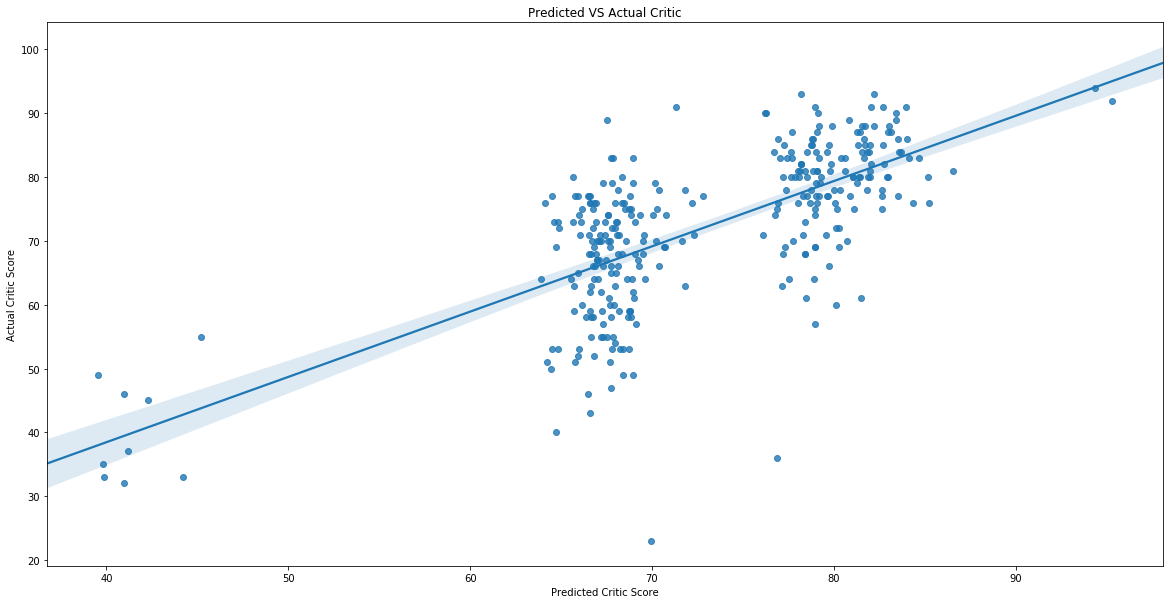

In [61]:
sns.regplot(fitted_y, y_test)
plt.xlabel("Predicted Critic Score")
plt.ylabel("Actual Critic Score")
plt.title("Predicted VS Actual Critic")

In [62]:
Action = dfwd2[dfwd2['Genre_Action'] == 1]

X = dfwd2.drop(['Critic_Score', 'Game_Hist_Poor','Developer_size', 'Publisher_size' ], axis=1)

y = dfwd2.Critic_Score



### Model 2: Linear SVC Model

In [63]:
df3 = VGR.copy()

df3 = df3.drop(['Name', 'Critic_Score' ,'Year_of_Release', 'Publisher', 'User_Score', 'User_Count', 'Platform_Date','Developer','D_median_cs', 'YSR', 'Platform','Developer_size','Publisher_size'], axis=1)

dfwd3 = pd.get_dummies(df3, columns=['Genre', 'Rating', 'Game_Hist']).reset_index(drop=True)

In [64]:
X = dfwd3.drop([ 'Game_Hist_Poor','Game_Quality'], axis=1)

y = dfwd3.Game_Quality

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[ 0.88911546,  1.40505459, -0.19843522, ...,  1.00554021,
        -0.90576062, -0.11661904],
       [ 1.63721726,  1.40505459, -0.19843522, ...,  1.00554021,
        -0.90576062, -0.11661904],
       [ 1.63721726,  1.40505459, -0.19843522, ...,  1.00554021,
        -0.90576062, -0.11661904],
       ..., 
       [ 1.24116337, -0.71171612, -0.19843522, ..., -0.99449032,
         1.10404447, -0.11661904],
       [-1.091154  , -0.71171612, -0.19843522, ..., -0.99449032,
        -0.90576062, -0.11661904],
       [-1.091154  , -0.71171612, -0.19843522, ...,  1.00554021,
        -0.90576062, -0.11661904]])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)


In [67]:
# Import Libs
from sklearn.grid_search import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C:\Users\eshai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\eshai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [68]:
C_range = [0.001,.01, 0.1, 1, 10]
loss = ['hinge','squared_hinge']
param_grid = dict( C=C_range, loss=loss)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'loss': ['hinge', 'squared_hinge']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
print("The best parameter %s for LinearSVC model with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameter {'C': 0.01, 'loss': 'squared_hinge'} for LinearSVC model with a score of 0.77


In [70]:
# Fit Model with Using optimized Parameters:
C = grid.best_params_['C']

# Create SVM classification object 
model = svm.LinearSVC(C=C) 

# Fit Data
model.fit(X_train, y_train)

#Print Score
print('Score on Training set:',model.score(X_train, y_train))
print('Score on Test set:',model.score(X_test, y_test))

Score on Training set: 0.782105263158
Score on Test set: 0.757097791798


In [71]:
yfit = model.predict(X)

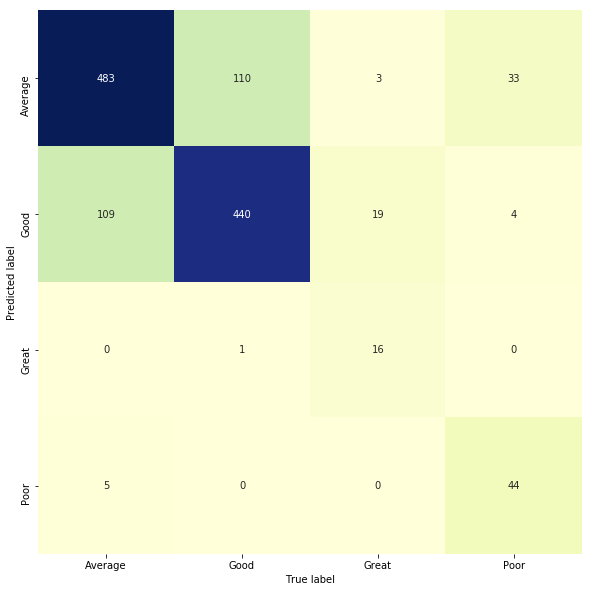

In [72]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(y),
            yticklabels=np.unique(y), cmap="YlGnBu")
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

### Model 3 : Random Forest Regressor

In [73]:
df3 = VGR.copy()

df3 = df3.drop(['Name', 'Game_Quality' ,'Year_of_Release', 'Publisher', 'User_Score', 'User_Count', 'Platform_Date','Developer','D_median_cs', 'YSR', 'Platform','Developer_size','Publisher_size'], axis=1)

dfwd3 = pd.get_dummies(df3, columns=['Genre', 'Rating', 'Game_Hist']).reset_index(drop=True)

In [74]:
X = dfwd3.drop(['Critic_Score'], axis=1)

y = dfwd3.Critic_Score

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)


In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [78]:
n_est = [120, 300, 500]
Depth = [ 5, 8, 15]
Max_feat = ['sqrt', 'log2']

         
param_grid = dict(n_estimators=n_est, max_depth=Depth, max_features=Max_feat)
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [120, 300, 500], 'max_depth': [5, 8, 15], 'max_features': ['sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
print("The best parameter %s for model with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameter {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500} for model with a score of 0.53


In [83]:
N_est = grid.best_params_['n_estimators']
max_d = grid.best_params_['max_depth']
m_feat = grid.best_params_['max_features']

rf = RandomForestRegressor(n_estimators=N_est, max_depth=max_d, max_features='sqrt', random_state=15)
model = rf.fit(X_train, y_train)

In [84]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'Test data R-2 score: {test_score:.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Test data R-2 score: 0.496
Test data Spearman correlation: 0.685
Test data Pearson correlation: 0.709
